# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

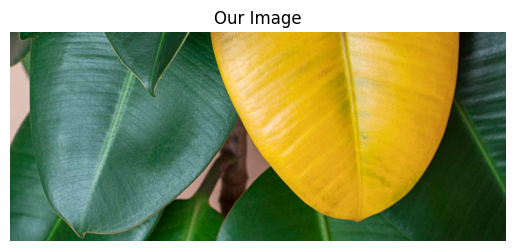

In [34]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

(np.float64(-0.5), np.float64(749.5), np.float64(499.5), np.float64(-0.5))

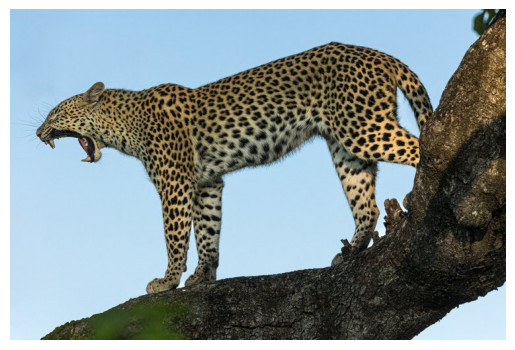

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4QEsRXhpZgAASUkqAAgAAAAIABIBAwABAAAAAQAAABoBBQABAAAAbgAAABsBBQABAAAAdgAAACgBAwABAAAAAgAAADEBAgAHAAAAfgAAABICAwACAAAAAQABAJiCAgAtAAAAhgAAAGmHBAABAAAAtAAAAAAAAAAsAQAAAQAAACwBAAABAAAAUGljYXNhAABSb25hIE5lcmkgKFJvbmEgTmVyaSAoUGhvdG9ncmFwaGVyKSAtIFtOb25lXQAABgAAkAcABAAAADAyMzEAoAcABAAAADAxMDABoAMAAQAAAAEAAAACoAQAAQAAAO4CAAADoAQAAQAAAPQBAAAgpAIAIQAAAAIBAAAAAAAAOGJlM2FiOWI0MzMyNzM2ODAwMDAwMDAwMDAwMDAwMDAAAP/hDe1odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMi4xNic+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpkYz0naHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8nPgogIDxkYzpyaWdodHM+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5Sb25hIE5lcmk8L3JkZjpsaT4KICAgPC9yZGY6QWx0PgogIDwvZGM6cmlnaHRzPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp4bXA9J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8nPgogIDx4bXA6TWV0YWRhdGFEYXRlPjIwMjMtMDQtMTlUMTE6MTU6NDMtMDU6MDA8L3htcDpNZXRhZGF0YURhdGU+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eG1wTU06RG9jdW1lbnRJRD54bXAuZGlkOjc3OWVjZTk5LWY5ZmItNDAxNy1hMDEyLTVmNDg3ZmRiOWM1MjwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD54bXAuaWlkOjc3OWVjZTk5LWY5ZmItNDAxNy1hMDEyLTVmNDg3ZmRiOWM1MjwveG1wTU06SW5zdGFuY2VJRD4KICA8eG1wTU06T3JpZ2luYWxEb2N1bWVudElEPkRFMUQzNThBOTUzQTgwNDU0RTJEQ0Q3Q0JBMjhGNEYyPC94bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcFJpZ2h0cz0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3JpZ2h0cy8nPgogIDx4bXBSaWdodHM6TWFya2VkPlRydWU8L3htcFJpZ2h0czpNYXJrZWQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/tQhpQaG90b3Nob3AgMy4wADhCSU0D7QAAAAAAEAEsAAAAAQABASwAAAABAAE4QklNBAQAAAAAACQcAQAAAgAEHAFaAAMbJUccAgAAAgAEHAJ0AAlSb25hIE5lcmk4QklNBAoAAAAAAAEBADhCSU0EDAAAAABBiAAAAAEAAAEAAAAAqwAAAwAAAgEAAABBbAAYAAH/2P/bAIQABgQEBAUEBgUFBgkGBQYJCwgGBggLDAoKCwoKDBAMDAwMDAwQDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAEHBwcNDA0YEBAYFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/90ABAAg/+4ADkFkb2JlAGTAAAAAAf/AABEIAKsBAAMAEQABEQECEQH/xAGiAAAABwEBAQEBAAAAAAAAAAAEBQMCBgEABwgJCgsBAAICAwEBAQEBAAAAAAAAAAEAAgMEBQYHCAkKCxAAAgEDAwIEAgYHAwQCBgJzAQIDEQQABSESMUFRBhNhInGBFDKRoQcVsUIjwVLR4TMWYvAkcoLxJUM0U5KismNzwjVEJ5OjszYXVGR0w9LiCCaDCQoYGYSURUaktFbTVSga8uPzxNTk9GV1hZWltcXV5fVmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9zhIWGh4iJiouMjY6PgpOUlZaXmJmam5ydnp+So6SlpqeoqaqrrK2ur6EQACAgECAwUFBAUGBAgDA20BAAIRAwQhEjFBBVETYSIGcYGRMqGx8BTB0eEjQhVSYnLxMyQ0Q4IWklMlomOywgdz0jXiRIMXVJMICQoYGSY2RRonZHRVN/Kjs8MoKdPj84SUpLTE1OT0ZXWFlaW1xdXl9UZWZnaGlqa2xtbm9kdXZ3eHl6e3x9fn9zhIWGh4iJiouMjY6Pg5SVlpeYmZqbnJ2en5KjpKWmp6ipqqusra6vr/2gAMAwAAARECEQA/AOqEHN06W3UxVsDFV4GBVwGKG6Yq1TFXU2xV1MVaxV1MKGqYq6mKupirqYq6mKupirqYq3irqYq3irqYpdireKuwK3irsUt4q3TFUNql+unaZc3zLyFvGX4+NBgS+d7/AM72/m2bVJ/McYl9K2Meh2cYCsbiU0UlvHZafy8s1cc4zA8Q/qOYcZhVc/4mF3FjqN9BFpn1tTpenmQwMVAWSU/3xh6M9D+7R8xsmXwwIfVwudhw8Xq5W//Q6uRm5dK1hVeowJpeBihumKuIxVrFDqYq1TFXUxV1MUOpirqYpdTFWqYodTFXUwq6mKXUwK3TFWwMVcR9GKtYq7FWwMVbpil1MVXDFW8UoXV9MXU9MudPZzGLlDHzHUVwFafM135IttD80S2etyrc2NpMtYYHHrSKByow2C9V5/FnO6jH4UuEH+r+P5zudKPEHFIfj/iUZbrpt1zRUSCGOOSWOANUKA7FAKjf+WMfy/E+YMiQ7KID/9Hq7dc3LpWhiqooxSqAYEN4pdTFC0jFXUxV1MUOpirqYVdTFXUxVqmKt03xVqmKtUxVwBOKpfqvmLQtJTnqN/DbdgjuOZPgqCrMfkMhPJGI9RpnDHKXIWwvV/zj05Jkh0SCO8PFpZZZ5lipEmxdI93k+LbfhmBl7SiPpBl/sYubi7PkfqNMO1H8wvNmqmKK4kltoDD9cb6gHQmMEgem0STrM1KNw9fMLJrssuREf4f+kuP1Obj0eOPTiUtN/MPzzbWHrWV8+pWcjCO3llgMtwkhahE8LCJlUD9sOuMddljzP+m/3skS0mM9P9KnNh+c3mNbiG1ubOzu5AON0QzW0qSLXkPRJk22ojK7qzZkDtKQFmLUez4k7Fk+g/m/5f1JhDeQS6fdKhknhk+Jok/mkXaRK/6mXw7Sxn6rh/W+j/Tx9Ljz7PyAen1f7r/Ss0sdQsL+AT2VwlxE24eM1+/uMzoTEhcTxBw5wlE0RSIyTFumBVwxS3TFWFfmP54h0O3Gl2t6tnq93GZEnZDL6UdeIPEU/eSN8Mf+yf8AZzC1mpOONR+suZpNP4hs/SHjejaosWkarpWoRG6u72kgmXZzOPiT96Ty4kvy3Hxt9r/K5/ILkJO8hsKTGHyxcXGnG+SJIZI4gskKCn913ZmPxykfE2Y8slbNoh1f/9Lq5Fc3Lpm1GKFRRgSvGKt4q1ih2KupirqYq7FDqYq1TFW6Yq1irdK4qlOteafLuixPJqV/FAEpyQtyffp8K1O+QnljD6jTZDFKfIMJ1v8AOaCJ1i0nT3kRzGRfXZEUHCU8Vdd/jqx/u+Xqf5OYGTtKP8I4vx/pnNh2ef4jTDdR84edNXnniuLqe2eP1YYrQsllDcS/siPjWRv3YZxxm/1/8jAy63JIc9j/AKm5uPSY49P9Mx+FT+5dGCzXNvdLPbozy2rTghT6t0rFonVV4kcvtZjyPO9+Xq/jbw0XWCa1guLewWR7VDq9lOXmraRk8WhlYlaJ1ZcjueV/0Zf0k/JBepLNG9tFrpRr5BcaTJEXSCGOGUk1NaLQFE4fZ+H/ACsn5mPL6mN+autxpmoamPrP1w3d1eRwOriFqtYLyJKArIYm+J+P83xYNwNqqv8AdqKJRFpayXaQvLImoeV53Et1fXMkiGS6kkKrCgZmaBo5BGn1dh6bq2QlKv6M/wDe/j+JsjHv3iqObmKKznubo6ULm9lF3aazxlZ/SoFjj4KqCJR9lqr+y3xZHbcAcVR/gZnpvW/8SLgu9S03UjLbSTacmntVXiMbNJaN1ZAOHJI+QZWpJ/Ky5LDllHeJ9R/3X9L/AI8wywEtpDZ6n5N/McX+or5f1mJrbWFQvHK3ALOgYqr0B29SnJaf8L9nN5pNeMlA7S/2Mv8Aj39F0+q0RhuPp/3LPKGubBwGwMUqN7e2thZz3t3IIra2RpZpGNAFUVOAkAWUxBJoPmPzNrF3qmt3Wr34IlupCUtUY/BGhpCrjfl+7/l/5uznc+XxJku/w4+CICC0lnn1FSCyu80YDOWcopJoKr4DZsxcnJvhzZ3cXEIlj53kSIYh6wBq0isTQUG7vQ7/AOTmH8HK+L//0+uFM3Dp2qYobXriqp0xV2KpPrnm3y7obxx6peLBJIKrHRnYL05MFB4r/lNlOXPCH1Ftx4JzFxCbxlZEWSM8o3AZGHQgioIy1pXU9sVcBiqG1HU9M02Az6hdRWkI2LzOEH45GUxEWTSYwlI0BaX2/nHylczmCDV7V5hT4PUAJruKVpXK4anHLlKJ+LbLTZBzjL5JwvF1DIQynoy7g/dl7QgtU1rR9KjD6jeRWwJookYBiT0AHUnIznGIuR4QzhCUjQFsH1z849Ng5R6HZvqThQfrDlYYgzGir8ZVmr8R6cfhzBy9pQj9Pq/3Lm4+z5n6vSwjV/P/AJ31J7cXxks7Gnq3kVlG7IY3LcB6sbVqgUNLxZv5PizX5dfOdgHh/wBj+P8AYubj0UIVYv8A2THo7doBLJfQ+vpyepe3Wp/ElJI0HDkPU9R+IPH05vj5ZiGVnY+r6XKGw8lGMQXUMJiA1KytJ2uNSe8SZ5YZGUOI44+TcvZkaRY8PL+jf08KDv5qElwraWus2PpxM948yDWnNLZxsTCVBqj/ALJLfBhrfhPd/B/Ex6WP9kvlt7X67dWNtprPY3aiXVvUmkETI/xM9s9eFFYnkq/E2IJqydx9P/HlpCMt4LdzF9SgtLSn6Imdg0c9of7yHn8TeDNktvPf6v6yN0Tqemra2F5byWUUeixwis1uqeoI5ljdvQdj8avJzyMZWRv6kkfJMUl1ozyW63djNMt4q29s0sbkQvESYQGVHV3jHN/3mQPDzo8mYvyVjJZWq2JluYorSP6xaaZpzObyzvHqkttI8wNY3WTiv7341f7Dfzwom65/xS+iUf5zOwKQ12sMFjfQ3OnXFzdKY9YudNM1I4pJPgngDqWkmoN/TdPT/Zwx3I3/AKHEg8uX9JFQwNbvMdQAu9JkBktS/H1reCWMM1vIqAekjUdU/wBhkSbI4dj/ALpkBXPkmsFpf6t+kddRrb6neRNbaRDeUjuoDCwEwWRhThRTJX7P2GyqREKiOKweKXD/ALFsiOKztu9K/LfzDeXWnrpOstKur2/qemLjj6ksMT8OalftL04t+0jLnSdn6vxYkE3OP+5/H1uh1+l8MiQHpl/umagZsHAeJ/nJ54lm1QaBZqJ7KxdTeRV/v7gUZY6A14xg+HxSf8Y81evz36Af6zs9Fhr1kf1XmUCTiF3o0ZNHKhSWZgedOjcaH3+zmrk7Eck88rI85F1GgZZnIlcq5kHwEdiK0+L/AFcoy7bN2NOGs7W8sptRil9aULwS1CooLInwkFa/Fz4nb4spsg02Ve7/AP/U7Ey5t3UKRUk0xYtiIrue2KoTVNa0rSovUv7hYRSoTq5+SjfIZMsYC5GmyGKUzUQwzWPzSlgRzZ6c0cXxqlxdNxJKg7iNa/tBl+Nl+zmtydqDlAWXPx9nHnIvJ7nUku7KXVrwy6hqMswMqCZOUzu3FUCISeCDr9lFjzAmZSkb6uYAABXRObLzP50uSwi1eRGV4YhByWBoedakqwZWWiqkaBeWP53JEfVL/Y/qU6SB/hCL0zzv5wjcRx6rI9xK8oS0u0Bk42+zPsi80kYKOQConP8Aby0doZY7k2P+KaTosZ6Lbr8zfOt+EpdtZ2zheU0cItjExqreq0wb4djw+Hl8S/Djk1+Q9QP6n4kmGixjpf8AWY21yNUszdR6jDHrtrMkUy37O9tJ6khSNgW/vGJB4uB8bfsrmHORMvVxSjL/AE7mRAA9NRI/0qJfTorTUTpNwsV7JHaXTXBFxJIEkmHqyRmOnJkoo4tXmnLKeIkcXLePRtG23vUtH80Xmn2el3dpqU8dqspsTFZzOlqyuocM5uAW5KG+Hg3xcf8AY5kxzZYcQiTHb8cMfpceeLHKjIAqVw128n1m+n9Xi9y7aishkiR42KxmZyWXcBRJH8PFsqlLiNneW31fX/mtgAiK5BCWlklwltpRls0vroG8tm+reojxIhQLyiaNWenNhyXj+z/lZIyIuXqr6ebHy2XxS2pRdXsVuYZNIWJF0OhT1CwKwmkJbhC5cs3JPtL/AJGGjyNer+NF9e7+FG6ZBZrq5hguILS4uEmOp2nxGQqRzZLOZRHG3BzV348uX23wG633r6f+PqOaGgeDUIfqk9xewXGlj9IxXl0I7mV4K8XAW2NAVA23f/ZZIDexVH0/zf8AdIJ719sbbWXuWtYjdapYxerYz3c0EjSQSndDGrRDh/L637WGuEf0WK6Gw1htFF1dWUl7LZXojtoU4RNHE68V5LC7q8YJpxPHAavusKCorpVxDopmsNMs76CxNxFqemlzM8VxMfsiR+HCMqecuHiuXPnXqXkFXV7GKG4knFhFNbC3tI7RZZQlmRGyUjhAP7xFdq/Ev2+K4BI9/wDxSSFOdbLTJLn1NLMV/pqm+soZKzRNJcFfUllC/Zjjkekf8qLJgsy67H6kjboue5tNO061sNCvG0TU9cdNRiiliWewaSdBGlukoQgL8HONuP8AzTiAZG5DiEPT/T/rJuhQ2v8A0qsy8rnVk8rWzN5pWWOLVr8AK5WQH1Zbbk3FE9UfGPs5E7AcZ9H8LIc/T9XVMtQt4G1LTmuibLzbcRRPqKwvytZ4o5AlGJ/acfEgX+X48GA7jrj4xwpy8j/O4WTfmd5Zi0XzBBqssrR6FPWUW7KrW8V3cI8LrJ4RXIkG3+/FX+bNrrtL/FEfV9TrNHqSPSeY+l57p1zreha5pvmO7voXuNPEdnJaQMZAQrUKB/2VaP7KN+3mPiyCBFDkeL/N/icjJHjBt9GeZfMcGleVLzXYmVglv6tpy2DySCkS7/zMy5vMmQRiZOmhjMpcL5j5zXupJJKzsHka4vLoKFdpmqRxda/bamwznie/m74DoOSY34uOb3TyGNGC+sTxRpZowFZRsOGy0NRyyodzai9Cmk4w/Vl9C3vGeN2T4+C1PItUVqi78vtZVkDZAsr1e0t9MVIRItjKwVlNvICs4KgoWUUarsK1/wCea/ZzH5txoP8A/9XstM2zqGm6Gg3HbvhQxfzd5ql0hYLTTovrWrXvL6rDSoAHV36fD2+LMXV6kYo/0i5Gm0/iH+iHncOoSm9Mt431zUJonmnkj+N4x8Pc8VCN+w9OKfzcF5ZzWonKZJJ3d7iiAKAXSwvdsJmvGKlgQI6EcmILxyMCWT0wzM3H4GT4/UXllMT0bDysoePQbmFH9WBFNvx4W6gIglYkHgoC8vUP+7Wbm6cuHHLjk2rq1cO6CFhNJ6kV3p0aTWrwS2lu5SUxygMBIzk+r6gKFPUb4ePp/wCXkLA5Hm2HcbhBNbObG3Et1O0L200b+s6evffWFDgwGtY5ElZY1HLgv7C/Yyd79P8AiOH+cwrz/wCPIPVrOAv6txEk7RI60TkscjSf3Ulw6EunoC2ELzuPtcvsrhhI9Px/V/rcSSApzXFk8Ky6jK9xNYXzXn6OSL918EKEWxKbfA8qyRt8Xw5EWDQ24hw8Xx+plt16dFTUNS0nT1k1XQLMWF1qkP6Qh1m5rOnMMBcWso3aFenOn+t+xkhGUvTI8QieHg/3M0WBuNvP/eplrUPmKGbURYwyR24S1mhHKAWQo1ZQpZf3YNfjqOXH4kyqHCavz7+NlInev+OpDBbx22oarajT5hpskc/16eVzCPW5LJGsEoIREdnbdV9T+ZsvJsAk7tXUq63Dy2GlajbTXMf1ctbfoy0uI5VLW5qOUs1HkVv7t+IdvixIokHr/FS3fJX1C31OyfT77SbW9sUv1jnSwt7epSWRv3qXTy/DxCn4Vfgqfs4YgHY8Jr8elF9QiNah1DR7+51K0s4NFs7No+N1BbR3H16KUEyoFVq1DkluBX/ZYY0dieK/P6WJQut3USWumS+WjLZ6bqyC5s4dPt+EzXINZBJIxMFCv+6pMnCJv1bkMZEIq/tf9yOrQzWFsfLM1srXt9EkKSrcKK/vQrH1JOf+6+GI5Df1ItLtN9C18sSalpcB1ax1NpF1VJEjs/S+rD4KFePGUtx48myRjvXd9Kg9U017SLXTX0bTPqN/9U1sNPqf1ef1EEkihD6rybEJ8NBy45XEWD/R+lkTyU9T09rHWLi3sobqZ9OSC2sY5IYJIltSY+TQ1IqKpydj/wAa4AbG/VkQgJbmbTNN1SCx1hzqGmulxfXiwCYJau5Y20bEfGq7Sty+Hi+Hh4iLHP8AHEi66oyxN9q2q2mr28kbeVGtlu5NPugm81uDvFC1Wg+JQytEeORlUQQfrZRsm/4VHyz9VvdNj1iz+reXbLV72SHVxdyNMLgy7iK3lFOKtyduK8eMmRzEg0bmYj0/0f6zPGNrHp4kRqWiabouhXWiJcXOr3dlfWjNeMOItVnlBHoH4pJFHwu7fEn+VktPMzyRlQgJMc0RGBHMh735o8u2nmLylPo918cd1biPn3DgAo23Qq2+dPIAii86CQbD5nl8upd2eoSvbPHdx3qWOrzAiCGGaAshuomJ/wB2clqv+xzR5ZeHKi7nEDMWE61b8wb678kaP5ajeRzDHNJPdOFVnFsxMCtyP2Uj+OT9vkqccunqCcYh/pv96whgAyGf4/pJAttdxRKZJAS0kZPBQ68Wj9Tkzhj4/EvH9j4XXMIkOWA0IIzIGCLI7gMsvL1A1G5ACOvt+02RtNMms9PHpxLHGWkBCygqrUB4mqxruykfa4/8FlEi2gIbU9bt9Ild5JhchWIt3Z/U4sgIAHP4+KV+yxwxxmSynwv/1uzFT45tnUJbr2rQaRps+oXVTDCtSIwTIxJoqqKUqTkZ5BAWWUMZnKg8R1nzFHc3p13W7y4sIr1fT9K3O4iZuMKsAPUpQtyI+1+8fiyZoM2SeSZoO6xY4wiBeyJt/PvkS0kggXUYFVXjQcXUj0ynpurSMGPHj9rikP2cxJ4Mn80t0Zx707VkuDZ3elyiWxLPeahJHyljdR+7WCNImRU4qV+0jLw5cuWRB7wpU4NQguZ5LZYo5XaUyWCxuUiaLggQqsgaOkRHpuDw+Pi3FeWM4bWsJ1shYUju6QqiSelIILSrpIRdwKknAyAn4vUD/A3MfAy/ByyoxMTZ/EWwSBCBvkh/voNvrfqWlVXYzB1WVYVJ+GIU/Zb7PPl8UaZIDki+aRaov124jtkTnDcMY5oWd0pASyOQ5YhHjj+z6Zb1Pj+BftJbHb8fxMSUFdOt3NNJcfWFUPJNez+iyPbrZ8ZIF4gvHWWIDkfhZ04/ZZcQK5V/xXF9SbtENfa5JYyyCf6sjsbjTmKJbxGWSV4vq0ocNyaXkvL4ft/F+1kBCIP+6/4pmZEhQ1C2tLvT9Q1LUNSKLPBbTalbwc5YuVqzR3KAgj+8/u6LxZMsxyogAcvp/wA76WuY2u25GubCXUNTvK6v5duLZS2ntWR4i5X04/R/Z4AlnZskADt9M2JNb84pjo5trmZtGuNGtdQv9GgNxYzqv1eGCVyDFbgMT8ffn/NhIPOyOL/OY2OVLdN0+6t7LUNA1S5t9P13XWjltbC6up7nlyJ5cqceDHp8DZIjkRuB5cKL6K+jWej+vc+QNVFteXdu7XGlOLZvQtmA7lnq+5/ZyW/1D/OY30Q1q/mC0sPMVx5gH17SY4xC1lZvUepXjzhWL47cN/rZMRBqubAlD6Romg2Fxbh7WeTTNaijv9SN8CsFnDFXgpY/an9T7PP4mXJc/gi0zt/0fpv1rS9Ts5NZtdRuPrMckhrD6cO6MyJREUV+CP8Aa482+LFeiS3eraVcj9H+ZLme+gvbuOSCBCYfq8YYjdlIoioFWmSA6hbTvWNQ0j9KwNA/1i2jsJILGxWH1ZYTbsnq+nNUNyaP9h+XxceP+Vjzga+LbGfelVmlppmrafZ3GryKNDt5rme2SPj68FD6cXw/akt4uCyROPi+HIH1AkD6mfLmeTYsbzUba31S+1CyJtbmCbSvMFwOKGC6PwW/oQmOVWTr8f2vs4DIA0L/AKUGQj1+1P8AU7XTde1r/Do8o3U3l+O7T1rywSWwZbuQ0lklDcI3hIqefLMYSMBxcQ46/i9fpb6Ejw16fJM7vQ9QufN7aS3lNLby/YQm2sNejnC8IUiopuAH/eR8hTi/2PhysZAMfEJ+s/wV/uWwwuVGPp/nPTfJfmK3vtKs7G6jS2vlj4R8JFlhm9P4S8Eqk+oNq78XX9pc6jSayGYUPqH1Rk87qdJLGbP0l5L+cFjqGkeYL6KKZI9K1W2mnmsmj5LO7KqN/wA9FYLw/wBflmJrcQ8QHv8A965WiyegjuYva6JpVxYTzO0Cyp8aTMQGh4gCm9FY1+L4f2cwZTLniIQ1pJeXFtcEzOls8pmuHVSoQonGPoOlD8VMgeaQdkPZJIZLqZTwAjZZS9EjIkaprUCm3H/ZYSilGPztJCJY0VLmGAJHa8lB4pyqwQkbcj9rLY6e+bXLNTGdZuZbqIuWSYXDEiNRQo3Loo/Zqe2ZMYgNBkS//9ftXHNs6lLdf0DT9c0q50zUFL2tyhRgpKsD2YMCCCDkZREhRTCZibDxzWvymvLjW7KHzNKZdIkuUiiu7FeDMxFFDjcwjj8PqfzfD/JmqGmljmBzhI8LsTqBKJI+oBmln+RH5Y20Ahk0o3Z6NLPNKzN86MBmxGCA6OEdRPvYh5w/K7TfK99b3flmWfR9Kv1kg1AJMzQrOxBid/VLqq/8J8PD9rMLW4qFgbOfoZeJYJ9X8LCvL17qeo6Lf3UFwi6rBIbO45VMbsAXhmh6+n6i8uS/tcc184iMgK9JcjmCeoZDDrqrGYk0+80qjkyEqbcCVqRclJRY5FCF2j+L4v8AZZKWEjmPsavFB5FFafrct5f6ok8YjgspUgsmDGpS5jBnXoyiP1F9U1+PlzzGnioBujk3SPzPDGltLPHELkkAQ2SR+pI0castOvGMM0joGVPhX/WTDAdEktW9pNbRWcF3qNxDa6Tam9vIJUdm4vyovMco7hER/TdS3wcVfjlciCTQ3keFuA2G6TvbwyGOOS+uLi8jt1mt57uIJE0lxI81uxjrzT0GiYMlOOTJrpt+OJjXmmnlxtMu72e0mtfX069RZLl5AQrC4i9Zyg225oGdR/PkSCK33/4lTyQdirahb6hd+WdSWHXri5YJ6yCP6zbwH4I0D8lIjrQvxzIIqhIelpvu5sg13TNZ1nStNkexXU7wFElEF0Le1ldQObEIS54t/slyMKBI5KbKnqmo6Dq8l/r2nfW013yyqxJb+o7QsyAbUWrOK/C2WRiRseRYEofTdSsNQ01rzzHa2uh+YtWAjstUgTjcESUVWcMBxblt1yzhrluGBLfl/RtI8u6xqWkRavPca5qlsTKz0CK6KTzpTfr+1ywmyLQltvr91e20PltSurWkCg6zOzVAcmrNvT93GeVMeGt0hN9FtZ9Y1eNtNd2tlj9O2iX+7VadWP8AN7ZKGOUtgGMpxiLL0Ly7+TWlRGWbWYkuppwSzMAaVrsFNeI+I5s8enjHn6nX5NRKXL0sF8/+Qbvyj5gtrvy6zPDqCsq2zt8KPyHqEE7gFOtP5cxNVhiK/mlydNlJ58wlxuV0rTJNQ0awl1zzDcCKC8jQlkHCqeoyqeTtxHpSuv8As810sdmieGLnwnttzVItEvNB1K0svKWkW9960yXHmV7plu2t2T96IHjH90Ikf90yJy+z/sqJy4gTMkfzG+Io0B/WZJoQnXzjeWU3mFZr7zDLBd6Rpt3HdXTwWqN6rLLbycEtHoP3XqBGVv8Agcxsn0A8O0PTL6Y+r/fN8OdX9Sl+WljotvrnmqwttVfXdTvJZ/rERtbmKNFjdmlt2aTlAnqOaKwHJv2cGrlIiJI4Ijzj/pv5ycAAsXxFU06yZvLVrcf4Q1DQb7Q7otZ6Pa3SxCczgmQI0jKHQfbb9pftLkTMxntMHi/yn81kIAx3jy/gY3+ZWu3GoalYA3f6SsUsaW0okV2V3lrIkxT4ZWRo0Xlx/wBbNjj1OTLH959UPLhcOWCGOXo5SY5K1spRBHylk+MRkfAOVDx4jiPv/ZwJTmK1/R2nXNvPQyBEchxQlDQHiSaOoI+FlZsqJtnVMK1HWpLl3srZj6TuomYd+B+GnXr/AJOZeLFW5cbJkvYJXcCKFGjWXkqAovElgrdasfE/s/DmQ0oXUfrRYuWKwmhK9BVl7qPbFL//0O2ZtXUtkYqtpirVMUJfrsVlLpc9ve20l3bXCmOSCKNpWNR4L0/1shkIrcWzxEiQIPCXjP5U+XNX0PUtS06KxuKvfRvbajcQvGht4wKk+oo3UFk/mZ/s5rIYZyyQlXDw/wA52OfNARkL4uL+a9znt4LiNobiNJonFGR1BBHyObZ1TANS/J7T3mml0m7axWeQSy25USRFhToG3WtOOxzEyaOEuXpcmGqkOfqefeZfLGueXedtLbtIl3M62wtmFZF4VjCu/wAcfExoOK/s/wA2a/PpzA7/ADc3FnEuSWaRHDZ2kY9G6W1glSzimeYGCaRI3lZbtZN1BkLwNx+1yTNfk3PT8fzHOgdkFNcG5X19GMd3DcpJfXMV4FE8E1whFuqc6fuS54R8car6tv4fT/smV3y3VtKill8z2M8kUvorcvFaclWNYIl9OJkCVoyScZPTl/l+zj0pie9RuNIutK81X9/FEfqlpJ6VhGsXrcA9CY40Qhgr1+2uZg3FOKdimGkztNf2GkaLfDQL+yma41Kyjje5QlySeTkURmH82JHUoBVfN2ravqmtmw0XVbW1eJlmURLwnkdRWrHZSvwtVT9rDEUOSClfm3V9C1/W7G3vWntr6yKcJIxSJmHxhq040qKHJgEBCCW+/S3na4uVhDraRPCl1GP3rNQcU+H7XX/hsNbUEXXNlXkD8o769iu5LmB9Oh1QFbmJj8fpk1K8h0FeXTMzHpid5cnGyakDaO72zy55R0fQbSOCzgRBHTgFFApApsPkczREDYOESTuU7wqxb8x9FOpeW3eKi3Vowkhl7py+BzXt8DHKNRG4Hy9TbglUw8S1GGy0HUYk0hJJjpMIIa2Yyspl+IJIAasXpzYtmrIEhu7GzEoHRPMmjaYusXslnN5f8y6yJktdYkeSYBpPiJ4Vb06MOX8uUZcMjX8UR/C5GPMBfQproPm7VbzWNO1HQ2sJfMbAR+YHhtWlu5xFQMYmbjyUoMr/AChl6QJH+Zu2fmRH1Gh/OZe+ua9o2vaVbaXpaWei3rPc+ZdVuLb0JjMwIDngUHqUNPsPlM9HOjxCXGPojvJshqoWOEx4f4kDpel6dYxaxYRazqGqXmperNqLTyO0iWwV/SgtJy6wxXbllbmT9j7f7OY+UmwSBCvp/wCPx+rhb4VRFmX4/hYL+ZaXWmT+WrVwsJgsZBHAknqTwwFgYVncMwM/2+fF2WTjyTMvSCxI/wBL8f5rRqNjEeTG7CO4liW+uXSNOZSVzIBKHagVeP7TMW/ZP7OXSHQNUe9D6xr9xDafUnLNO4+0zcmA6dj3A+ycOLGCbRkntST2sCyKxLARoKvITQnrtQfLMpx0T+ibqVUeD02Mp5qnJjuFruPkMCUbq3l+9+rwMYfq7zfEY241YKNjUE1Y8qk/DlZygMxjL//R7fTNo6pojFWsUOpirVMUOIrsd8VdTFW6YqkHnXRV1TRHCoHubYie23oece4HLty+zlWbHxxIZ4p8MgXhenaVqUMMckWkfWLPTYOX1e4cMfrDL9Y5kCjSskqxRry+L4Wzns1XuaJd5is9LQOo33l7UYRLfacjT3qK2qtavKspuIpxBbxwxn4jbVRn+FePwcshESHI/wBX8fzm00eaEi0lZpojaXqXUttKJIZIQyIiuOPo+m5GySBp4v2fh9PCJEHcUggUyWzuru0SbUrW7W4ewsuEVoFPpSzSUYOrMf2aUCn7H2OWZIrq4qH0XX9X1vU7Oy0nT7ePWpF9XU2RjHCzfYbkAOT0rt9rLceEzNBryZREWWZaL+RCJLJcX12bd535zpbclL13ozkl+/jmfHSD+I8Thy1RPIUy22/KTyJboiLpyNwpUt8RYjuxO5r3/my8YYdwaTln3lPbXyzoFoytb2MMZXpxUDLGtMgiqKAUHthV1MCuxStmhjmhkhkAaORSrKehBGKHjQ0K1hvB5T8vtDpusLcrda2jRtIZrSGsakSnaNpFUcd80GoBxzN8v4XeYSMkAlE35SecddS5XXGtdI09gXhiib1Zqsx4xc6CnFV+L/fnPK/zQHIWzGm81v5VeSJdC/M1IVT0HhszMQBX4JSBxbcMpYr4fs5n6LIJysOJq4GMaL6DIB67/PNo62kLc6Tpd3G0NzZwzxyAq6uisCCKEbjAQDzUEjk+WfzF0/RYPMmqrpSNBEt0IbVVYmqWiCNkTrsjj4Kt/k5psoAmQB6XcYiTAE/UxGXVruHnMXWQupErMoBbpsaDZtqZTwW28R5pDLzuZXuSyqrEM1fhNSNhTbw65kAUGglMbJTDcRCSBTbD45GYivgB03rhVlun2WnOLW4uZHW25D1vTHFjyNCq03+yd2pmPlmeQbccepTHzC1hLPaR6bceqYIOHosCpHAV+03FWdq5jAHq5MiOj//S7jmzdW0RhQ1TFWqYq6gxQ6mKuxVvArRUEEEVB6g4UU8a/M7yjHpOoS3+j1gudZBS3iMjLEbxeDKeO4+FYfU/2D5qNfioiX8J+r8f0naaLLY4erGRqt/Gk/pJBdWMH1e4u9akgCtb2/OaWVduiCOPjDx+PnNz+zmp4AfI/wA12XFSXSwE6eEhihttBHpP5dnmkb65cI0f1i4AcBy6lTwIX7PDL47H+l/F/Nap8vJjsIvtZ1BbS21mG3SeRzYQsGJkUGoKjkvMce/7WZN10aKZ3+XHke90/wA+afISolVpJZbuJ3ZGRV3j48iobcVJzI0kiZhx9UAIPoQ9c2rrWsVdirqYq1irsVbAxVhPnyTV9LuVv9Es47rUNQEVuInoqsVkAZnbwjiZn/2OartLEDUj+P5rsuz8hFx/H9JKfMU17fJa2Gt2ZnvTLJdWUtlM8dsjW9PqwuHqvxSSMtEp9r+bNPHydqXflfo2oQeZL3UdZvDc6/Pp1qmpxEqVilBY0WnQfEy5tey8gMpAD0j6XXdoxqMSTu9NzcOqQWs63peh6dLqWp3CW1rCKl3NKnsqjqzE9AMiSALKQCTQfJ2r6j9dt5opD6c6XMt3GqsKD13LtyPw0orGnHlmjJuRPe7sCgB3Mb8wvAESGByYbgpJ6h4k0oORYL3BOSxx6sZlo2otLB7OUrNPK6iOlD+6CghgRXbk3Fcta11jG31i2gujxsoGqU+HYEk0qR1BPw1ORkaCYiyyKfUtONpPFJNHb3duwktnkJUuh24AfZDhfiLZjUS32EklmeSZisglKkMz7CpO9K9/ffJUtv8A/9PuObN1bjirWKHUxV1MVdTFWqYq3ih2Ksc/MOyF15UvJBxE9oBc27vsqyRnYsf5R+1mNrI3il7nI0sqyB4ZZ2fmS/k0+TSdW09tGti40zTrmWn10yoyRGdQN6uzjifh+D7Oc9cRYIPF/FL+Y7yieR2RXmCz1L9G3cd9fI+oXcss2gNaBvqloIgtmYef2V9Rm48P9fLsVdBt/F/umvJaWeXLfy7YLJJ5g8ty3d5YJFFcyQ23rrGGBAlVgAZFP+QGdMt3PItR26PQfy5/w5a+e49J0aBrIwWMtxNZrG6RMJzGRLVxu/w8f+CzO0d8RJ7nD1X0/F67TNi4DqYq3irVMVdTFXUwq3TAqWeY7N7nSpDEP9It6TwEdmTen+yHw5Vnx8cDHvbMOTgkJdzxry/q1/YAa9rVvLqmv6/Ibe0tLXeH6vES0DhW+CGtBJyb4v8AiOc9KFnhGwi70S697Kfy3MVt5uvHu7eWLVtWidJ5WNUpaSsIEYE/C8kLGT4V+P4syuzc1ZDC/SR6f638Tj6/FcBKtx9SQeevzX87aX5m1LTdOEfpafdRqyJGshCEgrG7V5D10/yeWZObVTjMjah+pqw6WEoAm7KB/PjV21XTvLmqpHL+hLyJZbeQAlI7j4hNFIR9mVTxTifi/wCGxzZDOiPor/Zfj/fMcOMQsH67/wBi8sM7PUhP3F0oWeNTQIBXYA/ga5ihyixOa6aSRmO+/wAAI6KOn6syAGgorRpBOGRg3MsFalTxUH9odaV3xKs4sbO2t9NWThHIymiyTIPTeu260DGmYspWXIiKCTaxawpEXEvKQMwei/CqgihPuf8AiOGJQWPveQwrNEzMQwBhpxJDVHIgbZZw2xt//9TuQGbJ1jqYq1TCh2BDqYVdirqYFdTFXUwql/mC3+saDqMIYrzt5ByAqR8J6A5XlFxI8meI1IHzfOdroun3GoJqN3IljHdfVobHR/7m4W5t5ZJYOUiBlhimQSs7cf2uK5zQmaob/wBL+jJ6DhF2m6DQ49PeHQdXk1COCwk1BdOvSRb/AFaBWZndqErxZuX+yjy/HEyuxTTMgVuoabbeeNPurePRZbCOFyBPpUtw08vCprMkj/ENilIiMncTzYEFmP5Y3PnCbzfJD5ijtGMFvMIby0epkAdVAdP2SvzzP0YHEa7nD1X0j3vW6ZsHAdTFXUxV1MUupih1MVdilv5/TirxLzfJ5u0nWb6x00wTia4LWzPVY7S14xn94vRuVZOO6/y5pNVjiMp/03+mdvppk4woflfayan+ZskZEifo6GNr10maWB5IhyHphmZl+KRF+L+Xjh02K5g91zTqMlQPn6WMfmJ5lST82NTuoYoZrixP1WX0hIqv6YIjaUPQepHzCO3+rktZvKiuj2hswjWL/wAwT6RKZdQnm0y7ujJ9Rlkbg8isJDIIySvKOvHknH9n9pcccqjw9FmLN9Uru7n07OSJSZC4AZDXjQ71670yEI7rI7JHN6bAsUHIkBN6EGvh32y5rROnXL2moRSc/hlASQk8QQ1RWppUK32q/s4kbJDLrPzDbW08MlrKJI7Uh0eejfGK8j6Z+Cm/wI3/ABLMaUG4SWar5gWW/eaRkIkMjzwRoAheYcnoAD8NfhwCGymTEPqKx3LXEq80Zmqo8Sa7U3G3jl4ltTCqf//V7oM2TrXUxVqmKHUxQ6mKupirqYq6mKGqYqsuI/UtpY+vNGWnzFMUvmSU+X7HVIXuIrk6ncTwRW2pXBLWJu4opFhLwIwIRH5xmFP92ZzPDKiOkb9P8XN6Cxz72d/l7e2WralrOm2GntY22naXKIoJYjHK5uap6jBqkh2jfgrf7LM/RYSbJ7nD1WQCgP5zBdR0jTbu0fT7OS4TzVOnq32vwRyMEnKxgwP6dTA0imNmRPh/bymBPXk2Sekfk7pfmG21K5Ot3sV3c2tlDCwhTiFkZ2Lln/3YzBU/ZXNhpK3IcHVHkHqtMzXEbpirqYq1TFXUxV1MVbpiqGk1PTI7+LT5LuFL6anpWrSKJWqCRxQnkdkc/wCxxtNPBPzc8z2TazfskpIoqKiNRXMYZIy/EhpE+J+S8lVc1ec8eS+70uywDhh70B+THnRPJuq2M2sWkVjonmISO17wcs0VurAGIAk8fXpG3w/F8P8ArZLGTE3/ADv4v6q5IiYr+akP5l+adD1/zjq2taYGgtr54hbq0RhmCxosbzyChPNinwq3xfZ+HIZalK2eK4xpiV0ZZJyiHlbW4cxxE8wkfI/FQ13YgZWyQs01pGgdx8RUrIV4leW52G3w08MsAYEoCCyuZw4EYZQrURfthqVoB1p/NhVMb3Q/qmmW07RlJGJEkNKfAQDyFK9MhGdmmRjskF5aIIHlRWRkkApX4QjdDXxrk+rDoiNOspWkZjX0YjyduvJu2/hkJlnEWq3yXJMk4mLW6yARqBuegodhvvgiyk//1u6UzYutbpirqYodTFXUxV2KHUxVqmKupirYG+KvnTzWdYsfNt/Y2Uc80cszwAW3EPZrI7u93Hy+Fi9QvA/txc/tNmgzY4icv63+m/ou7xTJgPc9A/Jq1mN1rtxNd/XvSeKx+tunGWT0krVzXenLjmw0EaBLg62W4DzXza8ul3E9iJHto7W+elm84g+uusit631hQW+Dl6Hov+z/AJK5iyjUiHJjKwHo35J3kt2msyXFvHa3AaBWhhf1YwlH4FXoOq9s2Gl+kuFqeYenZlOM7FXYodTFLsVdirqYq+bvz689wXvmXRl8uSwSyab6hXWLcH6xFNy4PGshonDvty/5qw8+QWKO8XM08CAb6vK/MOrXet3zuxjtldgHuOAQ8VFFHFKA75ixFOUU680+c73zAdLtYLeK0tdFszYaXb2qsfSjBWrAsebySFVJf/gV/mnKd/BjGNX5pM8Bt7aQcuDueNwGG44EhakE/t/a2ypmsjljhgZOUnMtW2ZQhBOxYHbk23HrhG5QeSBKxmdK/uoWAoTU7U9uxybBG6ZI8Uk3BysL0WUIeNT41PxU3+LISZRT71kl4W8Z5kISIaCQ8FYFqEbfT+z/ADZUQ2BLrmNTcsGtg1Z0kcOeRUU4jsF6jBaaX6pfQcWd3AVB8LUryI7KvfGEVJSSXUozY/UQvKjVd2G5Cnl2+Ef5WXcO9sOLan//1+60zYutXAYq4jFWqYodTFXUxV1MVdTFXYocBvirwP8AMOS2vvM95cRiWZIJnKJbF2jdkQx1laOjcOYZXiU8uap/NmjzyvLKu93OAVjFs8/JyOO18t6i7w/Vkhu2Uniyp6UUEYTgWHxBU+03xfHyzZ6UVB1+q+t4l+YvmiK48wzPakiDV5nPp0ZVZSSA5+JuJ48PiRV5cfizC4hORl0cwR4QA9Q/5xt0bUrLyxql1eIqRXd5xtFHX04ECb0/y+WZ+n+m+9wtT9VPXMvcd2KupirZUjfoPHFUq1LzR5Z0s01HVrOzPhNPGh8ehOKaSKT83/yzQoB5gtpfUPFPR5SBj7FFOQ8SPeGYxS7iwzz/APnx5Pl0G80zQbqe51G5pCsiRPGgUsPUAd+Jrw5LVcryZhWx3bMeE3Z5PB7y8t71PWdRGkR9O3jU7oxoPYN8O+/FVzBEQBQc27SxbdLyeRkiEcbFfTptSlQK1rXuxw8lRFsViuR9Wr9ZYD01ooO4oS53B6k/8SyJSirnTp4oWnfjLKg5yRsfiMZqa9a0p8W/2WwFILHbuWJpeUZfgoBXseJFO3U5MBgTuuW5MoQMVSgpTqCBuRRffCqKiMSKoLrsR8XIbezUNMiUhUkvJIHBjchVNXCsQqkkAdK1DDBSbQ8uou7kyUhU1JJY0oDtQ9W/m6Y8KbWzapGYlWORJVU7Rxo3IE/tc3Clv9XERUyU/WdjGzgGgVkGzUA7UG1KZIBjb//Q7vTNg65sYq6mKHUxVqmKuxQ6mKupiqld3MFpazXVw3GCBC8jewFcBIAspAJNB5bq/wCb+vpI7aXpMT2zg+kszlZkABqzgGnXj8P7Oa6XaG+w2c6Oi23LzOxCX3mez025Ed1qt9MiQWsKOxHMhpDUUFEbjJ6nD7KfHmJjxmRcqcxEM8/OfzxLpl+vlOwvGs7Wzhj+tC34tJOrrT0e9I+H2v8AK/4bO1OWX0x2cTT4o/VJ4jdWty99FIkFIwxKxcgzAEcgigmoAXxyiOwbybZ/5c/O/UvKPl2Dy/aaOuo30MsrzXU0wWMeqxdfhhWTfx+JcysWYRjVONkw8UrtD6h/zkb+YkxZLZNPsSOgELSHfxZ5Pfb4cJ1Eu5Rp49Urn/P381Pghk1CCGWoDMlvEOpKhSG5/FX9r/hcfzEvJfy8fNBSfm5+ZtxNAE8w3p9QUdAkKozgkNxKRqVX/ZZE55d7IYI9yT6h5k81ahcAanrF5dMjAvbm4lKN4LwVgtB+3/wWQOWRHNmMcR0SaWxSKfjIQlwxqWVKNRjWrbf81ZG7ZI1pbq0lUvaiQcgsQf4jvUdOoqa/axW0ILt4ZBK0MckspbijgNH8YIFOy8Qf+CxRTfI8445OUkZjCrx4GijcsoAHE/8ADfzYquFu0dwWiik+KQmCoq9EAqCvTfI2yXvdp9dV6qAlAGf4V+IFq/DXludv8rBSlXnns4YXWVjcSy0cxpsvGn+7D9rofs/8FjS2kcsM0qH07d1CbsAakBztQH4ilf8AZZJihRbypuq9CCX48kPjVug+Rw2kLDI1XRQdjU8SOtfYEY0q4TXEcvqxbrXbfY7EfZp/xLGlbjhaZlAVAy7FVFAAB3PhgSN0wS0iW2CiKMT1FJyeKcTuBT7RJ6fZ/wArBe6aTbyp5O13zR5gttP0+1dpZZliluo4nFvAoFWaR1BVOC+LVf7P7WWQiZcmEjXN/9HvNM2DrmwpxV1KYoaxVqmKGqYVdTFUl8zecvLvli3WbWLsRNIQIrdQXmeppVYlq5Va/E1PhyE5iIssoQMuTyrzv+fmm3NndaVpekyTxTpxN1cP6VCTWojUMx4kdHK8sxMuqgQQHIx4TEgkvM73zdr0hkkjlSL1RXjCgHYD4iwde3bi3+VmvAi5hyFI3vb1pheCR47/AIsslzG7LLwbsXDLxVv5fs5YMlctkXahPqWoStE5aMTBfTV1RYvs7blVHMn9t/tNh4rRaCurm7S3MrEyOCQzADai02IHw1qemTCUA15cNEqKAkZABNTQAn9oeNd61ydMUbdG5EkUUjo5jUpFFEOQVWFV47bnarZEABJNr43vpUkUjdBykYAFgtKFtqYbUIWSVYmWhYUJZWr8J2p9B+RxQshErSLwHCM0DNUmlOpr4tXxxSnZjisrVrlrj1bpKyIDR6MyUpTb4eI/ysCEpvyYZUkSrEhPh+ypA7Eftf8AGuEKpxvwnbmPT4FWMaUqNyNjvRR88eiSjLeIshIXglSCSx+Gldywpt3/AJsUL/WuI5JOXFZ5YyVkY0IUn4itKBWK/wDNWKtW+kXkqSyswt4I12MgPxhgfiFK0AA+1T9rASlLbsFJS4LRvF8DA/LZjX9RwhCk80rHmhao3r0bwoAPniqg9yERo6/A4HMbgkjDSqPqpxWMAgU5Eptx3/E4aVwmlYs7tzZvtDoNtuwp92NItPvL/l7zDrjJFpGj3WoeoSA8EbPGSu7D1DSPb/XwiBPJTIDm9w8hf84wzpdWOqear0NavF6tzoiKVlSVx/dPOrsCF/baLizN+1xy+ODvaZZ+57vonlzQtCtzbaNYQafbsFDR26BA3AUUtT7TU/aPxZeAA45kTzf/0u/caZnuvdTChojFC0jFVkjJGpeRgijqzEKPvOKGGeY/zd8i6DdvZXF491eRgF4bONpgCRUBpB+6Vqfsl8oyamEDRO7IQJeVeafz380aozwaHGNGsunqCkl0w92I4R/7Af7PMLJrZH6fSG2OMDm83mluJpjPM7zzsKPLM7Su25P2nJPfMSUyd28SWGiLuvE138cpJKLKmzM26n6MhZUFCzh1IaVgKmgJNK9u+Wxtm3HcEsssx5ICACdwCfnvl8QyU9Ua3UyfEEG+xVgdqU+FuJFftdMuDIJNLMvFaRrypuVNDyB607k98sAQUVHdxGD4LQevGxUzK3U9j7fPAqIjkaWb0o0MZc8Q3IjrSgJJbl3H+tgSuv7Ai7dEUtGzIUjbkrVYbg15Hr4Njaq1vBBbLSRKhS3Kh6gdlNPi2b4sVUr8vNGWSgjlAZY6BRUGmzUHEe2IQsuoZZyIRbta+pWFpZSrqTuQFarH6cIVBwstvL6oHquUKheoHarAnFUVFGTCBHIUZqCd+NAeKktyb9pjvioRF4pubZmR1ExHMwj7aj4QVr1OxGBUuQXbo1JGijQKJGYkVA6DCklX/RhePk0kjXDAKq8SeRbovI0/HBa0owadJI8hkV+EPL1Vi2pw/wAkb7EjDaHXeiyAUdkiqoZTvU16b1qNvtbYAWVIAaWst0La29SeeVxHFEg5NIxNAqhfiYs32Rkwxp9KflR/zjdptnZR6v5yi9fUpQkltpoYhLbYN+8/nmVuu/p5kwxd7jTzdA94hhihjEcMaxRjoiAKo+gZe0L6Yq6mBX//0/QZTfM917XHFCUeZ/M2i+WtLk1LV7lYIUB9OMkepKwGyRr1Zj7ZGcxEWUxiTyeB+Zfz881ayyxaHGNCsiwVZvhmuJGcceJZh6aKp3qn/BZgZNZI/Ts5WPTjqwfVdS1O5tx+mtWutU2b07eWZ5EHFiqsFYlfs/tfb45jHIZDct/hxCWwKNlUAIOgHantmPI00yCtK0cYqOuQBYUhjNyY0k9MfsmgqT9OXANkQsMfOQsZOZ8euRmQFkroqhagfEOmY/FuwBQV5B6syespYofhoNj4cq5lwmG0EIETzW9x6iReqQxIVqlCTWi0G+ZAIIZgWtvpHuIovrDetKEIZQCCtD0cseo7ZOKSh0tDM0BmbjFy9NQjKG2oBxVj3Y4bYoySKZY3jgaKMwAMpZQZGPLcF0JUn4ejYEq9lNdvMw+rIXk4PFLzYGP0yKMPhrWoH+tiVblXVpL0TesEuC3JGUGQ06hq1Hb/AGWNqhJJb4mWYXKks1EpXYDsK1PxADeuLKkRa28gKvdKJZUKVdRUKtKrxA6bEjpyxYovV7hPUdIY1JgNX5AvIx69RQbcsKAxt5UMqSKQA3xMp9jUgk164pTnSDDPJWVF5s9KpTiqbCjdfvwFATSbT2lura3pGRJI3KRUA9OOhK1YbOehwWypJpJhAzJAxMjHiS4qpBPxbdHwoRU9z60TFyoMi/D14h+yqBQAL/wmICpY9/JGpjh4lGoeSijO1Kcn35V8MNKyf8v/AMtfNPn2/ZNKiFrpqNS81SQEQRkDdAAQZX/yF/2TLlkMdsZTEeb6g/L/APJryb5KVZrKA3uq0+PVLqjS9NxGAAsaE78VzKjABxJ5DJnXHJtbfHFXccUthcCv/9T0OcznXqcpKxSMOqqxHzAwq+IvMXmPW9d1aS+1e8kvLoSyRrJJT4UR2CqqgBVUAdFGabITKRJ6OXjGyCb49WSNt42kVSvah/28rPJtPNMG3l4H7JkZD/qdOPy26ZSSVtSBKlqbUJH3ZAtUkFdyyUPxZbALFB2jMzkEk0O2+XlspO7fsO2Yc2qSIkACmgygMAhgSQ1fDLQyCUahLIkJuFakyy/C/wAl2zNxN0ShdGRLy+ie5HqNL6jSE7VNK9qd8yGytkeqqLZJeILlzHUivwqQAKHbbFio2ztd67Sf4gw4kKAgoE/yOOEoTDToo2u2iI/dxuFjAJBUV7Ebg/5X2sCVDXoo4by4WJQoRTxp7ID+s4hUst3b6jPN/uxWXi3hWuFUztppWisELHg7KXUbAn1FHb54ClVZEmsWkkUFw0lGG32OPHpTpXFiWO2Z5XcXL4gxHIEVBr1qDkkp3pEam4jG4DFy1CRWlSOnvkTyUJj5gAggjWH92roWYLsCwc74hAY7HNLJUu5YqPhr2q3bClX1M8YFYbEopPzpiFW+TbG11DzLo9ldp6trdXcMU8dSvJHejCqkMK+2THND74sdOsNOtUs7C3jtbSEBY4IVCIoG2wGZoDgE3zRGKt9sVdirdMVbAGKX/9X/2ThCSU0EJQAAAAAAEPXt9lGke7T1OFrpqXBsW8j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wgARCAH0Au4DASIAAhEBAxEB/8QAHAAAAQUBAQEAAAAAAAAAAAAAAAEDBAUGAgcI/8QAGgEBAQEBAQEBAAAAAAAAAAAAAAECAwQFBv/aAAwDAQACEAMQAAAB2QH0vmgAACgIKCgogAKCiAAAIoCCggAAAAiCggoIKKgCAKIKCCioAgAAKIKAAACgAAICoqgAAAAAACgCCgAACosoAAFALApTLK86qbbx9qLq+zPDqUkidO/uop9X5aAAKCKooCwiiogoAoIAIKCCggqUAQAUIogiiiKIgoIKKgKiCggoqAogCAACoACgoiCgAACqgqAAAACoCooAABABQKSgKAAAC4nbYLnrAS4bfyvbYRJllrrX9y2fN6fYUVP0HwUVFoAVVRYFABQAAABFBBUQAAAAAABFBFAAARQQUEBRBQQVAAoRREUFAAAAUEFAAgAAAAKAIAAAAUEUFEUAAFAAAUAgz1l8cr/QMn8v6FnXwzx+yU9ClZ36oip+j/PgJSgCqiwqooKigACCiAAAiCioCogoCKCCgIoIogCggqAAAoIACKCCggFAEKgApydFFieXX0+m87Ty+m/q4tl5+9ta+bv9efpll4ladOfsJ4noumPSTK23fjaCm+aKAAKAAoAAAoAKpkbPz/x+qq2uIuvmfRjSmesWL1dVuN+qAn6X8+AUoLCqih0gKAAAAAiggoIAAAAAKIgoIKgAAAAAAAAAqCCggoILDJZkMtx7eoUmMY8vpv8APQJ/DqvMnrh2pdBzmbL6BzzqS3Kjqy6gNSM3ttX5uu0NQ3La6vIL24+oP+R676Hh1wp6POAKAAoAADT2H59Mg2w98j6iow7jdpY1V/w6zK6G/wA9ehCp+p/PIqiCgCgKqKACgCAAAAAAAAAAgCwgFAAgoIoAAIoCKABHiQmZouPfeZvzy883odquU83duby3jdVc2FMP1c9UkVF5RLeQKywSxg1NsPtFZWrz3eg56oH5nTTlVb5Q1FJaGbDmpYWP7rxjXe/xehDT30fCAAAAKR/HdPmvnfQ4b6a8fq4ebfytbapk+fs47Wcr6snafpvz/IpSAoKgnQLAilqAIAAQnc2QC2AFCKQAAAgiqIgtCKCCggvIpW4nn09Dp/OInl9Otpaqf5PTWaCHRZ3eUeq6xY/dFaWU97FcskVrNlDkGqv6aj0+mppYbkWVL1IOZ9fKlclV72NQ7iVjamT5EGyTHcjS3c+kd5dKnWUs6oXqfjnof0/BpVD3+ABRMxeeP+f0Sqttfm/Qk8uc40llV2edWLXTnHpWPXlFXrSdJ+k+BynSHIqWAEdqiqIoiCtDmW4xvi9ndhCd8Xq9TPIn/d5PV08p53j1pPP7PWNauGq5r0Kkwj/m9EuFU98O8+xgWPLpb6byGb6vN7BX+cQevPY5uLH8npjzIV3jdVYVV/mwlz+l1INkzCiZDm1Nl3W2FEWTEmQmd0kOBqS+Zy5sWJZ8VTanqnleqbaUmf6uWaJkqu5dKrT5mZvNVqoySzax2x57r4cL1X2easz1a75u9vWQ830z7nc+VerfX+UgQt4x2KlMfK+nzKiW3HrD54WWPoYErGplXNtufQgrCxfWEU/TfA557LG16U5Og5UqJbamy/fg9iVdmx4fXW9JH1Jufte7GJMR/G+5L8TM7rpjW5FZlRtR+1oJnPdvxl9dLU95rZ1nbml0xm7GJxZ1MVmXlzhLm1z+izsajJW82oL9VVbzuM1rMfm3M6tlJR32au9yFEtoiWuX9FzeNSK6B6DL59b1+t1Mi1LmWUOibezrK7vOXawZWP0yM1dX6wuG1VVzz2emeQevfQ8WZpvSfHuvKLaV/Hj9Tfr/AId6d6/PtcTt/J+3KphPvfM+i9IidZ11x1CiW8zKzq4k1l1x6xo8F/L08F/T/AQVA56bReesjjT+Uan/ACvoy+aqT5PR3EtRa9XjeE4m0pJk09vnVHdwl1mukXdNUmonNnRFny1G8zcfNvqWG/qaTIaPJLYSW+blm8xel1Jmda2sZvR5S0KZyfV9M7vM2ddzrOsxmssy1daROudRDn47Fta3QSLOmqOIuuot35HLrommzeS1s93UguTJEsapLOyDsazK53pamZcY1jtDt8xjddtvM/V/qfPvMpq4/t8fjjEyd8335yU2k16t5JYV+8g895+7COu503wSIkyGpPPfMKf1Lz3VV9nuoH6D4gcoAMpG8+sab5vvt62TM8nojSJM7lvNWJT9M27tjRpMakscerMCe4QH+edZqn3GOk46biak2vnxJYM1uZWkzZC561UGNU2XDlDY7zYQM16XGC0VfsbMRdX2ENrRTKYnXeF9HTzHVyMr1xralu9kyGpzV5pm5mqx9bjJ7hnB7IUWw0ptZDZ57o5EmnV2fHzdl/bw2M2F23spqNhvSq7l0r4+6pcazm5gve7ybdqTx9X5vn0LdePeH2WtDLXyeuAt/FribVP40RX+U4lRJkWPVPMzq0oJFH0z1TzIno4fSYH0/nCKgzhN7495/RL6mZT5/tvLHzxd43kjzpvGvZafEbnnXKqbUFrIr5MK/R3Oakew7zqhXhvcjx5Sbzy7DvcboGLqDqNXLFHm2dxQ9y3EWOmsdQE0mpDzW9p0s6Dnc1STvO9bZMz1/idT1PA6THpqcrro+sy8VtZkrlBQ6ys1Y8yyDXI1uaayyUTK4aYv+XWBY469zVjV7emysKS383bz9vUbDpmR5H6VluXSfP1njUepanCRfo+H0Pyn07D+vz5FW+fnfQ0ndCzz23Kh3CR4VlBhJfdFqHMBz0cepUQ1nqvmNH0gnR9L5/J0DWY1fOdeMs+oZXwe1jRT730+anLg7csZ5x715fw9eWtZWW8fo0zOjzHOaqBmp2s3lRNyku+hdnLdTEu6bSBOh2lVvGrqcai9RbJYMrmns32esaZm1xu061I1hy5FLuMMm829ZbUdj218t1+pX0m4fSpiNX1UPcWpNU1H6liW7Wr6YzGutZvt8dNg/WYdeIPyJHz/AHWUxrL8OtvZZ3VY3jNjh9i1gfRJLvPeXrPTMmm2rZXmXDt61lKx1LrH6bMd+bKwJ3fk83HWVbttMa4gP0tiwR308DiVE1nkRwgDzdfTCh9HwCKCJ0iI08ECb0kIKUkCeR4pQeueW+P6PpN1CsOOH4Oh6+j4fNcx7Xl/P3zsCxZ8nohvRucbjTos7HSXW2nPLpUiR95e5cgWX1JdWFzjNRkNH251m2ro+Wig4rfkGNn6nc9SwG6ziUGyoZFY7bZzRVhNdAvKqbS81Xo89dpFc9HnAKROg82znpeF8PrjPWVXx6aTyndvcu15YR/KfP3sN/WYTpj1XPWsjj1v89mpeb1bxGZcpPn1fflWPVqd+UmRDl51atVcjGmaR9j08OnOHdZj99IqOs2SQYc+IfSop9HwIKCCoCKIgqAKglfYkuI8/wDd08/o873rx149AdMAAkaWJhsb7R5j5PTRvcWXi9cCDI03PpVxKOfqI8y4WF/kdClJxcX3XnjmtPUJoGnMNLY2Gbtd55pbF7pl2qubHWcheae93jC7a4f9HDh0N5BUhQAAWJktv5v5+0ana3nj9XlcjYxt4qm4NNne5TG+m6kWN6xx15eS6bTx+XXE38yP5+tXQrlM9Gk6su/KRxEf5barpNT0wSI7nXEx+P1ElUQWczpOPTNxpq437oC/a+SIoIAIKgAAAACIKCCgIoAAAome0LMeUw7iB8z6EyuvcZ5/RuK6srs2STWdSFZvy986e8Z56YiT80zZbyNJqPT58Fe63v0cYPcs3hlzoOOlRQBAAAFAAACivmc2l84t7b5H1KPL+qdTXnS+v0MeX7zN7v2+TTqp7vGgAKilL5ZuMJ4PdTcSo/HqDbIRO3+mGZDcqo9lXyos1asOe502ll+bvUNv87z7oB9r5IBYIqAAIoCCgigIKIgoIoABABSJ0Ge8x9wxnl9GSmQoXzvfev0cbGoetscFqSpHDfblNr6iRrPcOxsa3esxuy+h4ADeQAAARQQUBBRBUAFEFAAMXdPZf5n0Ngee33i9ed00zzLeT13z70v3+N9A93jAEFRV8xr+WPmfRoXXH8ahVFrU7z3Y19vrFU+N2zOYdzmy0ZuOHWpZYSulj819FIp9b5YIogAAIACCggqACiCggAAoIoAihCmh5EWdD8j6bs20o+PWvu57GpWUUuL25d6LMXiaaiprqvRbBtz6nzgCwAAFEFQAAAAARQAFEUI48/8AQ81w78Ouea/I+na6HuRLU7nxH2/6PhcFje7xvlXaypk5vj/HrOjds+L29J1Bsbi9HTFsxAdRzvl+Vma+/wA9wwiZrzUZvUmJ1Gl+jhT6vzQAEUEAABAAAAAAAAAAAAAAAM3gfS/Lfne6gmbh3y+nD3+hrrK7KaZzpzn6LzXqz0Wjax+p7w6259P5yCgigACgCCKAAIKCCiooAChCmIeNzLSw+T9KZlqHVc+kjaee328XHlvrHjPp5J6r5Xc8ut7gfV/HN87BlmZz6N1k+p3jpvk3nmxq5xOmxLDnuxrrKFy6R2pceyr4djbzIjR29Z+oQPo+EFEQVARQAAAEAQFFQURBQRUUQUEFBBQrvMPWPLPB7M71I13m9OTudIxm01RYQevO60HmcCz1us84sd59yd57+j89BRUFBBQQUEFQBUAUEFBAUAAAKbObTyrxerVVOPd8vq52Gd2tm58K9Y8c9fnuG4DHi9ljQ9QvT55j7DvLbcBxnphvh3nUBeDQOVl7y6LaZ1znqyruoJLyukpOmIszibt9HgfQ8AAAAgqIAAAAqAAACAKICiCoAAAB477F5f5PU7Q09n4fZLj3lxEBnR4v0cbO0x1Vm+h1ldP3j0zoPo+EAAAAUQVAAAAAUQAAAAAUVMPufPPP2rZdPSeL2ce0eTe5+nhQeE/TvzxYMuN+b022flR9YG32rIzVhC1OWpLaJw65XDjTcWPVITV/ErH4ldNuSkYSz6bA+j4RQgRQQCgCRBQAABREUEVUAAEUsRQAAPPPQ/OfN6IfVbmfne7eUcmr6Z9i869Y8p9flt85XX/m75jU2zvbltFD3eNFAEUAAEUEFBBQQUAAEUAACjocb3Hm2u828/d7Iy4fHtYbauzFnv3g/Eax92u7zrjokSxX2G94frzoYmPSlh2Tyc95/mSx059V9lBXrp+bmkOXHzphm3qNZ+nxT6HhAAFBAARQAEEUAAAAAAAEUEFBBQTJ62i5780uKGB8z6NjftPdefpvlvqWE9fkp83dUPk9eytPMvUO/HYCnr8qCliCoALCCooKgAtIKQgqACogosfwn0vxfz+jd1VbC8/ddBl7fefR/N+IovSTMabiPB2i9kZl6PrPQ+gs2un51Jc5TGuYkpkVlO5bSC8xlF57j9c29A+2fS4H0fAKgKAAAgoIKCCogAAACoAAAAAAKJV2saXyGTIzPyvpXOqzOu9HDY5LW5b1ebBwXo/h9srWeZeoejjuxU9XlAAAEUAAAAAAAAARQDJ6HyTl0raS+qPL6uY8yJSqAkpmRnT7PHAc9cQrHDO8yxOjhBUkuM8Z1Pba4luGYLma27ESpnDaEJZDe8x+nX7PpBQ93jAAVFhBREFSgAAAABFAAQRQQUEVFBFArrHG43mGEZ+V9Hj0DK7X2+W/wmw8f1iPUPwuPoX13Ae2d+DoHo86AAAAAAogQInmWpJr0Q8hrcb9x48Ghy/QNd4nEl9IwdevPpJcZ4xsjO8jj6OSsK32dSpDWVck+lpeEN55daUkrGclfdikSGzkGBaH4nJNbguDvTcg47Yer6ZA9njAUAAAABAAQUEFQAAAAABUAFRIVDkPP39PwOZ68/fiay/y6+iTpvk/u8cGHKrvJ6ovTXPTE/3rwGV15+3VfhXe8evVvmnGdek8+bMy+hxMbIi6TOPTUqH31mq07yrCP92EqtSW1qhbJfMRYc6aSnWJ8OXuRGflVGFiWw/ISPBk1tOxnWbEHW66OVXptFh5npqyXxH6l7F7FlsOStdo3Zy8bbWfX1D1+UABQAAAEQABCgAAEAAXlRQJSBPrJcG3zWfK+jcR6eDZFsojPfHq/l/fKcyq3nNsWoTdWENksd6hyRE4WpUdXCOqB1KhEPtNqs1YPSLL6QWJ1EskdLGmkfbeueuW3l76a4iRxJrRBeRzlWhzuE7XciI2OjXaIw82qdpxXfTSI4Dxy4LKdxHB/n0r0Lpz879K6e78WhTWUXoOVUERREFQQVAABFSgVEAUQrsdz3r8756ebtcZ1Tjte2+8VqPK6OY3fVrHTpUXvpdGoVjF2jcudanM+BMl545eGJHaw1zNhK0dM2KOPDllXOxMqJEUk106NTHbjav8naL3Hno1HlKrbaOxHuGZEtbHkw7G1cZrpt1Rvjrig5RE7b7rnvjoRxzYWY1/1vWaxgtXp168kFNRBQ4OkpBREBREUEARBUBFBArywMLnuOvRcFkl83TpEXjtFRMOxExFbUjlt3i1tHOdaXnk6JTsV7pWI0uPrTTfPGp1LgKl1FjtLORhIc6fdK7voOZXHRJj88jK9RiczF6I7s5ihOOSYy7wjnbU2WuYs606ZckVHJEuKxLKDTTnUuITcxFq+rTiyrWWlM6az9j68svsFOvFFCwAUBQAORUBOixBUEFQROqmLSJ5lnfP09fz/mM3n00VC01wdC98s8K5zCcrxq9Ow0unOOVhelc55bcVq3iusYvfaucNbsiVFj05AmsarQ61Zw71IDrmGT+uZcK9DYVZtOJYrV9LOdpnkcntTRhqzqziFJj0dsSgkNyYZJ7ZC6c4GpcZB7tFl4RyFTkqLwjpxHV6Oun3nM+h7nQ9ePPYdeQKKgoIKCCkAKInSUgociiJzUeVct3eG7Tw93JMHqdLFvlgb7b7zhx1rvlz6bRk64aO2pawnLXhHeeeO1OWU4cRY3MlvrqPFsY3bUN7p7e+YnLms8PryPdszqjcsuxFJgOtP8q27H7GnGVVHUkJw84yhwrRBdRi0VHUffg2BaMtd5sGfzHIjb0ex95tFcZbj2OccqD917F0xnvQFXtwQUsQVTlVBBQQUEFBFFXkCwQAzgZvjUQPm+h4C6jWIZN9BznbQZnSAw2wHStch20/IDFccDhz7UOeeGwtANWPwHbdYgenb9sEtdNCxgBIN0BXgF3ECK5sNGrACJYhLGeA5eCypbAJwHXYRYSQimhhXLwD/IVDjhXV0CfQ7werygAoAAAAAAAKoAKB/8QAMRAAAgICAgEDAwMEAgMBAQEAAgMBBAAFERITFCEiBjFAFSAjEDAyQSQzNFBgJRZC/9oACAEBAAEFAv8A5h9pQxsJC5cvVCrM1bQTb29qLlpkcF/8vsrHhXbtMcX01AxZ+pXAbWq8ILXJCFVij/8Al/qH/qn7VX+EVsA2iDb1nkQz+Nrv/l/qLnoWc+1DXstmpfVkR2w4GB/+XtV4cO1okllZZRibKhoeZhMWUDlvuv8A+YjN9bDjyPnP8cWfjik2QljO7P8A3TGLXDtrUAtlstgZM2d5M09rcmP1mrEjtKJYDlH+NtdsAQB9iolUHVXUWEtmsmaS/cJ/9wUiMP2tZc3dxeY669fjWc+hgNpIEwJC5r2rjy+KqY04ZeliorXGE6dq9Jo20wFLYVbc/gbW2KF2qwSgB8c1rK1xesFNuohlifAoi6/P/wBo5yUi3cVBJ+3uMNzbsF5LKq2tuWDI7y/Pcq+pr0Kpom1q2ZXaWui+imeKRBU1Rsa0w6wrF16d4nNuLwSHxVNgS3BuUCSGqcH9x7RSlzDt2O5kxwzKxnkq65KOvQuyRi772P8A2L7NdON3YEdnb3XPsrebhqx5K9lpXbtEWvt1PLWU+ipDkVV56l8C+LBa7V2mjY2BNm/uP+21KK9GiDKqjWjZzYG3Uq631cT6wGMtA3lzWnX194++s3Hmd/b+pbITkyzqoJmWd+6xjip/kmYIe5Bk9Wz/AOua5Sst7tayvbS2YVC9QCLX8lBlp7biZU/Vg5VeszXi/Y02QevDx07WtngBmaRa0RCGosKBA68Kexl7i2q+7VUmnvBNbaFNkWtjsLla7UZOz16tN72+9SrWcyHt9Ih+yseMqe1NBVnhYV/YsNBCG9n2y7Ik2FMSUkQ/JVFfYhX2FS5cX8Y1/wD1bXJVF3cpQP6lZso/nM1gXghKdeVC41l22ikx1616KFWvLSq3zYfoUS5mzWtlyfU09Q1sM2Tj86XefXayOp1H+tXratxJV+7b20UDLmuFh0t4fhqf8axqqHpmU+t0J1l71RWExSyXC7XatQN1+4717lDZenWloOV+/fX/ACtMgifkcwvswoMRSPca4QCidPg8zohM+Wf/AFBsBcM2tQc2G3eOI6OySV5HeBgDVr0hBais3QpyVFVMst13JtsUhq6tmsWP1TCbWmsmD1QdlPSmbjRSQ+C0Ammm4mpINUPDVW7sW799iH2aSL+bEjTqtCcMy2mnap6GxIWbGttTZ2QvRX1VkmiMLEgr+i16r4TZv8DWo3bNdijhqv276/FZVcVxEcG+DJeBMwU+8DCBDnkXOEljJhD1rEvwH2q6JQ9T4/uRxP75IYxt+qqb29YbLlqWWKqzfaI69l1B1cksFFdbpCHvdCK1ezVlGwrmViYCoihsWsfsqLHNDWNW6/d8GMV6mKUO9PbU5bFo9TUo0XeS8Sx2dVLkuru/UK0a64t1mral9KlZ/StF51HQLXASVuVt9lsBq2NnLLdbV2+wjRet1VxN17tn0YOhEs3VJzE3Gup29XaGJ/ZceNWs1ptccmORMEoAjGzIsVw3OglASr0y2F3YIEu35WW/7+12Pjzr7asjXe5jnmM9s5j9tmyiuJ7mv5b+0tTM2X+Ll6k1tjZCtS3y24F2qeRxOW7tarFnbNJUWbjrAPjyUHmeLuszW3ptEE60GlUq2FBbJbkW6jrOyqWXOs6x7S8wUESitfmtrpQTrwPLtdrMagbSUkijN8z6ayz6rPUOmz6tirt+a4g24DdfRseIu9uzas3rC722vPW3X3TusdpbQDBkjV2rwsNAFsKGv17ak/qTvUtWpSm05mvDhVramwezV1X1tsrZXB82pt+sqf1+pbPJS05UgAmHLlKiACUxS+Ej1Nc81rMLFcEQHHkZJLUwf7psWGbXYyK6y/JJVyKYOKSpulBdm+nlmxKf1CxWsHtLCVK259T338jbtyc8zfK6tNpa7PpTsdL+MrNOjXrgqqA6xTdrDGRrfUSFo+rGCMsWplSfXPhHqUHR9RUUpAz6VsQkdOnwV7yrPlltXXHbTFytTrbEW7kA6U2+aUJ2a2W9dXKfXhEV9kXnv0gs4SA9PTphWNN1Rs6UTtbiTmzNOv6Y4rNVTrxSCnQlDO1bZVtDTsrss2VpVmlfK6ytpxTa2txURpLsSN3WfywLEQmoNjUeR1W9ohah9e0qbD2GWaG147H9L9iKtN7GWSN88VQM57udWk/EaRNhwAi4WEDDYbiIRCjaXKz4CP7c+0WNioIsXbjWlA+ouEcwg39bPI1kubJ9VWYvpd2spamnr5hgrWfrmkNWxbYltUSJrr9YvJr7q2K2OvGwVfTIWe0qG23qBL0CqtKQrcK1qW3G2NhWc5uxKvzTP1FNVSxLStKB/pqUx+pWBbW6PTtDW21UA9ekq9K9BwOtqNtbJ0aWyxsOfXrlaZsSnV+rJLxtIfXb2t7kJhC4O8GuT0Q7X+hHVrOzf2lo13ITZLWVkMDYs7vulsYZrQWa52Ow9MqbFLZVqtUNcirtSZsNqswvDQuNy7eKjWsdblfVxMVPqSp3Yi1DVs1bPIyosmO4LNXZG3Sz6rZPi8nTHSUkEdahTIgsYl9nmMr/ADZPkWOr4Miq+LGkyMcBMn+xOXrw15bYJ9utXZ5a61gLFyQ21uDKgWii2DmYS63J12vs7K49JEI2aUIUNWjVhSuKewJZwyy652qQl9upGuL1e3ew7TLc19cl7CdpE/8A5zNYwLlCmCkN1j1xsXWlv9ZXae1XmmWvz26LG2KCwVTNiVxqAckYoK8z3PbZhJ2LLl2AphdZM1NdFd2yojdi0dlUahTlrPbETT2VlZraNilUtV5lPf8AUWtSI2bjxecjCV2H2k03sp0tt/LR19BbNT+n2ql7YVK9+djRZUbcfxqFdSauetb9Zr9tjX9YqXuRmpZB1Gh2L6orems2rTvQVLxtkWh5fpgwgc2vL9gXIQCwDJ48vcIcVjyZMlMVxPynIlkM6my0r0LSaaq1eJn932/pc2gQUEfp1kPeYAzCWG7+VudRSt8udi1rUMLQ9diyRYz+SttpYYxW66/UukWwn0TSObes1a0toyxIUdATHJ16JDY2airSqGur0z2l11SzWs+rqpTdVevtsrv7BLbGRNbXMs1QuhSq1q+X0OC1rqlpNq1XR2a1t86ti7Va6whabts5Vrds4icKErZd9ZlIbte3ft+kVrdj6otkDarVeus4mz6YHVqzmo1KEMsU3ttFqXFb2frCviyxVVbsHZ1epixGw31p0M0l2yw9yjw3dXsLJWb6qr116Fegte3NlvbIALX09Ts+o3qBln07BRTnN/TizTqsg8q1XJ2NuuDz1DmVbu5vhSrsL4QUcizotXYRLrOeBYGsoTACRKhZDI8S3x8jEyUEyO37Z9pzd3fHk12WhSlESTiVeszYZj4r2ljaZ6UKkWKcc2gJJCjYKa1llTwK6ya8nM07Ber/AFJaFi6rBWjeLf1SzbELNStNa1SuKGm7YK9PprRLtbsLCLLXodS1lYVU+12vf2FO5YsW/LSoWXedJLd+mJqkllsjiq6bx1/p58MVdshUsIs27F3dpcVfTr7ILYrqnrLcXazm1K9lNq7FrbAbk06l0mX7/pI013z5t1m7aentlcaqYptsOCzpntei9sLKrtm0w61EJv1LuwWite9O2oG2NeX6p7Bep15183Asm7pG+pUrV61eSCOh7U3WtvDF29MXapjI5H6gR6K9TslZqUqzZv8Amhr9rcZZYyWtWKpOv2IaSOpFAzyK/wCWJLFz1JgMYVUk5ZEClkyAusT+3nJy230yVQDCv2FKqOlAVkJtrfdQa7VnzVnWoVDWNiubyq2HOZEBNiKaHpc1V2w9FGyLXCdlYsrVHPqmQ2Sf/KBMQV3TCxwUoCvY7eHXOoz4zWNmqGuUdOkE09fW2arD9vf/AI0NXYpVvSAW2mwM1kMvWdsTq6dbYsPa7ZVaRImrfRZtpo5rdwTn7Y2KRDCuHq0fp03NfWvYdtdHH7F8sr3pbrwlt2zSSFKxbcAa/VtsutnYXE7D0tRtTcTBXk+VNe8+E3bjUbA9ZE2K9imQ/oU+W9DKdCturEM2WvZmgOx6bYkttzS7FthtlNmjZa2vfDRO7VsnPq2r5a2qEE1fqPyCQx8nckKpNiQFi61RfejIKnI5WXPaWCtJVxKyJy8X9zE/IfewZGUkX9fbOc5nJy7bm04UOKxWpTJGR16dpTbNZXSrV1tRLD2l2tWv0Gc1a9n1V4l17GWYYVx8kp6ujZi0VcSQuqKSn01Vgei5qdQctUEsqFKvAyFuP1BFl7adKpab69tZ1W7rLU2CqJ67iwpg7HZq6VV9UStgEhu0MLCGJaNgkIXYXTktGurCthaR6lt4lM1dn1VTasGkVtp21/T7LCm3a1JxXda6bFZca+qxcFUTTInLhB1bRgtCPUQw0i+nR1lZI7/zwOntG6rsCllGn6g9Nr1+e9viYoPp9rWlsSXVs/T1uLCLW3p1zPS0r2UdbU14HuqTyTXpmvSNVFjJjLy/LV2TXeniy2aBdoVVFbEXA+NkimAI1V5TMZzJsADOTbJSZyEVLArAbMCtxEU+SYA44n+vtkwrNtfJjKkds7kL1bRVjDtJHCvh0oNrBSTzNKgDGz6lLZvTMW7fgYLqdqLKQM71QjjE1/TCkm3q9hhrrGT4Jhr9PZS64e1exIlbgqukMArne8mbJbhm0sHV6NMajmWATZ2Foa69VZ9WNjWd7GytMQ2tKhqiTbN/Y1GWatbRlxTOjQiK9C8zbChAq21jyx1ei3qmy+hT9IrYXCJ2qs9tf5XXbSTUhT65NtstuKwTOi4KAXevGWVbE+hOwMhSv+RlF5k3a2CpDQfXsAOyF1q5qXlZtV6SEtuVqlJz42FhPrfV2lObrn622pv07Stos7HVMmxUuPCYnmCjNwmKr7crCsuYWrqEk5cKk+vcv5c/hBZFHZHPLVdCeyJxJz17fNUgROiO3Ez+znC7dX2epsExXZLivE8DxzHhmAiOJqXLdc9fskNG0Q2hbbVWRVBgtY9po1qGVLd9dZt2/KrCKK69WlQTVtrv8HGwla3x5w2VTZzDKlOso69qmbIrrq0rt6EhcI27PcqIgYXkDfAUprD4tdqrbvUXKdeyTqS21gr1aDC3Jg0Gg6ndWj1P076aC3arRCitclkWoSu3fLyaO55U26dWG03IJfgTXVEv9WJfFJqmWhE46f4YqmeCDUPrPlTNasIs+VKbN0pVd1lIK7NpWipaDaWZt7mhbuFSrIo6pd3Q1X27DfBu9g+khX1G/lkkVR1i4u5bsrLVaXZhGIspsD9WEEHY4g5hkZLpAGkxghK+q/ZVvtJM4EavXq5kyauJLsuM9xwwlROkMhnT+vGfbPec3WvFi2P8peObua/QeWvS0ddYDq9eMFq9cWXdFQ8IV4ErqTpspl65KnMTmnPrbj+LOlXKQemsHdVU27+0WoDhxuJltp3pK8orMbOXIqU0ydvapt+qvUGFVkPHU10lZq1IWpVVgWq+8F0EqvxVYb4ZobjWhdqqsQkqNUl+Eq79GhpmStaSd11xDFuXuqrparUtYvU0vTR9QQYxqB8anXu7l9HFeKcrokcd3ia9LuVOrHV1ITDc6uVirsEGU2gmkGwRZKpUqrJG4SurS1dZm7uTasvC9pKHh9VuL12q36ii6Z6AY/UXeRjzv6vzGCLKamnCncKiIs2tk7N1vET1Ji4GOO5QQxMxXmfG3nuM8STRgAiTzr4xETnD/wCxsZPOc/u/3f14Om1TLUu0zYNP7LlaaOw2Ap/T6jZr2rIjFmzXGYr3GTNcVwirLRr9CDZ7Ce62l1YjrWVcdYjNHWbL7mylVuDr1KSdmU3nNt/qfnk9lUd/yNaXa/rhlJbO8UFrbf8Ax71BNvK1Ja0spNJKtKfe9YmvGltk9G8IZZrqcOwGrrKpXBsZYbCs/UP5bUCda3ZAAFBOJcTVqQQ5WiTitV4kKwxig6RlxUMrWq5ESKsJX6vpG6C35/p6oTH7RSrq6+rsMs1XortvK1GszWbtN6xuthGvX/8A0ahzU3R2VPZ62yNr6XVcXZ3+uvPs6QPRo3S5/VP8cR1gjKciZLOrVKrsUROHxzab8ikmYvrh9AlhczJc4UT1IJGP7DVg1dOqusv9l+qFyttRYnD+cmjy1q2tqjE6+pOP1FY4sU304p/+S6ecZ5ACC9VYOJq07ezNDbVlMtJ9Xt4f0+jXD17VVXjs9dWNR2mLrV9KbGLfUkbV1nedRBpQw3jel4Eiia+uw1C7BKqBRAG07jV1lqHZlAt0p/8AK2IyxAizyObJ1T58mkiQjYtJlmjUZ4xrcYAwP7Cjkb6JVtttY4WlZLq6u5PN23KdaL3Q7Q22voVnU2Td191176e13olfUlZlitotG0XVYWBbPeV6p676gKzatSGpVQips9nvkjXswYzjWDMERdgKIFFrxiZRlhvaC+8fGYMhhnE53jxrGOxQRiznwT/f+pqsOrV4gGMkPDpyIqnv/RoQY3NQpsu1tsRgZQigReBNU4NSEutMmnsibrh9W3pt0Ng9fVqWWEhXlfpqq/HSqDM394vsqtBw1Z2lTWuV2t3K3kOsTb8thrFVrV5x4K2i5DglN2qtxIoil+waaMF0E6xELhilk+ooyinQiCTXjsI/H9u3X8KCAYLhiIgQIvU9R1R6/wAt5kejo2ypWtnecuiOzvebwWbNnfbFtNOp3lxt7eahjWaPTTSBDj252RVow3bhfC+ZHmROTERWPIBxGeaVjYIiKBmJ5DiIjCLnCmcAuCPmQtrkD4n+9cZZXD7FsZuCx9+uqxbKuAqV+zjGoBibOt8EWEGOxQuxQPW0ibdpwxO4ls0tg6wi2xdGE17K31qLqzWavWLP120XJJVU8kWH2BLw+MR2/wAqVkSXZsRIRZRIwhRjfM4UN4uKbpOvsTnvSR87EG9dLWnOKr8kCxgf33A8lasACvcGHErahRBaaK65hiNpYWVmylkI2nklYtadOduDNuptvNQmNc1rK1vLm5sONnndrNFqn1z+qpV60OBxS+uRVB6D8aj8ZzLme+RPEpDrjfjCREgIFyHi7Amoa4coQZ4IP8DiM4jI/ecdo2lea+y3VtgWAFmv1doH3XDr1oeKLNt23ec3BfZSq6xjDp2ia+HlFhrV1pQkJHY0isDVpJowlkGrYGcsqogc9SC1rC1Ywde0xTr3sOdH2kNVA5XpQvAUISI8f2Z+27hte4qlZftbilJAxiSKOYtJCvI9zlYFA/SvHXJAZw6dY8/T6sZ+lhAu1liBQWwoKGSI5IAIoSYDPIklaytcyP8AqJ9owRkRBXkiBiMdxksmRSRRWZnx6/k7ZHdLZq2r21MJzX3IBq9vYNm0tjRSoqj0WFNJ2v8AapWSSR1vk4tVXtfbdNepqdmxpXLSOib0xPWwzFatjJq6lSzVXBcenDIWMZxnH93bDlQhJe/9RF6w/wBFr4ssBVbXvtLirCINfB/T6HhEfu3fH6YkVDn3LrOMkonzdZZyWf69xz45DRia8/8AHSBEchHNRCoAgFaHASD+MflMGJh1HwbZGt7WD1/ydJVaewapw7QoWA7E1Yw42DyXDmrcGa1pSe0iXQHFaeZY3W61ISFYBGBjj8JoQYPuFrKmnfF/Nnq1X5PU0jOYEcek2XNymAPQK8VX931U2PFJ+JBF5RgskI4IvYJnsAgUQQzMDPPi7l2jhJFA9eooe4cm6YLNxE9yhmfyZjnNjVkgS+yl9i8xmqtekfLqC9mZ0Fq2FtkxuH61RLl0V2QUclZ6jNrvLiPFGWfTz5Ov+LvNet9it0FafaDmed9esxZVdFSNrY8ux1wwNb931LyW1s+NleC+LPmYiPDJmZUXGIQONHk6c9XN6AVYJmQCAFgHJLLjJmCn7RBFI/l7OsC7LiVX01KrYt0isWKFva2G2dvaBABSu2WbK40ZnYzJHMPIvS2uxBbDJZAl9OJbAfi7QJKnsLU1dfV2jSraS2+yItrOO+wre3u64fLXjqj929eDNjDYbjw6MhQ+mLrx1ImeOeEx1rGXc598EB5pCog56mReZZREwQ/P7zPuP5dxXlS0vVuutZFkZ831GNZmqjRv8tuhSjXJ9YNtLnlYybUVx1zgtrJaoizW8Ya4elL8U45C7VizmvqJq1La5KtqK7qcq1yQvWHB6hP/AF/t3G4XVE/kuGQczAcJNc5Y6xI/EyGGoe3qAhMl1iIAPkpg4ZT1q3JqkdkTNp/EPcZ/N2aPF9QWi42jrNKgetss2blUaurGrejY1aZzVrU0re39KY5lXSMVn6XspbZNlWsmIhX420jxH3CI3OxfN5SPU6xzP5LHnPap/wCrBckmlsaInm8s+Ksf/ZC5FAsiGvEeP8VlMFH/APqD4wI+f+RLDvHiiYOpBKZHbJj5cRxHAz7lnaIn8zfdQrArrqHS+1Wrqs1ENO23T/T9NlUd8oWK1dnodEQWa3KOO597ygaSfdf41sPIjfyfP00sXAVlCj2l4G0A49HSPyVNw0la9p9ceXJfTdv1FXeHxseAlwGRZP8AGSp8mP8A8x5z3zt7qmOoRM4pXt8DEiYUGJc2FgBTGNiOtcgjJFZfm7iI9Db2ExfCzSptHY127DYWlVmfU4vOrJEtliks0aypbNtvXXah1vXFrEvszZV/1fjcZuIILyljTpOTct7V2pCatpYtT9ORNcdqEHrWmDWWK5JPXOPXWvqKlNpPuLRmOS+RxHGFzzPOf6nnFl3xMSGLkizjx53nyEfRh9zIpyZjIOByY/N2X/hTURbO00J3V8JrbSybg3idqRX1cbBPW8m7UtAOA5MiuwpmWgHFTMr/AB9ooSX6wZuw343it8bCxbXs6jDN3GbapNTY60fK3Z25TXVuthr1XGy+0EzgkQ5Z/kzj2mM69c7ROKklugu0KZ1ZJFMayKY5fUld57RlrRB2TPyge0wsvzbAeRFuymiGx1bCcaV0qdQVWljrayxu96qB2FlZPpWrJ697kWLcPr26l5x4H+H49lflRRRZC1f2DrFKqFpSLuwS219Oq8j/AKgGwWqsS4orWOkOkTAVFEH27xzxxAw4pk+ZLIkhkpgmxxMTGV2/wRK664ksg4z7JPyDJlwuA4wR+QFPH5trX+osJ2C42FO64t2y4/8A/oH3LE2hAk/TFZgzSbs66sR4GjaZXDDWsXD/AI/kXWBVdV1/gybKgVWhLLGgX01/1I65V18G0smJjDjqYj4KR8HI8QMfHJHOM5iIj3yJ5z7Eg4WYs94ZzhOgse3tBnJR/kyZ92ROTHv+bbKF3KC7f6hr6jnbduv8+0sChNYQ8n0vcZ60a2pJlO5afXnU7EbAosKsbD8nekK7luzaPY2K3DaCJllbxEDUg5JQoSKPGI95iw4jz4yP8fPWRLiOpxxnseHHGQuMZEiRfaRmCmJ5iZ59+eYjFD/Exy+TZyIzz+dcrqna19ulx+rXsq1QkaqpWbL7LA//AB6FVJWbWxBObLXRYDXayx6nS0fFt/yCmBGzInhvnxzHyT2g/o5/babDZUqqUpjtZIyyz8VTGBHyWXMuMPJJAUF74cTkxwCBiZenukJLucz3LrCI+/8AoAkiEYlluCIvFkT1/O+oyKrd/TvHdqjaq3LmpfYt1V//AK5R2E+dfQGo/bIGm8TaQddJHa5+Nt780AV9Qgd7d2QrpvuSNq0YnP3nYa30uoS1i2v7yTGTxPXPbg2wRsCBCSztHWfYeOAVxz4iNSEjA2OOGL9igcCIiPftIMklL6ZMfIYLsYyOD+d9QrE8tWoO4976lGhtnTmqBUXozYrf+s2L1egSRvs2HpxUr6bH5fjWFrai2C1uq7JbgtEqy2wyO301U9dsfq3YqaqTEBme5LCJc5knMzxgHyuTgD47M/2PM5K/au3xyZGeL5Xk8k+OjMtdpDoPhqrGB55ieMniAqzGTHVSo9/zd2uDrEuLCUbJrHvqUyqfTtaHPzezNW3VBW4W67cWwrVwbH038vx/rDyfpkz8kNEIkvdSjYSxJaTL4f6HqMdVwAjPXj4KaINefI9uM4xISedZEhwC9gOZE+sF1FRtNsiXk8Vcp6s9h55lvWMgxhh/KYme35u2Ama6wfDEUKQMe1Pi+l4jvn1LKwRermumdi5D13Fkv6U7Sz8Xf7L0oPm01fAxhdevEdpPJnuPbAGZAk+NBz1x8e8cznI9A4OVzHJx1/p8eFTI57c+SJw/LnjWKy69lCGD0Eue2MPqM8zJxJ/0P86171mF4m6yo87VWsFJv0qE+kz6jFba7v8Aiuexj1/FbPpCe6vxLjvT1T7NJ5QMjXOcGPKxkDJnHLQ4mYgOUHwRH3zgcSIwXHXC+WR9llGMn35iSDmM65HHJ889pnFSUsPsM8yI85wIwxonMzxnYuhcTCJH87Z9v08IEkHYUYxX/wCJ9MN76/N8+u1lnxrNPzl4l3+kqpo1/wCDMxEk1Q5Z2dGvm53VZ9SXFMB1mOP4yYEBxOR26xMLIemMMjXIyQde2OCRkmQS5mBmORmC9xn2gMjgs9oyOZz4xLvY47Fk9sIs6snOhlLIUOS3I54HngPzvqS3KQs+OWT+ncpom2voaBUKd1sV6kOW6NhPOVA4KBgpUMCv+1PtjrtROM3+tGLH1MPR31FeM37fZvybLm41hSRyIrDnOSJhdeFwUy4+xF8ojjjmOZmezYLkP8okILyl5WmEB9sKODOOZ5mJ7czE8x3mMgzLO5DnlghVhf8AZ8SjtxLJIs4yJ9oHBLgc6/mMtVlsm1WHNtakndK721FVjXo09K+wtBURYu3XOtD1hvsFfiSrtkpD/Br0qE9vrRl31Frww/qdfA/VEcM+pHws/qezx+ubVwzvNmWTs7bQbYa6Dmc+1ftJ57QS+0x8xz4jJFAhxBYuVS6wwfUO8pQE8hC5nAHk+OmTJSl3uaR+Zn7h07+MpN6lxJfbPfPaB7RzPvMc5yXaZKIiSxZlC/4uJ4yPsvjnwh1jicaYlnGdSkfythtOjDE5Ll3NZJkS0IQXkHtSVK6ewf6u0ZLCSLsRQycHxhPly1stg6O0zHt0gjHDicX/AJxg8yK2SOcjgR2Hr0wh5CZX38fXCkQHiOJ5k55EJmSyOQwy4xcfPsyT8nv5vgEczBDiy9+eSECI4VkkCha8jZzAZJMLO08SGDIZ19+eMjnJmcmC68EWdfaIyRjx9ZkZAhwmmUSieOBjPuP07p/Xr/J2DPFTgBKRk2I6x1mC63WcZ9PjUF9v6nr9TafZa5YIlEK8s8VzHxstlIiHJ/xgUR5YZBAcSfZn3ECiFCUQviGEMRi5AVtZ2ntxi+g4/rz16mEQqDd0B3EifUVEfOSPMl2iDMjAImICFyYlHirj3lkwDpiMLnyJ6rwy944kQHI4gvg0inrICsoKBHJMiyB5ziOYHgv8o6xk8zgj8+2QQwPl6jEc5JQWa/6bW5ddK0J/J2fimoN0es3V95uW+pGw5mFde2Vrh1mFZa4pIs8rCkZ4g2SUDIDM9yzyRgshYFM9u/tJlASXxMu+deZIWQM8cSI+ETmMGYwfIVk19mNfJwyfj1KIEl9PthdjzxlOTkxBsFkrZHxV3WpMdogvbFnMLWPEsicjmIkpIfvn+4yJ9y+U+2TPOMHrMmUjH3+8xE57deOS44lear6e86q9StXSlS0h+PsbqqKnfUNeMv7e48zOSweSjrEFP2657xHOTjOs50zpIyXaKzZ9hmSyRmJXEdpr4Ud87e0RxKxwOAk4njn3jtn2Hr7rj4gP8ZkChhkS1k/AxHgcL7fEYLySsIks94w44ghLiAFmF8YgCMmV1xjhAJguY9ozmYyfvPtglGT9+Y4H/LtOCRRPHvPXtkZzOBIxn05pUvRV0WurP/Iu3a1ONj9QcgxrGM8kcTJFnGRHET7x7cdY598mc8cnBDHVfbOsZ8Rxse88jkfeImZ8heP3xUD4zxftNnqUzx3KPfAyIjqXIYc85zxgzPlPqKpEylZzyyeZVHMAPGA325HsH/c3sUhHXFFHPnX2YyOvIwB9hYUc5EZOF7zMRnvnGe+f7Lj+qVm1lX6c2TSD6VqcV9dRrj+Rf2FWlF7e2mkZd54GAieo5H9f985OT9uMmYznA+OFxK/jATPGIIYyeMOIgg4knQvCgMPhefCS4+dgQiJ5mAAZxUe8DyI/HH+Xt5CnEhy2Fx4jM1lET2Z1KEjxNgvIZTJY6SjK/Ap5mGNnnI+58zk+85ATAyPMd+I4KcWqSziIyZiCkc6F1iJzjOIzT6azsJraCrXd+ReuV6S2/Uaoy5urlgPv/Y5/rMe3GTHGe3YZnIPgiJMif2I4jBicMZ5nsOFyORJzE8znM9Z98WEwL5g8gf4wX2KYhbI/lnyfHgTVMwUQo+ebHEc92gIZHEL7dZjtnkWLB+bZ4h3w8LhiQz3KQDIH37fJhhOdeIgCnI+GLCGhI9mMAZxvxzuUx7Z9P6WNgNVC61f8W1ZRWBm114Lv/UCxx29vmdhzbLf6cft9uO3vz+zrGNOInku3vGCXGAPeVgkwZHDDn3iJLGDEEPHPTsQifIjMs6cCAHmvjuT+oj8ZxCl9J4hZcnYaBdTmVh5OMrAfM9cd5CKZklRMRA4Mz19lyEyRh27ypojB9VHxgxkj5cQGT44MuPJZPyjVgiiWI4BnVPlMsn7TPMwBkei0PmYIiMfiX9hVpBuN021L7NixKoI4SHuY8Z/vI/ZM575wXHvnGR/SPaf9mRlEKx+ew5WesM8kSTj8mTE9eckZ6AoywYIBO2JH5AlrCDrUkBxnghvkiRlszgtjlrRIuR8YkECHLC9vHXHyR7BBuHyycSJdeslgFAprlLX/AGA46rWwyzyd3mE5I8yRePFuIkh8RMomFdZOXkUSfA+QpiJjgBgp1Ojt3x0+pr64IiIj8Oftv9t6mSKZwPiNaO80/wDxml7RJTI8T/WcnOc+8wXt98+39YycmOYL7wU5MQBT3jC4IVcZYZ8jguSHPBPACYn0fMpmPI4AmYUs88Uxiq6xw68TM9eQ9z4EcMBGSGJIg6QUzEqmJls/PgepEUxBDOBPv1xUR3EsgSPOwrUoCJ9yeJM/Yv8AsD3KZ7F2iM+2TEjhczkTiksczR/Ty0j+Ls9iiirabOzdKI7Z8QwmdoEp6yQRnT+X49oicHOcmcmcksgvbn3++RGcZxnH9fbOscEEFnaBlfHa4MDEnOclIqGc9zEAYBsQ2Bg+MPjhc857A0JGcOShUn8WMMh/xL3KOI5gSZM/AVT1EwmSPkBLoUf6iO2dJiVxxHIQHOduYYUrlx+WZ8U4MTx17T3GRn2wp+X+/wDeu1FzY5pNYnXI/F+o7LauqZ8cLB+75ny/bEf4c/I594nkI/rOTk4Mc5H2H+sf0n+szh/btIRJznvJz9qSxJUT2c0YFQfyHY5FA/5pACrMn3SyZxKhbFoua8FJk2OWjzg/9Z+xV1wSCiIJX/i1jk3+Jck4pmY98iPiyZKRjiFcTijmXGEeI/8AGYyZnkv8le0sMuSKYyI5Ln5adIWb6VAhX4P/xAAuEQACAgAFAwQCAQQDAQAAAAAAAQIRAxASITEEMEETICJRMkBhFEJQcVKBsZH/2gAIAQMBAT8B/wAZo0LUJ640yMPr/GR5Q1Zh4Pkr/G9PFtXIsXH7scGUiPSq92LAhXA+ngPpV9j6WXKJ4cofkuzgYOr5MhtlX7NEcCTI9JXJHDit4m9nH5Hx4L2PJX3wJ1yT6eEjEwHHde6EdUqI7ZRLv9eGBORDpF5IxUDjk2TPG464LT2E7LkVq2Kr4olW17j33QleyMbATtx9vT4dK3kiNLkvs06vtxw5S4I9L9shhwi9j8RxRe/AvtHK+RyK3sX5ORaqF/6fikmbJUebRqS3IqaTs6rC/uWeBh6nZeSyapdjBwP7pD3VH9I/sfTSQ8CZHp5sh0i87kYxXB6Sk90S6WLVi6Py2RwYQ4Qv9ib+xbui2h1Y+aP9CaWS/k4KZTN9RFxT2N1vI8fExsXTRHF1UTxNqMSGmWUI6I0LKOxyP2xTk6Rh9L/yI4ajwhvc5Y6rcrfYrbJXdxRcHJ7EGpStEE74OF8j+UeNh/8AwdyRYzejzlW4kR+jYSaewrS2E/sgta3NkvidXvRg4r/EVGPG1ZgRuWSzVF+yMXJ0jCw9OyLKHwLY1Xdn8mmjzbI87icV8S/7VsSfDY/Nifg5QqWxsN3sJ+MrdnkslsOqs5PFHKotxjuKLa+J6ai7Z1fJwQlqRLDtbmFh6F7tdezAw9K/nLcchs/kf8F5WfRt5JNPc1cUamJ3sKh2NifjJiybLIyovYfihVdIitXxbJR1LTHccKXye51WF8Ly6aQ93Zp8i5HlZKY3efTxTtsuj1GLFNSZLJTybyjb4N62G0hPTsN/I54JWbMTHyN+5MixPcv/AJEbsUL3sxfTbpsmowjpZ1HSq7gYO08rFk3SHL2xbi7IYkZcmJOSk0amdLJSemRJaHQ1Q5GovJcWzSqoVF1RJ/Y9zwWP3TxFBEsRyIScWWattiPFkNX9xCOn42SjFTtsxJtK47jeqOqjFhGlOt/Y3Q3fYbvJNp2j1PUVnVP4otkcb7IzUuBMi2bm3k/hEhFl+26J4317MN3EUqL1jnppCcYSsajepnqNx+BFy078klUHfJYiyTvtrY/qdqonNz59mFO9mRqxJ+DV5ZsSzeWpDxIoeOvBKTl7cB70OOWpmJiNRsXVSqmR6xLaiPVw8ksSLw6iJZSfsjGzT3U6IPVwfJDl5NvBJZyx/oc5Psxel2KpIeHZ6K8GOtMa9nTr45ceyKE138CVOi/Bcf8AsdR5HlRNVJ9vpZfEUrL07nVpqr9mFtFZSzQsr7+HLVCz/wBEq5OTcvuYE9MhyUURVHVycqyaa5MPCvd5cexLK/0Oma0Hpr7NNbn8lj7uE9XyLcjq4uUf9HS1pZiw1ojJaUsnnFey+/0vDs0vcpossvu9PKtjXZOVRZ068jlsVvk80WMYu/01W7NUmUzDldlknt3cDaRdcGM/jRgDY/dZeT7/AE7qZql5JSaOnfJyYu0e4oNqzBXkbL1IitPurbNIY+/hOpo1GI6i7MH8ssX8e5gra8nuJVm81k82N99c5Y/4mH+WWL+Pbw4anv3L/ThHVLLHaqjAjbsZjPx79DPSZ6J6JGKj7r7F/oYeA5bsw8JRdjIx9SRslSyxIaj0j0onpxNCNK7C7zdd1cmo1D3ElH2L9iyWIN321FsWFHyKlwX+7dHqIcm+3pYopFl/vTnXBd9pYR6SNNf4BslifXajCyKE8n7W87F2b7sp0N32o85rJ+xjzQsn+7//xAAuEQACAgEDAwMEAgICAwAAAAAAAQIRAxIhMQQQIiAwQRMyQFFhcRRQI0JSYpH/2gAIAQIBAT8B/wBWz6qyy0orTl2JZP3/AKzL9jIS0k8u1F/63PpjLxHEez/NlmgtiXVutkPqJ3yLqZ8p2f5b22P8qN00Qywn9r9nqeo0eKMqsd0ar/J4JZ4Il1t8E8sm6my1XAvLeB5/cmKO6Z8F/rZko3siHUzjuY+oU9ns/VknojZJ3yfBIqnf48+ohBWZOra4JzlNG0uEXKUaFd3Ei5byRpklaHHTxwaYW6L0VIvVU5IhdtRdC8fGS3G6VswdQ1Slw/T1OW3SP7GSt8DT9nUrr25ZIx5JdXtsZMk5R3PvFOS3K8eSTd1LY4fgO47pjSjTKV0iqWx4WS/u6Pvk2tjdy1cWbU4yNEn4knjckkzpcz2i/njv1GXSqRXaXZS39jP1HxEUqdo/zF+hdVBi6jH+yXUwiZOsf9EpSf3cfs+u4rkj1clJL4H1u9JEs85rdk7/AETpLgktKtMpT/si3XPBBbakWr8hqT4LWzNrdG0mi4rY1RPHQ7W6JRyNXIdSpQP+71mDDqvclh0J2Y8PlZinrj2yS1Sslz2nucC9Lkoq2ZOtr7SWeUnuxVpOIivUtIpWqZq3/g34JaXGpMayRgknyZE4Y6Zlkq+6zmXgf+rNtVSIfKe4tMJCjbv5IXzyNR1DXiJP9EZNLjgk2mT5sbkhtNXIm4uSslHZKPDMjWJ7I3k19RHRpqzPhUvIakdO6ek6iVQLH2Y7Kr0TmoK2Zs2vdlbl/wAC2Y3qfI4raj4pGq7fwLio/wBk/taRNTl5/oUd1OW9mNbyURfFcko1T+S9Mru7JJvyFbXGxGKS1GSPykL+ERjFxOI3Rp+TFcmR1aqON2X5KTRWmVvYqM5+Ow5KLf1OT60skdKR0S8R7mWLgRyVLYy5NbGN9n2WO/R1OXU6LXCLQo26KKXAn8so3ZpObfwW/jkjGUdrNC8tXJoikkiS0O+Sbe1oWmT4FHeicK8qOV/Bw6ZJJrtFGlRJQTexS1VQk3dvgepx1MlLQtcUQyaZa5KrFkuT+mtjo8q16e3VwuiK0qjV8D470yOMUa79Q3VIUdTHgiPpk1sx4pQIcjJ49z4v5EldC/ZKoryRa1W0RUnRWryYorQbxdSISR5xRKO1kEtO5CLFs9y6ZVdkhwJpLhDilE0vmBLTpVuyWVx2Uf8A6dP9WKuKMTnlm5p0dL1ba/5DP5QGUMQlqYo+mUVJUzJilDgxQjKKkaUZ41uitUf5ISTNFChbdiQueB3qUVvQpybtIepIabsxrfYjLS6ZtqtDipcEbumOK+C2tjhlfL7Qg5sjjUScVJdtNumZNpab2Mqgq0GSevz07EJ5JY6UTFiUpOM9hR0TePVsYMk9Tx3sPsyMbEq9hJLs1Y46HR0SWp2OKZLp/wDxJY5R+Boko/oTXxx8m/K4Pm2Ql5EltQ1fJVPY0kR7skPfYhh/ZVd8qqY1qQv+NcEcX1LaHGeaFEZSrREWGMZ1kJxhquP2kJasia+0cRmnchGvbatC6ZJ6rMeKOPj0Zsdbondf2OSXJorxizyEne5dFoirY1+hRf6I4pMWBt7kYKPp6iNqzUlsWfTXJjwxch9HG9UdjJ0Llvq3J9DP/qiOGayuUxs/ggvn0TnRrfutWqJpQe5FQk9iGPZL5PKqfBGVllWyPT/sjjjH2ZR1KinB2RypH+Q/k6dqTv0dQ/PtSYu8mNM/v3uohtqKXPAoTe17Ebmrj8CKRdEHcV7fWQ8kODQlr2OjcZLb0Zd5X2j3bobKK957mXHonpLbV1sOWr7eBLSNQNP6F7fUQ1RtfBGLnIlJs6KCin2TTMuWvFdqF3bKK/A6qLc9j60uNOwp6vH9idKmaVfJGPu5lo8TTGFWdDJRn/Z1KepGPJoY4vU32j3k/RXv9Yna0jnFVRqi9mJGhMUPd6qHyLHS3IQ1SjsdRL4NPluJ2uy27yGhENhv3+ruk0OEY3/QpR2Msao0p8EYu693qVcDTfJhXlZmEhCXoo0mnsl7/VK4bCxwe8SEUzqVsheJibc/cc0tjPK9hIrSyTv02Xv2Q5UITv3828GfTvgxJSlsZ14iMKqXuZuStxDd+p9lyfAkLgiq998HK5On+4yfa+2JeXt5Z6VsL1V6aKK/ByS0xsSMCd2dRKlQuDDvv69aPqo+qfWJSv1L0V3or8DJ1CjsjLmc1XaU/pwLbd9sc9J9Y+qz6kjWzUy/bXtJN+6+DSxQIuiUr9Dv8iiOJsUUvblkjElnfwPJfJrNZqL7L2l7yVn02KKXtN0PqIIn1DkNjfa+yEL8a+0YXyJV7LaXJLqEuB55MlJvntYjSNUMRES7L8ShIjD9+1kzKBJuTtjRY2MSEu0mNiYpkZ+zXuxjYlXtT+195ehCJEuy7RF6H769v//EAEMQAAEDAwIFAgMGAwUIAgIDAAEAAhEDEiExQQQTIlFhMnEjQoEQFEBSkaEgscEwM2Jy0QUkQ1BTYILwFeGS8TRjc//aAAgBAQAGPwL/ALYgptGgJO5UHRA1NFDPQ3APdWjb/tjVHqhqfVdsmsahf/eObcJ2CwM6otcGF3b/ALYd9hzCfxNb0szH5j2XMqEC47q394R5bi3Grjk/9sHH24gBucqrTw06SdiuQxl7pyRugS2c/M3/ALYKuY02/wAleW+2E6hSJbU/PHqPZOJg1HHOJRho5nzFNayp1nP/AGyeH4bNVxhx/KuVQuc2k0yW9t0AY6dgr/SXbjZOecuJ6j4VzL9P+dy97WjyVYx3Nf2arOHoljNyNVHNJd+W1DncO39cqKgew+yjnAHyuio13sfwzqPDvl2jnj5UZ60RcOdmWt9TzsiKtJrHOM+yufWNx/mnOic7qLjHcf8AOJc4AeUW05rPH5dP1VlGY7NC/wB4c41fytMo1KFIU3OwDOUA2sI7oUDxIFU7oGnzKzj8ybT4wOc47DUIXVa7fcJppNL2fm1TWMvae7ahQZ94ZP8AjH9VdxNMAd2ZRFGpJH4HlNfFV7T/AOI7oQ9ra21Hs1F0+n90ekB+DTJGicWVufBm8iJwoe7l+6aWw0DYfMiHtc13b/mt1Wo1g8lBrJeSizh6EAalc3iDfUOjEXVBTv28JxrCaY3hfB4drnOOpTHSGkbBOdWqzOkFcyg+8lAcS57i75eyHEPrPbfkI/dq4qdi9XWuqDs0yFz6pY5n5LeoI1KL6kj1Uym06NOtTYMAEJprQyqRo3BXL++V2O/LVCs4prqR/NGFfRqNe3x/auqv9LRKfV1JMpzqpLnHcpouZgwVL+oAIgssnujcGyNHoVabAW7t0XQ5gMaPb/zL4lVoPZGnwlO8/mccIUmugT8gTfiMY3cnVHiW1hUcNAmjiKjjn0tV/wB6jwmAVja3vuuReC3eVzwwY0KfV5mHYAVPLjPqTeHBDmIXUiYOJGqp/D6Y2TW0HO+JlfeXcRdTtw2U6pw7+XW3ad1T5dIX6Oc0J9erWqsDdnboHjKFLlnQ/MmVOHoUq9OMTqg94fQjURIRp0H021Nuzl924unyq23Y/wBoOEuAEXu/oEGt0nXwnMdjt7qx4Mp1xzOiwXXzKqMfDqluAFtJ1B9JXMrAubpOmf8Al/xKjW+6soUX1T30CwYO7WHT6p/NokNHqPdW0KbKdIbndOLg0UoxCcXtc+7SEecBTpo8vDzuUXsDiFFcxOkq6gb/AAm0qg8Hus1emZRoMqdRCNZxvd7Kx1HG0Llvo4BVNjwJ+USqdoPKjCocVQPwnft4T6YItGmE9r4v0RbWqwewQ5PUG6hcxkvovw8dkObRtIMghUqoY2pSdurCDVp6x8w/1QqU5g/2Lqz/AEtCearvWZcr2vgO09lc7pjRXvmVJcNdEXscLmjSdVkEO9TXoim12Rv38IGpTbIMW/8ALJqVGt9yjy23kfojV5hps2DQr2DrOnMfJXJr1RzCFzHVbnn0gosquBB2AUPrhp7Sm0uHiFzWtzun/eHhtP2XPp1YYMqLbm+EX0gMjZOYcjyoy1PvJlifWz0BVKVS2Ywnk4bGih/C3Sc4QFGoA4CITqX+0GaaFypfdTFInVqp1OMd1HF2+FVpcG4hwCNVz3XMOkp1Os0e6qVeHadNFzXUmucAodDqc9E9kyNvSUyq5jzQd6o+VCpSdc06H+w+70ZsYeojcrpp9c6gxhPdbL/GgVhwe50C7z2X5f8AMrt3CG4QYcfKM4Ks9I2gouuvOnn/AJTL3ABQ195OkLBbSH7p1fnOe/8AM7Zcuk13EEnqJ0Q4fnMpnsDoi91Y3HRxTfjOqEnZqDq7rY2BRqcP9VeylcPaUKvFNh8aSuRTdZ4UiqLF92FS4nui/mQOy5Gnumua3VU7hqV93LZaThVqdNjZAzCdxNToaNF0NvpuwmsaydyhxNCtaT6kGsLqo0LlU4Os2+k/PsUaPDO6qOQAuQWAB+8ZRf8AegAdJQFOm3y5oT6NZuQNUGRbzBGE4CSPUhT4hrKlE6E7K2ja0/L5XOZT6P8AiUu3lNqN0P8AFyGf3lQbbJ+7m90YIDZwDuuZbqdUdw5Fx3OCrZd7IW1fQJIn+SYwsFrhIasabuJ27KSym27MESfwMVarWnsppVA6P7XB/jyVDqonsm0+FG+SEGEOeR6pXOdTspsT3VGkAbqo0MFKkNZOq53DUuYXJvLp/FPfRB3FNa9yFRwbRlCq0cxr1/u1pqFcriG/tormOA901zXtwg2136rmUJu7IsrDOyDniRsQhOzUHXYae6ZdOCq1ZzTbH6qpQwwjRUuU4Q3eVXquAeCzpT2sa5lRxnKrcJxDDy4mHbKpR4c2POxKsa7l1LsTugxtFpeBqmcRTnyF91ry12zpVYFp06XouIF9M91TpmDTd/JF3NgbKi6j6mfyVNw9Rb1ToUOHf0kiWef4X135Ddu6+81Aahfot24QaddlBfF2ikHEfKoBwppmbT/6VfkRqY18JvNay1uGtjMHymMF083LTt7p8577fgORw7uvd3ZXOmSU051APstVqtf4prVA1cqm173fyRjmRsGiAv8AfqljTo24yUax4nlUtuWMrnnia1RvYtCAeB9NV/egf5sKQviVBPZB3DUbp0TufNiqjk9O53KqVHUmsYNMJ9TkssCex7AE9stk6qOHq2sBkwhw/D0vhN1JVgZ8TvCaWltv+JNIc32TaVVxci+hUteufVeXFvZGnJZ5Qhz3tV1VsYVheTPcK+k8rlVWguGfdGk1pDSh20ITOJqNkwjVBIMqvxIb0dvKp1WXtaTtsjUa+WAxCo8rokTCq8NVwbcFOcIeQcRumV+Jpg1WdxlCsKTS499l8SaZ2hFxq8wRpCLYa9gOQnVqFSW1PlVPnCGvF1Nyub8rVXeBc+m7B7o/eGBr6abQDYt9LuxQcYFQYeOx/g+7gOhuvYlNL4AHphPDzbjCuwQ7DYEK9xy7TGqJ5n+oQuEtlAABpGoJWHjmt890Gv0GVIrgOLckZnwg51bm7WA6f23W9rfcq3hvq9X1Jn3V5BA/O7+iDmAvqHQboVKtSqLvllc1peHEYBeg28iBnKs6nnUyuZUg9mhNuoa+UadOjnudEareJwdY0+i+8cS7l09p1K5lF9oftEfqiSatWMdmoVaTg2t+UlNoVqzRVPdcovkbuWariQdUw0W8xnhFr+aydAX4XK4m0h2zBlMYziOXb8qq8S8z2CvNJuT2Re9nSdgop077vlU0qApuIThWZNVyvqmLtlNGmw0zquindWPnRc4PJjYOQ9bW9i5B76Vx8LlUaNh7qHOa9nkrmmQd4RpUqZMKKrMIVGusPlNoPqCU6s1xNuqpstE6EpsgF7lRo8voOiFN1TopmXL7oxzJc3CNOvxOamAFVPEtD6IyCntpgFzR0ynvr09G4JTwTiUeE4kAsfor3PDmbBP4em6oxw0IQpVXvnuubTqOe47FVWVMeFSovg9OCjwdaSxzlXp1WkU/ZPZhjnGAnCp6w5U3OEcwWu+2pXPyjA7lOqVSc59ly4FsZ2Tqk4buhL58a47ojlMLo+iNxsuwuXTBECC78yvuvg76JhNF0uNxlqNRxDublsDedEXU8HVia3jLniCQANP7OThfBaa506UwtqRSOXW6D6rmPfXbnAfoV05Xw/qjxFW4uHdO4l/phUjUIbdoCqYYPhyiKb5J9RJXU9tR7cSiX1WEDRqNaq+SdGjsmkOsk6bpvCUBZTHqhc6rUmkwYCbdDDoGpp5gYOyvcS6NE20w0Duqja0lsmE8mtd/ROPDVuYBpKZWZ6TgplSjAjUrlPY4OAy+FEWgYBduviVWuZ2Q4Z9O2nuuexoMdk6KdzE2rUphpVoc7wi/iahIOjUKtwbP6qKDbv3RewGn7I0uIdcRsdU4Q1jjougkt2tRbXYfcpxbwss8IRwkn20QqNlp/koDiKje+6fSdUue4I1vVOi5jrg0ZTKIbP0VRsdRfoqDRMBmVUrVptpHRGtZGYiUzieGuOZwmkDqI0KsqxSq/wBU+o5wfvMK0j4ZRq0g4z4VPiKfQexTbrTW0wuc4Q5MGIAVKqxvUxdZgp1W75pC5zh1b+UOQbX0tlTrAiSOrwfsp0Q7HqeJQcWY7Iuy3bAVpyCZA/qU5lE9BcJcES7MHXuiG7lAaE7K24E7L4k3/KJ1XNaHAuJsuM53K/3u47C5WR6dgf49PtFNovqHbsmcPxLiX1AYa3RqqF7CykDYxgMe5VcMde4GxgdgAITaHTvn9FIqNC+E0mN3aBcl9YVQNSAhSe7FRtrUGsZy20jFy5dIaavTef0iMm5OPAuBfEI1+IHWvmDwrfu/w6XzFVX0mNZm2QqGpb8xlMc0jlt/ZWNfLRpaqbnzfCrVILi5q6tXq3q5TvmT6HMulHlvJ6phU6VMlvshw723uOphMYHtpUh2TrOJu8JxNVgCNDmB8awqlBoLXHuEefAp+SvvTbnHbsiziaPw+yt4algFCy24BGjVZLjiQvvFas2NlfQqCVyeW4EbhHiX1neydTbSuX9x+yNRzNvSU+mKdjkAyvhxQDyMLlU6cS7HlNqV2jmLiQzUaI1OLBmcLnUB6tVy6pc2/KpmkSafcofGDajcYKyC5mzlScwSCI6k11J1lSdCg6oBIGV1B3ZDiqPUPyqys2AU2J07KSppYYcqm9kwd0abxmJC5+h0cFUogj8zPb7OJc4m1ro/RXON04jdQ5pDjplZZU5e5bqi+kwgbNduPKbSDMdh3VgEgZWHfog0UXsty/EBBzaOjeuDlcttQF0dInqEoEuJcOn2Re9l7TuO/wDEYX+iz+qNGk8GBLn9lzDVa1tR0vfOQE11KkwtGHVLshuxCPECo+s2g34dMd/6p99Cq0+sS7fsuWDDx6mNEwtGveRi5BjBY2clBrYLyf1KFOoQ6o0bDOqNLhCDWacgqn954aTORPpTC1reRMQO6spHlOI3TuGy47kqtxj/AEj0tTjVHLLhoE8V2EMbmVU4fg6hc4CVVa5xI8qpSe2YQa6B7Im+5xUNb07LmUzHfwVzPUJ6oOyBbLaf7KmaJHlCWXVD+yFRzoGyIpODn95QNxeXdldZ8M6r7w5gkI0/Q1vYIUWsdUZ7IPriydlzOChrO8QhSqsNWd1zm0Wz7J1E0vZRTpk+DogXU8u18LlOogDuFNDhwWkTIXw22Qm0+JPUBlM4gODe/lc4HI6vZC6sGsdlMff8Nv6oMYw2SuIigG2i4Hur6zYIfhAdXLt+kLkAWjwuRXY5zY9SvZUtJTaFT4rTsV92qPawnSEa73MqEaEr4pig7EAIcoE391Nbmta3QbIwfqmgkux9joHVsvuVSMjpRcR0Rqnv4d2fmauGdEA9Lker4zm9I/qhUILpzn+aN/Ue0p7XNFQ7HsgCcbIu6Q4RhPPOaWg6BPtgFyzIaP0KYRzA7QNdunM4lpt/Pui5r/Sek2pl1SI84C5dj+nYO/f+KScLVGkHCG5qR2VKkKRa2SasIvrjmuqR8MDpYi+jSqVMW1Rd6QqQ4LiGU6DB1Z0XPp1KlY0/lpOhVH8TTdwjdBGSU3LTbmk9gtK5TZpNbo6YuKNrWOrUj/7+yqvotcypT0/xBUeJogkvjRcOLAWvdDk34ZdSe7q8FdRLqBRqiL3hcTS4kEtukKiGsLaTR9E6i4N+72w6E+o1hdSslr1Wr0qcGZLUysGA34d4R4c5acgo8QxxDHH9E11fId+ydyql4fkFNvvHV9CiAfhlMZS+pTS4EvKawEtdG6a9/ECmg6iGvd3TjWqfROpVJcQjbwob5Q5NR3shNIudGU4V6PS1FvD8KxqJqNTuWIKBZJYT2XQwOLRKxNMNMpjLZMKHw2DjyhTDXQU2iAbJCeJydVc6pLwpqNI9906nZv2TqzGG4dNVhGyq06zbGT0preGdLm4TOJqNzGELGjzhM4injHpcEedy3HYxojbJGyfwVcT5UOgxuXLmWNIboU3huCaDnqlEucYcf/YTA3SPshc6n+UEe6c/lzCvItE5aUeGgAh2Crn94AGw7LmVJsYA0FHiBRfb6GnyuTZYLpL4WgjTLk807BAgwoLgI7pvwm26KmCdGmMKo9zg+PlnKscwvB77I2O+o3UOERtopcXx/DnC6k55zA6T/Rc6s+DOSd0aFIu6tT/RU6XM+5803aSVScD95Z/1MaJg4QcOx1TUaEpruK4xlFh+WmdUytU4jibcGxujfdfeaTatTh6nrjNvlU+Gkh8XtJHqR5YAqNdZafmTfvDXWaNKcOHrWZuZATHvax9ph8d1Q4ig6BqQey5BmXaL4tR7KjXG0p3BG4OY2TUC4dtDigXtOM+pVAKEV2t9WxVZ1StMmInRVeGrVJNTYDdAGlLS8hwKp8RwpyBoVZVGCOpPosqybpBVrjkIUalPJOFUYwuY5phNL+lsZkoUadspnKDrewXxQWgJraOGgINewOZuVZQptPeFdDX9wizhqbWu9kKVakc7hXUGYXLNMXH5gjz6ohyD6eDOoXIaJDVzGmGxCNRuajRlOa4QAN9k2pVqZ7I8UB1EYTakOhqbw7iDUdkxsudTphz3ZbKsImSi5hh8YT2vp9dN4uHcKlSpiKZiQnl7uh2QvuBL+wlTzRy+yDeHcTGmUG17SzfC+98MS9js4TncRSwNHHVPe15+qbwha3lwqlZjOnuFdpUGyDGNtGn2tqj5cJoBLQ3JPdM4nh3dJxqjXa0yckqAIA7boUbobN3dNbPqyLjFo7p5NUixyaw699k5o9J/VWBwDTqjTaXu3u0tQbUqU7W6Nj90RSgtYTbhOpHhgKjR8ukq0usN0lOdJeO/26FaFer9VkLwuXTJLGHp8oWjpbvsm3GMG6cPb/qmNp0XcdmHF2qpsD38JOXAfyUur/CYP7xzpTuMPF/e53jROik97i2H9WCmOaxzenDThcjjKXKr0jLHN3VcGqLJ+rHKnRLqb6RZ8SmRr5Qo8NWpg2/3bk/hqnDWXC924lcrjWAMJta5uhTmvqSyoeiflT6Je59agZVTjeWDWiHhcO5tPl1Kg6I2TuFrjAGau6u4MOqXauX3/iKb2VG9hhy53DTLfUxUJEnRy5b/AO7q5YUagq2UzoVUoV4LhoVbGPZPvbdTcclBvDsNoVOsZc7sg8iMKyjTByg2qW3H5ZRADGyjUc90eE9/DOLu4KsdwzSe6iiy0+yF7IdvhSygATvCmp0lcotlhXNcOoepNbS/u3BAPOS5Pdw7RcruMfAGU3mAWjQFHlANMJ1TPXhNdUHVEBNMXHugeGOBrCrl7LqrRvumcZEF2D4Tibi75fZBtRzmuTBTc8eye2vUlh7lGn92Y8eUWN4flhnbRcqqHfQL7xQrOYHK5rZcBl51T6NWkQzSSjX4Zoyns+bYdln7H0+4TWscel3VHdNoVBhNLnttOgTiekd9wuexjRc7RoVrg0keVyWyL8kbwmEmDdhEXD//AEKEGXaJvUXOH5wnNgNJ7Ko2/UZhOc0mbYInQonALewUNZ6hqf4u3snUaRPLGHGdVNKk68utCIbUmq3qqn5WeAjS4ql02xemvZxTw1ogC7X3lEVKwqPcIzgR9E5tBlPy1xxKP+706ToPQDIVR/HcLSDm+mFNW5jBjqwqFWlQZVp92nKe5tF3xeh727eVSqNrzTYMyqrzUp1KYwANQnUK8Nu9HsnB/EiqHHpFTYqvS4mm2WHpc3RMqOcynXPTOqnpZ0xyzo8+CqfF1aRZUpYsCpPAHJOSqXD0C5vkBVKdxqVaberGCq9SwyNU1vEU5oVP2VGnw7TbGCEKNYi8gfqr31RKpyJc8xIVxbM906QGkeE2pfAnIQp03dIX3gsF3sgaWxlC1wndH7w+PZFgf7rmgAuG4V5pNc4aGE1tJo/RfFZkhdNQWfyV+XRlFzdPCvcPQ3VNZmLk2jP/ANp1eqfhjRqODDfSFDhc8oudn+v/ANIUmHG6OeqYTgMlgT6QpgVHaeU7gK1KWCVT+7ABq5zWtFSOrujw3EU22k4IU8L6D5hUqfGQ527iuZwdNjm+Fmja/wDw7oUaBqgzgTC5V0VIyuXyXGd0/nBzWQvvHCVLKnum0eMOe/dY+ziOkRUcITWtcHOmXIVHtBudGTougBwJ0WgYI3Tr2mQUHQJTmup9Uep2ZV4GyPUQ7uupwAhTzTCc36YU+ruEToEZU7fwmBBjBKHDsaeZMH3VnDYNsOqEoMotinMuf+ZdU/ULEH2Uuuj2XS4hXNfeOxT3va2lVjPlQ5jH0xsmt5RIn09k6syqXUXj6hFvDvvOklQ659R5BkaKlNQteHS0z+yNLl5/4funcmmOZE1GzOU6q6+mWPuInRA8Q3mcK4/CqU9lRoVGBzHjXdYu5Vic3jB07G1O4mm8ubUGidwlOkW3Tsns4oXgPlsKg6l1MeAqYbtlNqsdpquGr082OAKFoJV0WvIXKf1N3nZAYadsoUe3ZXT1LpFzVzdJCnnG1Hkudd5U0WXK4U3NzlBjzlTTf+iLamR/JczvghOotiAdESGi5F7p8JsppGcq/e1D3QcBqupp5ehT7/nEI1yc6hcr5qmQT/JPpV3F1N37Lm/eW8p4xlc1rpEymOD3W6WptSizbOVZ/tBjc+ZQqUeGqvd37KlW4HheY6p3boE0ta0OP5k0OoU/dX0h1FqudUqGD3TK7mS2NUQ0vqDzsppvDlRafmy72TQzI8hNa8YJ74UXR2whJLwuoEunZctzfM7tQcQQ0tFvlZljp/KvUCGmdE66o5SZKtbdk5XpjwrXAH7LW2kfw/6r7zRZ8ZhkwPUFFapLAPSui59uDsuaa3Lu0Gqb94F79w09K/8A4tM/5srPB0foFUq0mPa5rSQA7CDzc6kfypr6L3BjxIRpzZXGh7r42ow4N2VWk2pax2Q0hPfznDExsn8S54qtuu/ylVIJeyuZpjsuYJh3TU8+VSqsq0hRfgtI9SrcPRrMFJubY6mlUyGMrcP3AktXEDQNPSmu4eKpb6gFw7mdAHqAVPi+GbLJ6x+VOFr3McuHbSzYMr7zUHx204KqNrHB0KdToG8tyQU18fQ/yTW0xjwuY1kVY/VFzi5kaBObVJ8OV9U/oVY7q90AyLCrg8hFjPV53XxGkq9m6FRkuHhXTB7I36pr2HAX3h2rjKsn1FRGP6KxmF9ZC6RM7K6oIjZNgdIlPEa5QrUxA3CddjCFp+JTMtVKrWBa8BctzGut+UhWQ2lUYg+uGuqDe1cxryKc4YvvLoY5M5zbhKpM4b0H/CmOqDpjYJjK3C8ye40QYL6dNmS7Y+Fa60u0m1cuBbCdVdXaaZ2OqPEcJUNM+F8aJaAyQhHy7rJwJA8plR2enEKR3nTVOIG+y1y3MJznsAP5dk8box6tICi4DvK6cyEDb0jKBzHZSsrT+L2Qq0WUm1QcyPX7ptdjr6VTD8aFPaDo6R9f4XU4+BVzT/0RJrX1nPHSdgmVBsf2U2iKjZnui6bXD0kKHgwMZTqDdKk6qkx2YGSgyoOYx7pQpU2S9kPjuAufaxl7YLnago1q7G0qj3QY0PlVKEAu9THfmC54MRq3unUOJoB9JfeOHZ0OzhCk5s06np7rlNdHXoVUoH0WqtQY0BjAnO2IKr/9MmR4Ra39E37xH+qkYx6lyg6HIMdVl437qajg4LlsfA0Qa99xVrhlXOwJVg0H7K0EEoS3wmnabSjflCjT2hXsdlOnWU16LYTTrGqB3UfY9p7JzB6hqgd90ztur+pzDlpC+8FzmFh7I0mVAajUKXKfbuUP9mUuEe7PUZQrPoNc/YIUuQ5rtt0DyTUJVw4Tr9059lh0hPtpPfJ1GU8Vm1WsjR2iD6RLmnyuTXrN5h+W5VACGtIBlGnP12ITrsCIRgEqKVx91bYXsdmQEADZ+ckqxrpHyqJDvotGhBp/VOg/qhyziM41UxH9VLpzqVpIn+xdTqNua7UK1mTET3H8JovwdWu7FcuoIc12VgZVIn1MEj9E17vimM3ZC/uWgTOi6Bae66utu5RbWPUHXUyrvSRiUwF/NY45JyFU4d0mg9v/AOJCp/eCHlrrQ7wrKUY1VA1qQsrNnOy/+NDbbtOyFSuxrqjXdPhUuNENc3DgqlVw6CMKtWrGJV1Jo6naotq7/wAkXVvTK5VHbZEPc4zopo3eyHOEOjI7KObd5RqB8E/urgPqEadQQ5ENAP8AVY6ffZRo7ZEDKiOqVA7aI+6ddsn0m5GFNXG0JrmNjEfwkd078rwm06Zy5deXEL7tUaJHplGoGAO7LnMeQ5cziA64alPdw9nM3I1TyQXZ9SLqpFztkOUBI/Urmcaxtn5CnUaNDl0mbxqU6lTaalQfohQq0WtD8AtT+JNSvVu+VzlFSnXY52el65VKbbWkSZhC5rv8w0RFIXCogS8TC9JdPnRCySRtsuZlxJ6yAhafqF6j9VmHd8ogbrTyg0BAbJ1o6ZU+nNvutf7dtQReMaaprnjR4BBVjZaA3pXicY+2CpHSdZCtxUC5NSmWQIBTnANc+bSVW4arUa+g7zkLnMN1mHghDhLrHtyDCpcTTqwacSPZVWNFrqbsFUaQPU5+SuLe5+npWvWVU+8DEy1Uix3TZkLpwYRgdaDnMhnhQSA9QwXL1PasjKinLgmPA1zgoXH5cq5x/wDIbptScbFaksdv2V3c5U7DKx2JQY0QSm1LZ2MonYgIeP4g8DIVS8XFj9Ssq5uqLXAEHUFRyWNqJ4sgxEIuLNcHKbVoCO+8IO5zyeyocSeILGtGWJppWye6bSq9bHflajV4dgJdrJTq/Espvq/LGyr8JxVAtYNHDZX8I3nOdq4nRcPxbDmqyCFaDpqFoAFoYGquyfCh2oUawc5WepaQUMS4qThAnA9lOOpQ3Q7lchhkakoN/ZTr/bf7vQ5nlc2vwtc9ulVHU6D8ZeLdERbYw6u0Qpt0H8RploITnUfRqQhWoOkuy5q4mpbI28pvGUiOUcp/OqECbQCdUaXCk5f1J/D1QAWel3lVqDqoJqelUqdMuJJ6oVNk/E7Jp7UY+q+kFcwvLSOyspS76Ln8RTAcrQwvV3LLfcItIwsgS1NrUnBCrTwW6pzXboAzhFo9Ltl1KymDOi6/U3sqbxghsKI/sHtGpCt0J9XuuS2pDiraQuEST3WkZXMM391YSKk902sKLbv5FFjw21E/7N4elO/df7zw5NPwgQQI1BEI1avEMziNkytUrXNp5EaLkf7NbcfzRouSHNbXcOp2ye7iXscx3/D1Cp8PRaAGMnHcovBiNZWTqJVKxp//ALMo06TryNGkouEDfIXf3W6x7CU+YwFGvdXFsQMBXDoHlNfZnTOitvGvunBwJPed1rP4A4GdfP8AYwqDoxKYwHo+byqjqVQfmauE4hgJuGcaKrxXqcRp2TnUqfzZITAP+E1DiqkOaW4VCq2Qz1FNeMAOyuXVHw3zBVkAk90KhaD7KBb9Qi+qfqppIhjTB22V9ZkhWU2xhEspkt7lXWCAujogIXlxn9ken2UkCTqpGo/s6PLk8wnCh7TF0lyHUBC6dgoTqndOhZ3RuYbp9Xf7MtC66LHfRdNIAa4Rayo5o8KtyeI9Qhs6hcTS4nmYpksdO6FSoXOGjjuty0r4VYN9wh1lp3V1M3kbkwg4mT9p8oHReJ2UybR3RucT2iExtzJB7FX1LGNnpIRkIT+KkDqGkIUn+pio2umm19rwFW4a3oot6IVAQOp0HGoQNNgLnbIcbXDWud0mVXo2/Ds6Oy5Nc2ufNoKPDO9T5gp1DiWnGhTS3qaFFkEDWUadaSdii35t2lG0RT7KadLVfEw12wTS5gdA3RgarQLQf27asSWKQiTcWk9KbQqCaxbc49k6XerRF1drvCstIM7ojdcyYa7b+OpIyYDfdVaRNmY8IdQZnClrA7ur/mGCRuF1erypn6LCmF69+yGSIRlpJP7Lo6rdwuVAnecKrzQ0PFPEptJtO/plWuy7soP/AOvxWU6qGkB2i4htQGx5BbC4iqH2l7ICogstrCYXD0+Jm8jJTeDoB0NyqHDvZLyBcrWQx9F0jyhmHUnZCdTxc3ROJME991raeyAaM7rJwgXAOkICEPH4MtO4TacTUuIV9WmCae6aXGC3sqbnU/Rsu0KS0GlCFhtcE24a7j+OhQki51xTXbuJmQjgAl2EW5b7hegT51KgbeFJGDsiXG2AmDK6fqsfVYOuyhsN0m1ZLX3d9URPvIXRb6LSfdXenusVA4bR+LuZsuL1m2RKpcUwQ4P7qnxdV4il6m+VS4qnUhnshxPNaMQGlMLwC4HIan8voe7MyuTVqO50QXgYV9Toq6O/1UQCVmcd1IXoKDag6h+GZUfpKim20RhWzPlCE2nRDpB/VNFbpfoQrXaBMjIj+Noui1gIV1su2BTZ20V0Ek+FBmds6FbfRZEyngkZEqCgKnpKezBMbFByLhd/hTWBrRvcrjSkandZdjXVT+iAz+MNSOmoMocuXNn5guItwXPxKocHRfIEBw7pjKEuLHY907ibGOrNamueS6cELntowA+HEpsaW/qrQ3C6WAprRQJP7JtEMmoU+rU0J6Y/DPt9QyFzW6nCq1okUx+pVR9VlrJ6ZV0NLmIU2TF0I1AYlsfVMHj+Os/a60Kkww3aUW4c1hyZ1RqEmdDKLjM+ML64TtcFc0mCMDyj8w/mstwsAhRVcGje4IW1MDQLksloAWSWlerRWiVaIie/4wtgn2X/AMeQ1mDdO0LhaHD1BF/VbjRRTHp1K4njHAPJ9AVek8EurhVK3ERKqmnRw3YoNpwCMIMebn7whY8McNZUF0nwnOpet3zKm3x+GI7p3CFxbYZQoxI3ndPp0iGuIgKtxPGG1o6R5R40fME2k45KH8XLoOuqnH+VThztUBgCInsg+7DdU6+SHechYz/7qh+bsg5tSDPUIQo+mNUG6BNkAidFJb9Gq0yN8qXfqog2lXXOLi6SoG/dawe5V1zc7R+N4d9MRdMwIC4Xk6T/AFyriyKlTtuq/D139Dsjwn8WJc4NVYmnBbonNqCHVJKvtgollQOBXMbW6owrpg/5lTpVSKjzglNA7fh2VxubSuogI06D8DAhN4euerUo8N/glek9Lk32+w0m1WF4EkSrDxLJ+zksPxagwm4kSnE4J7JpcyaYP6rpbLtfopMAkbo6koFy06VzLbk7B7oNujOhRa0hxnUHZF73gRlWlzY/mg23pXpH6q/JG6MenysifxvOjqaDH6IVYPObTJB7SqTyHPLTZ7riKtjmyLJTQ+6A+FUr8R0NLd1zaf0hfE07pzhaKZzqoY8IgtgDdAuE2lNPj8O5ipWzgdZCdVqUwS0+pBr3AEqrXo4eHcuUwuiSwSVTdM4Ty35obPaUHU3EbdsJrg7ZDh3malNv6tTrh6ITokskkJoJkD6Iy24f4irXZ7KWaH7M4WqtutmcoNaFkeyLpaxwEK4OBDjCwf1WKrnGJmFN0hekfqnNdaARhTVq29sT+NfcJA1TKbRFMOgt7pnDNaGuccBq+5WXefKo0BQ5hcdBsg2kDHzQqNCthopNwe6cGNA9kaVW5tJXcOXVGeNUXVPX+6DC93qyE0ePxDOHsBp1inU6LfS0n3TLmObv7BVaVIxzX3exX3UuLYjIR4R77p6mquHAnpnHhBoGuqLInOI7KnXIJt9Y8IcfwXXczqjcd1blhzcg7urnBPBdaQMKfsEa7Lygy7ZXMMR8wKnng+Sh+buRAWjRGdN0XQM6eAj37KB+iy5Ea9l1fr+Nq+ypcQw2udD3DwuYTLQ5MqU83GRCDjreFxLaomlTBj6JnEVBa4OlOphpcx/pKDKr4qx1KQZRa17T3CutQJ3/ABAqkZYZCdw7RlrZJUv6Y3TKnBuvAfLhKqC2WzpC4eGw+8Y+ypT2DpZ7KSYtXKpdEnLtyqfDsqywG4b47J/Eubmq4uhW6KMZ0XMg/VaZ+yYlC4q4bKzeZwESxmeyxl86IHiHO5ofFkSja0csagbeFgdP6FB4LRHhZXStP1/GvZ3EKmxgBfAb/wCKa/hmOcKnjRU61Slzq1NsBUuMrUeXU2BVbvV79lUNBpsaQ1sKlzW4foqlcMhwOi5fVDukhGS8HYoUXdWRlD8Q+n3Cq8S+CILD9FEEC6CuGsLut8/RWjY6o19qQge5VUcPE/P/AJVTDoeRhrp2TtR048o8yLtpVnU9518IdUxopuidVkn67ojGNkM/ZpC6hlGEafz6hDR1U/MNkWkE+UZMkaR3TqjiXOKZUEZ3I1QDs7yEZ1QMr12+SfxzYqi9vqZ4lHgrY7HyratS6lJwdEwVTDAbWt8LieJpyQ34bOwVOqRc+86plbiaY8Tshdum1QxvvCAqAJvLpsBLhoPxVUPwCcfVVuc4Oa/qa0hE4bDU5zYOZQcf+Iblz+EcBB6+mcK63pTHOa6HbDco4j/DKdXI6nm3XUInQkzEJzZ10VpOFJ08haheyJ0VpqQjOfqrrVB1790SSEB4j2TQHK1sqJw3+aHMyEI6c6KTJ/HVaNMTxLw60+FRqmm+S7UhPc9sMa6XHZDjBUbymZKqdIt9RCpl4gkip+6qcJRMVG6L/emvDwf2XIp9AbouXxEXDfuqVOmZN/4p3E1eplO1rGfmcm2NIpW5TqlWoCw6AFMpN6S4xKsova8M6cHRPo1BLHiCiy7LXkIVZnwuaRjVcu4ERtovIMKWOJE7hfE07So3Oig6q4EY2WPp9mWWygBPlFY+zJXRPklfuiOrzCnb3X5vr+OdxFxup/uqgsLbGzJ3VTh+GeWv/RDhuIqjmPMwuMqVHdLulrVynD/hZX3umZJ+XyqdKt0PcM+EKtF1xO6moDTA3V5ffAJ/Elx0CL+Ig1S69jD8q+K8AFWjIndObOIzlFkwDTIjunc2uPy2tMuU23nbyrOnBjCa0FpaFtJRHfXwpIxunQ39SnHIj09kStLcfqhH67r+aDqYujJ7rMQ1EmE2PqP4A3ZTH1UbqA0T+Op8U0SA4XDxon1ullF7TqdJQ5TDddGiNZ7xBOUKbZtZqo7qs5moeY/VN4i4XNNrlTFLibGM1asODtk9/Yfh6bhQNQOMTOAqdLk2UXG0uJyrXuidVeLubo49kBAmMeFquH4vSq/1D30QqNNpbpacyrqzut20oMY5YkJodtqVosGXEfQKzbVPEEuOkFemFPcK025zCdUMENxHZYqBroklMaAHEyjH1Gqbsd08O6cboQvQf0RuMErS7CtaAAdUSMQtp/HUmv8ARUlp/oqnA8SPhyLCE6obX1J6fCqniakta1NqCPiP+yymPgybgm8LSZDT2Wr7Z/ZOslVj+/4d9OsByyOqVVptqtqWuwRoU776291MCHazGiL2CJz7rpTKZxSZ1VPZN4Phntqb1C3+SLrgah37K55Kgvkbq3GOw0QMgqywB25TBJLNSuYwABax4UTrhSXfREtAv8rLTbv2WAQY+hU9HsNu66B/5DCYLX4xkKTAx9Sg7JPj7O5WjvoVgG/wuv3JKc8sun8c0kel4Kp8bVdFSlN/mEBX66Z+XsqtSjaLmbKk+7+4bMefsqcTqDSGEKlRltSkde6J5JaZ7JlWpeAVXeXSZH4dpb6RU6/sLi0SWwr9F77o2PhjvUpbhv8ANW+qdB2UDJ7qCcjeNUc29O6GhhB723T/ADQcGi7eFDdPsiAc6K5AwnDsN90A2NMkhMxa6f8A8k4HLfGU1wOm7srL2ux+qjSN1qD9UD+oUF9p3Gq6B+uFLn/RTn8dWY3BtXDPDPhVwQ4eSu57ShS4Xp5VQAhcV3kfYypUbIm0qmeA6QHTgoc4SHNUk6d1xD/lx+G5NL+8OvhVBWrXHVsnVax4W8AZQvdM7qJPVuh+Vv7rOY0Ry2cSU0audrCt07rmGOr5V1DIUgDmArqNoWfoFatlGUAJlBwh3haR5CL2twEHNcJ3RDXDP5UAWudJ1nCdgnsnHCloBIV5/QKGtAQz9VDD+OqZjpKcXHoq2ih2mFzapLQNSVUrX33iANlVrO1fU+ylwz9aj1WjiA61sNb2THU3M7p5Ix+VV6ndw/C1K35QubUdLnFS/qOgCyLWd4XxKgsbqsabKCVBCm3dOJHSgfTndS840KLDF20ok5CJA10CI7qCJPdHK6/f7Li7OqyZHhF2vkINmPJWM90ZtuK10Oi6f2XxEGta1oG5CguJHsrWnomQsz+iMj8dWDPUWwFS54tfSJbRnfyqnC32vDOp0YTKTHyzW9Op/wDSqEfZY58NZgnueyfX5NjyYyf3XSfoiXIvqCDUdIHj8FBcAfddVVg93Lr4hpPZvUVyqDXuJdvhG09Eq5x+qJe9+dGoNYBrJ8rTyUOkAO1jVQW9X8lcXN8ArsJ7I9/ygK00zcR82IXVlw7Ii0k/NlYKnY9lgIr1AZ7qAJd7rNzViCRuEJIwdUYMhGI00UOJjdQf23Vmg84XVUpQP8S6ahcfbH2OJWVEfjhTZMiH438KnxNer1U25Z2JUxP3jdO4bhGNNuQS6EWVCDUe650KrWd8rZQdUifXHZAzcGoOM900nVxCa0CMf2eTHuvi8TSbifUsVHu9mI/d+FdPd5wvhup0x4b/AKoD7w+P8GFdUrVzGB1H9ESS4z3yUAZkicLT1bLXP8kGhuZV8BrRuUTM7wrsBuwW4nVQ2bQnVBc7yVJ+iDngkbwrnyA4RhfDaO3UZTy+GvJ0lAnA7KI91gRssYUBRGE3QWpxL252I1Xo/ZQR7oTpCunp7q4/zWBC6vsgfVY6nKYClXhuNPxgp1KzGOOgJWa9Mf8Aknvo2XaMJT6Tw0F2XFp1PhctonluiCNE6p/1HSi95zsE8VjNM6NnVNeXFhP/AA0TU3ypTQ4R1SEPZXVa1Ng8uQni2H2yunmv/wDGF8LhSfd6zwgu/wA+FeOEpgHSXErp4eiMeUTTcB3tpK0cUe3pCirxtXPmFa4ufGgLpQxsiXOE9oWHfoFiBCgOIlWX3RpCHMxH5U59Jr2vD8Ou2WIa0FNFW6G9sYV1NjQIx4TXO0HpBRkNkDJhFzm43CM9I3Ud0yQIH8l+VEu6fbZAnXSEbqUujd2ilwF36LpIcd42Wc+SsaKF5Q/krrQAu5UMUPgrtHdGHiHahS5jZ91iF1FWxJOiMGY1WW4CAaGgLP0Xjt+LNDhxLhqU2o5rDU+a4SqpscSw4ndGu57rS3+7cuYNXfVEt76eVSa7ZuU99S62ekbQptBI08Ivd1O7Sr377K8XK5jM+yipxL/YGF1PAICnMIERlaT7L0bI9KNiIbNM7wdU4LAiNVOQQFzCYgqYlumUSensgBDisudjYI8sQN1MewU3Hsi3GVAwR20WXWzoriZj/wBhR8szonT1HuFJkLqEjaVlhfGiiNNEQM4VNjTJd5UmMfuVfU6p2lHMnsouM9u6tI+q7hdSLgCR9mCsFCzXeFkafZOymc9lP9EHNyRrCimywHXyrpQLc/Y+vXcW0tG+T+KqOGsQFcGdXLwVDXWE7q7Uom36qLpd2C+88fWLBTPTTAlzlHD8O+p/nwrpt7YVxt85RAx5RMtdAzjRNuZpkk7qxhKPN17lEHKluDKipqsY8ouaSIxPdF2MiVc842hC8e637pzonvJ0RjRG2YIhENeY2kbq1tzh5UEiUHP6lDWWyuYHdSDRqjO60M9k18CdgnA7apuBB1T3zIGGjujImcQFJCNpMAdl2Cta8+YGyL2uIcN1OpQyjgg+dlczY6q+APbRdOQodIPdYdCzkqSoWtsd0Tcoj7JkxGVa1uO6Igz3VrYVzgHfsiSIzhUuIqcXdTe0Ota1No0m2sboPxTmVKrKfa4q1pl4/KjFwPaEAGhje8IipXc76ohg6kbHb6BOdSOozvP0Re7JOTKJkR2C0wpa0ZUD9k6Q4xoFdMbxKjKbaAKmsq5xzug7QhPmPy5KHtGqujH8kMx+6zthQ4G46IFpI2IW51V0klNEGUbyB7boDQNEK3VpV2gLceV1a7LAE+Cv5ALwP0UDT80I2uBai5nVjKv+qukZV2Moy7TRHa7dZOEWiVOV57rABjCJ/wD19kSVl0+60XotC3lBr8gaePs00UtU5RZLfocfYDKp8Txz3guzyvHlClRosawbQrKTGsbrAH4hr6t3UYAC+HSqP8npUNqOotPyNXV1nuUGEiJTi4OJjCgvf7LAI8rrIPbCI38KT0+EbTMfZnQruJj2QjHhZ1WVGkqZEIkEzrCbTyCEY/UBR3WminbWFEB31TcztnZZKjMKzqk7jZSfU4/VC6mXynfKD3THfmyijhemE3WYQJPT2BTWOfjsrWak4Ca0O1ElMuOJ0V4buurPjuhjBOqdE4E4VvM5m87Jwdp5XSJ91aDhYwh2UQSoPUhupIx4WCVI+w2zHn7M5Uqc3KpW47h3ZMMDsY7ptZjHFzdLnSPxI574J0AyVy+EY5pPzu2+iurPdUd3dlaNP24KFyiF1OWdPCEANPhA3dX9Fh2VMr1H6p0tuPuogBQN+ykNx+qOMq0NNvlehdbTMarfOpnBV0aFEgtj+ayf0+0eEXRM6ZXqyf5I5zMeU2Hk9Op1V05PdA4cosInKOmVjRPA9ULUR7ISxxCApO98KrJyMLQYGIRkuag10lqlrSMoyRc7ZWyb11C9XL0rXHlAHqxhdJMLC1Wqyo+1tOmC5zjAHdAVGNot7uKbfxFYneIygKfC0h5LZP4n4r+r8jdURQ+Azx6v1RcXOLj3WHG5eVp/Hr9mMKD+q0lOux2Gi1CkHKMrqcR+VC12PC63ARiFdTf/AKlYf09jlQ0O2QDcDa9W4cgQHNcUN5UF2Z3Raf2VvpIxCD9d8K9xawxEaqwsBI3QDgieX1bmFgThS7CGuiu/LsEAWwN4QxjZYxKOJdPdEcw5EXLpGO/ddkLiPddJwjb+i3n+S39itMqSjsfdQW57Iawp7qdvs/p9lzYZSHzu0XCVWE3UMuP5z+JD674nQDUr4XCvd/mdCsFtFv8Ag1/X+01WENkbj7LAWQgGz5lDAHusNkAbBRb7It7KDCaZndCQQ2ENypDcboYXMBt9oWQGOHzDQhYcNdEZGIkrq08p97nRqG6SoLzCd3jVf3cSNFcHOu1CsD3GPK+LK5moPdCCCTtqsDZR+pWdAAMK54/yNlAgTjIRtE4z4CGjWjsu6zkK7IA0lAl0DXTRAhzTJ3H7rpEv9llyua3HeUb8SNV6vod0adQEEeECYB/wqGu01XhSLk+pWdUps+WBqmUKTYY0QPw13EVW0xtKa88S0h2luSreCbed3PGEC17KY7BqNWs8ucd/49JWoWn8OuijZYyUJwVZKmTKghwqd9lF0R3W60iNyUdD5+w25C6gSY0KmjMjMzonVNp1UQTujJbj8wTQMiZ1UBoM7p5fI6d0xzna5CmMxOuq1AztqryJJwIUtb1e6uuIgfoi4tLuyacNJ7IE7FYUkBEt9O5QEfTVSGiewXOb1fKEYgCMoNJlvaFNo/1XZAsMxsjcCPdOzNMadpV0D+iBcOo9jsjTmG7Aq3l6a7q1rW64JRvJWHfqtEGtbcSdEzieKLHUIm1p3nQqGtDR4/Ch1Z+ujW5KNPhC5lHxhzkx1cue5jIHgKdJ/dYZKtgTv/YYRnTv/DK7KLZRIO6HSPML+9XVM/supjkLvUhAb0iSnQ2Sg5GGYGq9O/bKa550EelCNCuki0Tut8HL1d/wzqrh6RiVPKdbshzZxoCjaYbsr3VPaCpbd9UKjziYhPFjMaFDlzlW2T3JK6W4E6hQG7IAba/ZLjcLvSrjrsE94/ZEaimmttx5UWZ7I5nyrdPJQa0ZjuuVdY0Z0TO2xhaAk57Qi85REjPhQTpsiIPhRJlRMe6D45VGfU7dY+JV/wCoRlQAAPwknRfd+Gc4UmnLgfX/APSgAKbSnOJ6QJhSnES06AKHOtPlTp/HaVlaT/HDdxlRMCFvB7K03e0KDjEBcym20bK7MnVQf0lM6fV5XKa63c7oF9VxjJgIy3pOO8LGnlaWlWtqwOy/N5KLokTtouiqQOxV76UhaBymwH6LxCDqfpPfdCIaHJlOeqMmJhW3ut8hWtz2RAJzqFJG32eyukaptxIyh8Rtu9uqDcNc3SVIJyVNljdA1Hvud0CMkqHGGjuozG5auVbgZ/zLl2DyVj2nuuvVSQmspsL3HZoQrccwPq7M2b+GJc4Oq/LTByV8YhrBpTYcKCjugdB2Ra3R+qtBIgL4mKYXg91A/jzp/ZbkrOY0RdcoAnRR6h7Lp0904GoMINvn3Rf6rWz6k6s769kTMTKkuxsnXBsTum2te5w1A7J3PYQ+dZTm2mFBx7hW2D/xRn9lIJA7BOjpgyE11R/TktxhXSwwNQmkDqccmFOdYypcwAFptnZbCOyz+yCMy1OcP5JojruwrmMlyucPoU4t9SJcf3Uw5vup2nCaMqBTUTK7LVaIuohtjfmdgLpHxnNHMdP4apUom15IbPaVOpic/YPKLNp+zQJxRUwPweIR0WXEoJpIycqDEEwqR1JKdd7LBOsK1B7mgkGE6AB1bI4HWc4Tn1CXOGiugDTRZ/ZBmycJ0VMd8ImTK6iT1wqojTIRgkS+DCh2Rcnvc248wjKt2QXsE1hyJQ9lcQNVUbAAHZM8vhe5E/YM7JjPlOydnRXb6fwUaFSbHvgwm0aTbWMEAfgv/8QAKxABAAICAgIBAwQCAwEBAAAAAQARITFBUWFxgZGhsUDB0fAg4RAw8VBg/9oACAEBAAE/If8A8vgLdRjUznaHRDottMCLPnqYdGoZ8mWF7/8AlxDTQNzKjhCABdKJkFrLKAwqGnd7eCZXU2uvibJxVeJX/wCWI41l6iV3ZLd33PBG6gr0/wDKgdAGMq9SsQotb5P/AMuRY6S8+IsTsiQ3RxPf4lUFd3CzNef2jXSyV8OD+Jcjq4L+I/8A5e+AYyWewIpFo42fMekm9ns/3UFmyVke8alEZi3ecV1AVYN85ry/5n/5IBI6Sjn5/EQYhh6fD3GiPhG15xuNa55fY1X96iROWUb/AJM180y5PEf/ALXkLVEtvXWn6wX5iK+YK8hNmOPXFfolF1+3+8YLA1QqF2NDzK/SBjyK7dHb+Jy4tdosTt/NblA7MxMoUGPj1uC2GHFV4J+8VLZsU1GFLrJv/wCW/wDb51sqnMHBo9xU0Xq3+YcDXLgvllwMGRXluEYhzamFTrXlhGoWjiIxoQqFDvkzNKDQuhT5qMx1k+zPNnZLhTwReJydAJX6FSRAP1f4TLCh5vI98y9cMKMeUwbWRt29QLaP5NFaivE3e2848xTReepz7jghO2b8n/1fjDlFh1lFD6vc58cT92KNG33Uzi2QwuASpoD7iE54Ddy/A9qV8RbdNaBD5jtaScbdDcpjug39p2cIxrx4gyy4SfQjGAcoEgOc3I9MEQHIfvOZHXnhoGqyXPnWq/meVAK/+1N6tIuaSV/iB/xno9mo1TUzZa5gX6MapHqLlFtLftAI5Va4wwG3mV/LmYjtF1VeKr/pP/k3oe7Z+krAW6h+mZyZxaSkDNm5MaXBq/c4QM1/MQ1XfKopC2dHc6MzZcr+n2mNHuSSoncjmcnmLKSnAwCbqjcaTGOM+ScuqHb6xW9ORR5S6UuW3PiIe+qWp0adPpCbv7I/MVIYsKu66gNpSCveRvJZr6n/AGXCQ+1f7MrRa4ISJq3wwjYQIGTB8xzdRag+ZjlwwjY41C0BqH6QuJSsyPgNzUIH3P3/APPLsjyhRf1SFBu+A+UGYAvtQR7N7Y2lQVIy90px8w53Msywu98VGDJ0cRbaMdPxcIUpzBs0qm8IGuqgcxNGLc92ApLzeS4RS0LZn8xsbxWIwCxPheSIoUtee6nAvl2GU3NvXhgFD3ERm9OzdQ4rfJvEJjJ8J3HIE+HpmGFeH8dJ7LkV/wBN6uU1z4h3hVG3146hOOwC9aZmaFA4b/mWFT44htA4crglS+YH0mPoqB3zMmf7bGX6ob2JTg5/vv8A+Z99JGXScxa/lLnzWDWXmPAvka4jB1McxkHH0vmaglYBAPWGnxEHEGkiFiSuUoouKcJu4tMkMDhLhLGuQ5fTuOBh+EshgbGUKrVZ+YFOT6rMPFlbgRZVb3KBhw8E8zP0ctUkwkn2alxsjNi+otOxw8ow3Ub2vDKku8yalcLkpj5g4i7Ox7hu8pA13FBJtzC4+GYgANnt8SnMdFr/AIhbB2H/AEUzZJGr9iHsYAu7G/ruX2hUNj1M4ZMYPYTO7K+r5jn2aVYxxG9CtuNf3mDxcEHI7vuY0hNht1xAJpliyn/yfNYllaP0Bgd1ei8yjHkIkZu8a9GwPtkqGJOB6m3P3IfWGZ4ICM107yS6a7F0XDtBlgqW5+GFRBcG3slFOJ0ly5O8f7DA6MEqIuzmVHNr5j5GTOUuOBXDhfmUuD7YuOrGUOK7uHzKFu/rKgAbZP8AUE8Tk18zCTt9Q3lzd+qlDIJfBLTOtfjUusAn3BbHlKQdgKMGPmCxJdjiNFcqZkFxGxePCcgUCYa4Gz/KwT8wIl4BrZIUcwpzlqMIu7eQ7i3dMtq+bIeQ7GpehLmwV/7MXe6TprPgwiC6z4VeWPKIadtfPkwCwHBHDg/Q/XjBjU3tWz/tQYH0/wCZKgBL5LMBtjBAaZT8Qii5JQ8VHrtQcTZaG03wBQedLFsaXHF4n1H8syFQ1HoO4utXGYpBvBzNiDgSBU1zapQdK27iF7k4VMr73JRDYrSSLAsi59syx9fWQwYO3NF/hlEUTDYlsqxGq1GP7JQdBntiKaUKrJWFtWiNMjOx67l0ROwwP9y0iZ9o09XFyIy4NRWpAs7dcaU9w1Grblrq0dDN43L43Gg7ixAIAYYppkjHp7/xOhDpy4I7tHzwyxLsqi3iWwUb8IopDalDGFAkO3uLD8sj+YXkFdGfY7ly1lTfAuYgtenqB4X4hWAYgUceG5Zk14jn8f8AQQ/zNILYL7CN7i5EOdCo7UyimNzDdJfRGyrJX+AK4aNr8TQkXVV7PUt93/8AXMsPcBYfoEQBQsqeErskZDNe1D4moT0P3RDZZFKUF5Zi1O08Rs0Ml18BAVaTcwAAnSboGmzaxGxWx4iIzfP8wFjA2gJDTM13By1Yi1MdWxDJ77NEakfxce6O819o34KRf/6FKEj1mxIdW3g5InQayxRVWRmd0xQs82Sps24rrUPHUpDJzAoKic7jXmQrS4xJtlvtMDaL0y4Sxzd8MK8ex4YlOClp3MFNxyD3Og8S4t/Vrgy0yKotwyIYT1BEIt1RmOa7nbkillau6Z8GQpLmhu39pimIrxRr4h/4HHl5SIqsjj6fmZAgkaM1R3ct0z+q4thYJV3ZVMgLOKrDnHPiUbmVdd3KEv5xzidzllatj4uCdWldlOmpaIxcycL8wx9VFD3j/wAMf8Kh/hUJv44l+Gk0fj+YNFdpKRLcnV9EYJJmw8xA/ZHw7mBbIwk5FcGAsWb4mxxK+20M2ygZBdbkVK0EuwZk43TgdCHpBZzO4meR57R6xVM0fEoakTp5C8uOvMF4Xk/uIa7aI3Z+1/eYz2yf7Q7hSsivuJPJyXLCzlEdteoUX85wnBIjMvuXvN0MVLXa6xKwO+0S9hQVLhzRXJZ8Lb0pmg+UephHjnES3cc1MlXz1+JgO8mV17mF3CjNtUGYe2pZ2ixrRRmSGCEtxFG7e245qX5XHsQDJSxKUlqunzKHHgozOnqZz3Fl7FOR8RGZi3PRH/V0Soeq+OmUE9ujJPIyqvxL6/izqa3zDcRDjPDMxoaTRxEyJA8malDi/J8QAWDBV9Ect/ZQsXajnp/5BAXJfARquzm4D+JjD1lCHhWi2/SZxqqpsOXUQYGt6HTMmo8ruXvSYVK/tKCHDOX/ALOkpA2cFbmMg/yEyJ1GYW1Bp97lNxgU2X/KpUqG3/hCIA2sZZb4b9yjWmjQEUXCIAPHcUaOiazWPCNi4ZufQzYqSn4qCEeW4nUbfiBp15YpfuJUqBR5SEchZMY296HSIXBYmUWx/sMNSbVz6g7fOVuNUEelsIIRhfPcJbEtMiKoSHYmEBzjDHMwqNeImPkcE/KLX94w2jYNzl2X9wNBm+xBKns4uGLwstBIJNB1G5xmkILvTGWJqPKKkVTHlGlLYc7FgepyYP3hqHYSKLUyqrmUezBIbekzAK7LGYrLhzeUNPUwkHMUOkFYRDnTqFzRh1EVt5eeJcG8LlGgxTbGOYYG6VjzGjZW/jiFZ7MnyAsNgmm6OpnjQl2djuVgPHiIT4uAa8wEIrUxjwbNYal73Hh+kebTt3LZUNVBuYrxtlCEOIipvEJpIHCL9pN+sQgqA+T/AIpGPeC6ItIbZHxFegojQRrW4s19Df7QIhaWzWoYAksGJuLLXAW4/DAltZeBg8R8EzR0QPLA2nRj/wBgYj9UA6BdQumoFDlxQ/xA+Km5X+CSpgi1tQR0zYY3N1V17R5ADqLi+5ybmNHHllqU7UDggfuGSL9oZlm63XUrWtrV8k0zp1b0MMxwlKwc/eHCELcp4nSKuPtG/ODgTceAOWMwaWrlPE0p5ClmsI54fMxVFQUpCkbbzIs6HnpFmBCycaDb5g+TdcZmhaxW2DcquHB5hKGfN6muoAdQjcBUCAmrue4hSLrCAWiGH+Yt4mF3HltIuD2gzS3/AAIWybQKs/MwpHSG1nxiH3OK4j8tB6gi85tuAKhvkYD50tpiW5W7MzBj5gnWt738x41bDBpXt42QZO7cYQrg7Y9JjUhbkZpM3AGv+0ljKYHKx5JQEhx5gbyRqmBIVt1ByM9lgH2gMRaD7S/OwbV4Y6lQrQ+mbidBmLsdTQNRkqWuSwAdU+PiLJVmDPJWoJ2FwO4A9ECjU2CDzMIgNnoMdfLEO3H/ABe2df0wEaBPkUDsIsL8FlTu4hcAu1dIclVFnMeUQYFdffeYlYjHquYa3BSlvP8AdSpp2OLx7m4rMo7X3Lc3bgLwr3AuPkm5mm9Tv2iryz/kUowqU6Ff1xFHOHhFt1T0IxakiW4333Dgxv3CZHOGGRw2OG75QSrG2P4oO1JPvGTQ2VcOTZLpsCziM7WAWvF9r9S8fVaPJ9SUWMq1R4lbI57zt8R0Ydq9IzZJrvNmU0JhPweMsBks8qEzPETnBj8hNUKWoQILN6gBYK5SgjGzxChrZ6MCtJK7w33jcr0jRhq2bRBVIeGMajM8eUx4HDXzO4HZJe1dVab/AOyy+eGzyy1HUgYkcfyjbqMuEO2CGvvq/wDkrUgtwItXOwyhCWnYINjhBlYDdj6Q1hKX1iZx+TiUoYCrccl4xdHUvKr2bBNPBC80RRXrfJhx0FNY4uVJNLLMsxGioxjNwXrlTEzCOSKrJQRk9wr6m6cJKI35Es83NrJWZJoGodPiJTYEwycLIDfI6JeSu+Wop2PQISUqVLUeoG4nUqF5utQa2/vlhyqrq74g2ZKoyeUQ5j/JXtuA+bqfeXThyO/ZAjh5Gr9+I6dQF+v4gsLmeuMa4hwdBXXVu48wEwZyeJVxDECh4+uJTkVgsk8P9JmFVGw80sHlau21xzA0VDO4/wCDncryzuhh8R2n3QdOC724/EWe0MbrRD66KYSg+Km6uYK8BNQthwdwcEsJsyjsfwNGw+537NX+Zcs0WfzWIg2+AzXInu3zBrMYnnPncV+ZXKyoubjDi9RkchA+SpRXoHQSg9svUDlCDjFzlmObHUFtfZCzdBPbKupUyV5EzKW45R6hilhEoO9oqwSntc1A6syIBWVzmFD87iVUTzzV5l7zORhHCyWMZve/iU/npFiHWkEXSWrMiw+Mxn19IgbAFEx/ZMlXKzy7TP1hhh0hmH1utwBriLcqb28HMWUtDFREKe/uEUWo8DMRImOpcFBFdQlqr8MEuoqnqYUwKpAYSYVy8wCkNQ8o+qi1KSH3RfHX4lPYbqtTCYaAM/MXVe1CobRthb6perWyj1urdzHxFVuXMDLabqpr9pFD3cMA9C/TrywFFEab/rHU0y5QlX3BmX4MVR9yXrMzBajuI91h5jdEbIYDtEmcYKo4o4jvjaSV7TTYh116p6jShpx5PbFq4U0T2zyKbpQViCGpavm9wVcDWoqd8XGiyMrLHfiAwFod/wCcwPnW+OeupeCqFGkdWSOe3/i/+E+GWGsn2Z0BTjxC7wLOe0Nna1x9aNw4V8ZL14XMgrYYHngiPmay375gPu0Nf1ipYcWWX6AXLqgUYWa0uB8J+V4BuozSQDx5PpDG2kc8gvyaYSZAXunQ+tfSZ27Mfo/6iHsdw/hMNR09r95eMHufhlP9Ox/Eol0lTZDVFsq47+YJqpUQDliBa/qaQuMRhASoTzuBV5/IkE1w2qkhST8NB5W9xzD5ORdXLA5kHUHEOsjfmNHMauap/Mv+z8ReGgcXcKBdxM2dxT3Jg1GOqjvLQPC26i9OFql/aWYl9PuPUPBf7QhVmXLPGgXmdNwdkIkqadzfHFHwhxaWnQlEuyuZndiaxX7sRjqeg3NqVTVe4W1uNYg7iKeY+tFp5KZmFJT3F9W4DJNXzujDOta1FM5aVNknCIqZRB852FEAYwI6ZVeXk2lX8qF7mWBchVHiPNRf/vmCnnhf8uWUhBF2lWhgVHGzx9JjpTTK4VYMKaL/AIiNlsHLs3Cru7woicdl9oPlKtysKujuZO5+PrW7l+r4aw8PcraiKVTEgN5LSDjzORZijnmzXJ0OniZbgGvJz+OIhZJSC8dyoStuz1cX+0z1cuXo+iJ0H7I0YU5qES7x+3pmca1se7KUi7xHPplLt7juOkrAZU30Rh8VKdUo9HZNT5VFrll+qEAmspn0BjllArpMIJm4XCQdBSNtA/tkR/r7EEHUPGo6eIdtIuReZh9i6hxfUXrlXK+Z6eSWuL7JTY6FZKLcJsLx3RX5izMebDOJbzd6vJLLLs+5wyPwQIOw8Aq5akd278MZzQfJLfMFbdItIBcYSN4keZ74CynSzjg/90LbC1ZTopiql/L3YnoQ4SLzWqhmEqA9JwmcGlx5xP4Mu4HkzuGaSw3zKhLqXqAjZETRCzOUwlrtUfbmC5fEGDlegEAeGCK1rk7P4h4jb8eZRkqf7S3A0toB/bDJ8zN2MnLsl6MtTuM+AvBzMeEzaokwmCWQR3wIPrAzuL5V7yVCjK3WPpOGMDnDLDg0x61FL1HYKcXfLErF6f8AEaRej3CFgweAwMveBFxnwLxA/NqOVe64OotV7eejhiDW08fH9fmUjFRkcamTtb6Il0uNarK2xAiap0a56mYCLU6gJitaX1U56dtafPEINXpbxu+IoCBkLd7gPsMOju5dkuhwN+JrMf4K9owTdW4zPxBuXt8Hk48RBcZCY7c8EdElOCDUdz9jFOL6+I/RbOK6yTGwUXVdmHzKwvKt6MypXNAF+TuPDvICzwFg4+zmbG5MC9niPRY+hkHTKJX47Xv0wWqoQ4eWZZia6f8AzMyjeJddxkvKeTxnicJBCi9L1Gu5YAVvkgQTIwFwVAAlz5iI9quBDbcGrtgNr7ppIJLF9XZGb/6Zg2TF3+EyOGC3EqJoG76wkRrB2lPes1BCVbJBj+HmZAgvS5elwrle4cuYxPkouddK6lg+bMnxAxjuNaELrRI8eKFJcuIG11CNbqsxiNs94jbCFN1HRJY8TUEbvlKamk59widRwD3GGsbbde2OALvt+wlgQNu447IEUSZj3/WGMBp02Q+zrYheRclY9RscaIYjoI/MKPl2YJqs1jMrdJrAlwFIE47xrCBr8FXtgVKVAMLC4TTLhZY3ZkKDBcV2TEHf9EtKZusEuvP3ifVh4zWplli2DqaYJl1W+p3kpfnxEmFiFuYL464LqjiuYtBGOR6RFJegGIEotozRQx843A6KsPS8sccLcLGotQ8dGo21txoXwxO5l04UmRQbUWv+CDF56NzR1izzMjrccVDIA7GquZmUtsW7y66goAW86Y1C0mwpqn2/iNCEc8Gbbu9S3LkWxmcDF8HyhzKTC/ozViRwMt7kAcszzaiaecnMZLQAcdq9n7w1YvWcwf7894a8MowYxZhpnXMFn/ERCJs037h1HWvofMp62qjiAcLVuHicxcqymYNyYwZ6KeCGjpD1UsrtA9TCIHhFr1kH0lQ65cRawyCbYpmWZDMIWjlbRW4OT+8Ht07dTBezOI50fQlzmnNmZ8oQxlRdX+IEwtpqa8vONQt6c9H2S2Jd8whGG3YgC2H3YjfU5fLuC35XwmFfnPLA6AsPKQB4E/MekyxbOjq4noXu81POEfEIxSPaIcyUA9HkjnVGiGLpQrdxrix5IQlsUxlJg2Mj9J9MEUVHoOzslU8rciLaWwcyUwFguNHPep9S3EC7UnqD+QHJnmiIynKjp/WMVtzxvRA0G+XQPcskUDJD4RlKzK7GWFJw5kXau72eoBwhVwK2RCqnYoVGAltCjbxMUfQO5233Q/tFbm5SVR4i4LMwMmR9y5lYBdUXs/mWLEF2l/8AFPcy2rGjgqJxfPD0SgTU6+T5l/vRmGHb+IXb+sDnUU9ioPXOYlAA3Am8PepUfNRZ+sAr6J/ENc+qJDpnPW1s1CEQ48eoFMy6MfCGUDvgjZSrhmeACzHliYAOC9O6isprXGFr4iCou2yHvh77qb1qHssXhIlPPMHN8kJYE3Tz36jceY4wvUhSouWrmtuXzK6BYosqZkDlsRSZsHMSs4KoK1XcQy4L/JC415Kfmbi2YYhkQ9mSKsVjZ9ZTWJi6GYtG9AuaR3FRT49xLqjR4eUWgZfPJ7gKgpjiHRYy/ulSZOVPOn6jGVXwl4WIlihgJfmwQ+Ec72hOOWGucA8UNPEGHrMbFSHzIlBBoeV/8lf2ab93+0rPFJd8zPmz4mqiL34ldvjW3xOr53KYqOtGypmHrzL4ikg8ComGpXaRC7ch1LJwCjMfEVW5qsz6lMlmJaLAUaIEUNko2BOFYgdCok7UT1fZDJZ6QZ/LLbUsXtV8xHpMs6Zjq1tbMkw/S7dnqOErP/TxHgP21MaC3RvP8RQ9j6jxFSw8MHzAGk5cZZTgsG/mcmRV8xaqvtKbVudMCVV+Zbr8n+SX4/lLi5HhHS/ePQz0pmx/fcucHxmX5v8Ax3za3A8/14l5aMe6BP3i5OlOGElM/kGP4h1OUiX3sjw6gQv0xYQ5YEdYmJW6JdncO6mV6sceZh2PlXGvsjv0r+PCY1eBj+WHszSjMU6JRjNdxcUMk2ERjpZBNdxWCyJHHfBzB5jmYidpxL2xi3bf3nHk/B01L8AuMxSPbLLFRE+ilMJ5lINYXCdgT6gLgB4GBAHHklSP9b9Rylwjq+mWy6q5S2ANzvxBe1eIu+f2leaJaeZX3qfEzGfujQ6/B/biugBv2YmeFrPVSgc72eMVLECl57gV9SiFgb1EDrU6jE0ypljHIddx1KMJXia0sOjOOhQ5lpIOiiGG2i/dCBTz236iJ8c/Kaon3RAjT8AH1mxYXa42XglgD33NZDQcphTpWIfETMNd7V6mgxd5rXuUhg8P1CLUKjGmYzzp16iQNBkuXXBK+lDPjecO4kW+eA6qFfhNDcZqwsJSI9EH4jbRo32/iYk0JXScAeQoRaMinJylTcKW8+CPq3VjdDBOn/FlUf8AAEBUkDWZV7BUv1dX/iwnzDiYk6+P7xA7jeiGqaKmOkG63YsfUMA02cqqKHD1TFQCdEOIU/qkf9RclByed54hoMFf4H+YCiozNdMp203xKK2fDcF8BYQF0ASubMyoAPdGNfDe3UKFaEc9Q2Qv85myJYQm3re4eLL/AEuHc1b/AMQSYLHB4mXPO5g/1KDNwfsiUkjVsnuMQzWnEHsitkFtw3p9QSEnx7RrdDiuTr14YALWdsPieEd5nSzP33HfDU7f2o6tra+Z1DL9sQoGgFeiUl1AXrmXiLF113BLAyZnj/nwCqNRzbrk3GeLLfBL++M6OoarbfTqI/JSGz6yootjeZkgCIVfmNu8jlPcSTtlaCOWntG/rLlSaq/ARCbwyKzgMY0Oom6C44HzHspaaZ5D7hf7S0IXaPxZMsuVFhe17zKuaqUNP2YKVFqma4rzGKiq84O5aF+DSFTL2+2HqcVxJtWfMMQrgs49SiERv6IVdrbSVloKeo2ArwOI4CcaiGU2pLxAjAsgVUuqvQ8IVcK/J/316Ge41YfCfeMS4AY5idBi24gBtyZ8Idm/j/hOG5R375iVtPWmoZyNpvmHWTjDeLnsRhfjEPmPaycy0DDW3ZH7iVDeVBZdyp9cL7y8EK7dy1ttyPZcpVddjKbNjbuIo6FT7jhsfSPQ5nIh1+azq5g4dGz1M6UeYDRTnHP8ROhPHCftEqnNk+kEbl9nuHfnmkCWzRiYRxMDlEFY+Dpi8nC8y3Y2CVR/leoU1fS0y/i1G+zFwgK/xEd4kL7itevsnShn3GFCeSFfurnxKFhqpQ2kE3Ecpg2sl0w0qsEry69X4lV2EHPn6ylnr4/7lWCaTMTeSBz/ADCiDN1/XHLjd4Ir8wy30xKR1W6x/wCxJy92J6IdNmZZ0ai2sy/VgmGcTRMlZ4TuYRmnB/cTlY4O4Qb2ZvqVYaO7+0qUntzExtHwDqJLNOXUa4DG0XKGzOAOer5jAXBedtwq7Ov+4zlu7a+JhBcAxPgh4aiy976lgKtdq6IItD/jW7jQhwkcHae3jkghEWnh38TGfg44yl53tXYpqOTpYBePKOM/iZJoQdeE0ZYC0tTC2p3DOwWyBObFVeahhuO6PmG7V12nmjNNQsf8c3LFemTIS+xCCm1qbTuMWKaHZMgqoEaUhxic4PtHNWAr/MGr3tl34Fq4ziXDZsrhK2ZRjxAYBABx/muzEPENUuX5Rfi8+BGBc8pf1j7pVMOjiGj2EHyFps/sRyNUwH1I5zbxH1lJDc7kxejJyAhqAvtcY0isPZDcK96T+xjDgVsJ5CGoLQs85gVeUHB/4ReLkMxg+6GB6YUgRWmFHz/bmV6ps86HuCMNvRzzVzkLYq9iDkb0qKJZawI92bYMWGASljMaDsWZK3Dhi7tqN09DQIQqNaTLJBHbYHzmtg66/QAYh1n3dwIwQ1jrX+drBVLhy8PE0GmB9RLpzl4HiOpCWYIcwo5KnFz03GszeBxSihZ7XzDfo2nDuBds3iVwOE8agq7NdGWI4slIoK1ogl1XAMEd1UfMH62dniWl634h4KBfPULHHBQ+IqpXWXz1Ghahjs7iPvCYiy2aKz3BinnAxmEBrB7gamOP+nJniDVxh5wW7kWqmko0u5izsjtUruKBtWDqV1OcsZG0acDAXQ/E23UsrF+IamIosy4idsYGpeUzUJlzjmHwyq8ZEYYoZTRALIJ7fAmYJOEbrCEZPapxLlLFhDfvUV0/l/1G1W/SLgV8y7svlDiIcYysReiwuPc0SU0sZ4e5/Sli6kuRP71OirK0rFeIy7m1OjxKdig12d/qspbhShKXq/iLAOmLjMJ7QW6S84OPYqayNAMe6h+VxMSx5yVNjVQ345SYpx+gn9QluUeYLcKI1DYfMoKm538xQk+RSBlt1unxCluzPECqbh5rjlTflKa81SYXm3jcrgxFQBK3riv+2sPMcZCDqPLHXZPmQvMzZPEQ0N79XUsIcV7O5Z2yInEYzKA9wz5xNM7/AMsaD8iNEykHM55REVzZxjuIHQFX4lwC04Bgqnk1nruOyrLrwdRdFMhhExcpGLVo4wSsLYTEInHbueoAGVoLPSv/AGIGOrtBdCrUy3uq1M52yMu/FwcjZagten6pMD7yhjruiRLyRZZu5XiX3NkAAu2tZ3KP5aLwz7myosdeHVxAJyzQltLzRTHK2sF34g0OMcRRTi2P7iAIudKlVWWwuU6lITm955ghADh5qECiD9FpVQlFX2C7ieCFI0y0jMvSawAC2JX0AEuQDNczJyNMoFzkI/j/ADIq4VdGD8zJL2Q8P7S4cqjiOLNTlwfSDAJwdWEXGli9vmCQXAxwSx5mFBqs8MG8PabeK24zNQw+qJbegwr5YEMUu87dsVtpWn92eTrkdvrqXcWM5X/cQg9KMV/P6oBmbIOYBCHO9k4qNpOva6lyTKGvBgmKxTlF8R7s+2HFgMuVFctsINQ2EfQ/zG0xGw0pqAs/SbmAaNATJG2syiUz62yjjhu/02CbdC8wUoVCXrK+qWg3jMA41AhjYjAl4MS0mDV7I/5NLSk+stbaEx+MMa878skoi4zoX5mUbG1FmAU6czMCHbYwhqCzEDj0PEtdWNvXi4LIJXlrxEuDei5UBW63qvU1ZvFXwsxCBsIcIcgfhC8pqkpn3GxWudfqj/jcMw1i/wDcADo8F5lh69tlW/0GE7iDBiv1QNZ2TKMM7YzQQmyiXMrToTwh57bnUaVRfcU7ghFOiZOCJjxWn6ap2H5Cbo1Buty7II1DN21hVkUGzF8kegs08TNWILwHcdEyG6/yIkKRhvJi4IkBSHXmHr2B9TzHGF6E4zj3Bqhxqf3mCszBt0TU9E4DGgzyluyuVrbrxGZBhVjiWTkGq2QKTrfd4KhWXYgckZwyLF/GPzDFAx7iWq/Ko1hFra4uDIbVYN/rAW5pbNzsaIZaxLNMsNHRuNn5Y+KYwHWdu5koANaZb8tZXUo6E0feALx4cVApBxThCBFXPIr9puHgbcftDxeD+m8EqiFWAfwSr1vYu56pSGMAwh7O5fdsDgjyYt0s4bZWP8dZWiPCbwyQxHktHOfMEwIUcu5cYvQOa6xzB8IZvIvda+JcLs8cB5TvaOKYlGAD3/EsRo8jbGd6LqKTYHLEbHOdk1gTXRh8EHSjhELbf9qZ+ywV9Jj5nQWSbJ5hiDFG9h/WJc1jVvCP1YYTbfEGWwbGYPAaA08RjVFWwHY2l3xuIpwnkDBMkigj9bYY4nBVF+Y1A90IoE0YBmAfpiUuoP0yuVtlsYZg7DGS9Ke91DD2VycamRMcjWiUVOR/wtQgbIE+JotPrDJZplhRQZaOWIbngzN16pZcwMtUjg8GXub2PoZZyHOHx5jsieePUpAC0spu5qoA2PMRqAHnUatWLRrRKED8jfJEXXjVHlLNl7bIwVMaxn0mCX+j7sdxKxCOAj7yl6OXgRXoT3+t5KtftTgQbZ9kyGaAt6S7kpeTuPK6HtKjzB9GHm4eRWvcShBi1/tDX3c0eZebYIu0uDDjOwrEVoVYx+nPnEx4giWx2JVpwMyruWsGouGuE0cm4xTbB7qGeNKnZMSqltVVl+kHZFVcmoRNeDmBTbI/Q+mpwKoM5CoZhfYHMeT+AirY3WCOhMCg/wAxFkrQXBfdAYLqZUIVVjiVKZfEPaLEL1i5b4KLXfmUDGicrl0cIBTdYz1Myrl+MMEaBT0f9QbhDRDGqgls20LzBCwTiEc9CzDD0r9aJbAEeJVjTzhm5gjCVgvbBlJzb1TiUYrCC58uHKuIgNQo5y5dcxQsNrz6nTNOCC6CuDp/MrpUDdQ1pUP06HeZsi9ZruJtak5UqrsWrHZMb1G9ESvOI6E/M2KddeyU7BnleQyh0dmZhclmrFalGI0Obez++JQYcDbjHmYN8YnCYmcrKpnU1XXqGmPnELaqWLgfFwHKFODAGkAOyaMF2/aWgeXIIyhdZe68QFlDjqGN+YXq44jbzGIxUp6qJtVpztRUrcD3S6j26EefzUw+m7v33N6m12P1vSveoUJV7l0/aBAj28YiqiP3GXeXovrVwYtCnH+0z1gQ8OCIICvBqLiEKLWYjCezMBQjkyQum8NkqesXRx+oGcm8Oc/8YNFLqou2IZpUXh/EEKQI7CMUXXB4/uZRUSx3Aqdg29RnblW8+vpKaZR9Rbld2sJblbqUhucdt/6gwCu6A/EYposf35jo1W6VX94kBT5bi2+5bkPPEMjegwSlebUpM6KFzkrqtStQtThuVeu4X6syCj2GpUSyubz/AAl2ofK/ViQQK2teo6xVu4dP3ReMGv1olmr/ALIDBkKzlkjVbtOX9iFWCTzD6pbsFcwSEvt5ZXUPwuLMv5hHSO3mNUaFYvyQ2kt4UrhnHTUP21HTOYaHor9Rmyri4KQe4tV+0yJXo+InlRxdeUtW6D84DCOqf0xMmcbb7VACCt3+F8Spn0DD/cTkwWbSs3KDoeI9tbS8XLLD3JjVUYtR/IirocH9zBIa1plA23yYZYhY5vMuBKO6wQtq11OeIYYFJyl+ldyoULipjuMzAZ50HcE5oQcwJtuhtHWFdSoGPnkUwSvIVtC4Hyti/wBbxLCiu7eXUQCqVE2ehcTqXIqE1aPMZ8xl+0Q2DeShLLobozCB0GEhuBckLWFtFkWchnkhQX+pSUv8dwWVv8sinpQzxCYsyJqKKpX4aPxNJR32v9zPcDVxZglgX3Rl0ItZafLzHUyxOBsm4nKsM8EazLDDJmXVjagLrzGxuG4NgwZ+kuLOxjcW6aGNy2VlXYXniXcV13t7mWjhM6zKm6GFUR0L+YbTgwOKX3zCpHGDx3BVRcWnBABs1Y5gGuHun7QQgG2Gz4j8p5/Wupmv6TQtJyKP9Rccs5RyzqXNGGG9RVHBI63QP1H2hlCMe3qWZl1nUC7sVHJMRp3aK0ronUBDLf6k9xXglz8XC7CiTGs5iYoDYe4JIWfbm4ijsVTh3BJMm9MNL0kyl7+0uhW4aGYw8WbyaIUIgULCyNitTLz1FRqKan1F2uyUyjRRk54CDqNty3bEl9oQK3bhyEzmx7rKfE10AE1CUlntupwQkCG1OmATdzMKJHWl9j1EbgWOzmEfQXAchNIutJ2hWNDVsP11BZmwM3JThwhoT2R2JeelHy1EvFzHg4PiNo6IDjEubAhwhAfbcYRcKFtzFjJPOPrgMV9Zx+oVGgtiAF6mmj55lmd1YlFW7JVzjxyaV7jnXQTsUkb7uaKzTiLqyKIlrtmvUoAE8syNDB+0PDglkWwUDJht4YwiaK+CzHmWMoV4Opl1F4e4xtgEIl3bTpDxtcq+p7iJw8ZjghH6qM2TC9w2cXNG7IbqFxKpqUI1y9EE2NPBLZw66YjPRxqUhLk/rrBgA8Ivb1cUW4S+XgptmU1WewdS5tN9S5hO9CpeTMg4gNnmDx3HsYVEFkI4XAtzTh/T2VdxTwvl4iobNqDw4xUw+c/S/wB2Z5weATVP3jxQZDXpBqrDuDdLGxcAsHqs+5tTa+Lwm6+WmntjRAaxy8xgVA+cDz8waxtfFTVRM3fjB6iRy6n5JaGNHSXerMSwaM21zCkEcwRYBaGZCprPXYPHcIUDEW+Ag5ntygSm1RwOEwhQHygkrLB9kMoVDG94IrcoMYypMU8zNc8Q48wqpkK3BSqpObdfrgOkPY7/AAigLkLJyQ4cYgweJdIYmOVqZjxLb1NMx5I+BUw2JbadzIQd3OIogzy+4lguk/TmwKVlUd+IARS3g7uE5s2HhB9QIGy1TCmJ6+INRyZ6fzCLa7gK1ac1gfgmIJ8lrHxa7Qw81hw8DiMvlBqFTvzvfHiUQPBrNV+ZdLI1dxLa4OHMoUsCycxl2KxU2TOKYwuJCNGmj+0sCd0SwOUl/UIVnUXp2zNw20Jl7I2G4CuFwyMsZJqwbHh1cdE9nNzBmrciTu67vBUutZuGDbDJYZ/9i4mWr1+uVw8xLGyHe/8A8lDa6a4g6rwvlzEZUB8r/wDA2+4gscBqPzqZKGDxjPqDXFRKwQHr9OA0hNuKxjnMutx4hFOX3nuZoMzFYhPg5GpYroBq/b+0ruDfVdyxwPZULvzAxBkL6JeYJVLCVp/EWHMXseoUVLG+71DNO7V/QwByMPkRLRDXw+ZXCXfOKlAUi6cdwIKFFWKlvcIXA7XuKjXo6OE5mCFQ0Dd+yBxQaP4MrQcrwORuOAV94xuZ6dpVj/KEyYqOHqUzKM4pcqJR0P8AML2iKpt8Sk5Fu3hHTYrQ1cuNCZzz+uVG1U+ZkFKxqi/uRwtU9lQdpQAaLYazUtbP+PzLMS8ihlC+YVZ2UNPcX0A5gr0UGzBef0z708uvcs+lFajqKWySqDeZeQOIcsbT6sqY2w5KiKa4rcqIoKaKc/EX0sCcXCCbN81cQQUMjlu9wqML46eI77qMHUo2s51OdgVf2lYmh+CXsqzfxG6Vr+Z2k7M67Z5giHJBtac0rX5hfUD6kVfJ1a9jxDEQYF/Nkyw0rOLdaQpCCUKHQOZsPKgqcfoLbvzANQyEFgR4IjdrnaXTgO/1wpnZdYmVHENArqXsk2MsWGYsH1QKmf8AQ/4ZysKuALWMRXuzjW4DelJt3WcQbpLPAjLaEHWP0pqeE7eCPlec7g7qPXMdeWRYQHeaTaHBMLb0P9xvTK68QndQ8dTA1Sy/EB3o6rnglgror5YmdcNovI9ykccAfaN2BtuNf6liqU9ks1R4eJU3TlMhwMXBtWHQ1cWG2ro9wzPZJi0o4Bk8wLUGTCV3HsqBqfmGMEu1HqWHAZiCGaGVYmIqsdWxC2yNJdX8y9g20hDBYPGEzeKHJMQn6geXnyfrsq09+lxMGVxaAGEEdkcOHXvA7v66hFI0Kcjn+YSz59Vqx0je3KtlnhNZC9D1KfOGjxE6XU8MfoaeoOVNDRhP0tJZVz+4ReSDZpj7zSb9LfnU90Pl0dxQUGOi/wDUwIR8I4ija94tBMR1AwOCH12OyABMR8qO2wCoUtmUN6cipXF8xwL1zGQhRlYrjMVuEtmVBJbiJrsgbBFNssS1IV2cKxUv5vCcATWTnxLGiXsqOjFuGzuorAi4OFls6MoVgqmV7mgDGL3i+4g2rr6gScLu0QsrwaJg0eHmNAWqQFDddyuXmbf0D/3baqGzvH2MRyD5u5Gh1isl9eImUNh5To/2JwE11NBKqhgynmGexDk6ihb6BMyv5SBiACj/AKjMYbIeVQIbemxk7i56cbP1iscuNJ8T1Jwp9YUpT4/eRgpyxdfCJ66Z+iuBAsZv/qYrqGAG1iGtKVegfErYUwvqdbOar7CLzng5IkxW2OvMsNv3zMvyA5V3G1Tqur4mHVU16gu6XA6eqjHBzfjqFocqUyKz9ZiLAczKvkbgMWpnV24lIdwXuVedO5wm6tbqoSLq1ctIc4O33GLZlmQMxU2Lk/McBgOOUit7jC68w3nnRluGAvvlEpdTBzELWSENp27QSwQWuXGeZd07L6ZoqH+rE42NHcIG8aLG47qaAqUcvURTI+lR0RBW3stSiytCBEw9zHXjx/TDmcmqozf7QOeL4QEzszuWjAOwzLO1w4nkwJEJLYvf8IzQ8pR95cW/ir7EYwnD/wArgB7UrD6S1bXBb195SlGEWPzCUHFqCvPuIGBHR9uJSAK1jfLnmYa/7JgdNKeU0itK1Y9zZHkN/mUgm7d8RVxlWFX+6jfqp1uXMklhZK6gS/KG5cEa1kuig0DTX1niTzV0eIu2/M0FXzVKO0WmuSXKdFUrJ7luZTHLwvqOxsHB+ZnfAcfQmSbGVdzIIXYtFMzWnbz6hG8XX8EvfdYIZajd/BrbATldc9SukExywolKN8HxGUKfHU7tfevpLdvizU8Vd7lxyAXXOUDvmIdkNH/BK+C8wKql9Lltk+DU3AMOGL8oGXHFpxBnHbb9UT+5OMTMilrA+I31Yqn6IEneozfUqxT5vL1HCJhhGJlP0l91eV/Zhi37aZhV1+oW9tqg+PczeVM23f2jo3V6lRxTVxX0IpmIA7f4nAqGshCBWW0sfFalhtq9cfiZUdklxYaMG+ptDPA/maUjJxlK27oCmbGCoOWGJ9oPpLYDCy5nFKhb66i7LAwTiNMwtNxJ4IsLi838yqPsDnPuZJQ5G7e4nnWivBFiMoZxjr1CyniL8pcgkB/rqXagOo27UZQAKnEFFXM95OOJhKAJ2P8AEx6G6LoYDWGFMSqVbXNFMWuFH2mTbo/0+YmegrZ/fUWKy47E6EeEYqDNoil1fSdwDjeOdkogzzF6LfRolTftrE9I4HBBMxRsz9JSyAJTgs1y6CrpohkwYqiEW72SyF3Apm4dfQrK7fiOEFfxDIvxnUUSjjPZ8H6pEVfWHEZLQld7Me52yA8P9uDnMnPnx8w1wtYpUvrVjlupTORfTu/UC7sUqp9rY9AC1pp6mN69m7L1V4gfzAzKyKfQQHihS3oKwBVeIpcD6P8Acx1YbANfMwJTgXuGyRZy2kELUvbnPMviTs8wNKlzETVXeK7f6wZAH5Ermi3y4hYTQvRaXc1ya5iDYaCnuVHlAHzJeVQfVNmrU9Rk23HcLEwpNIRZDzErjxGZqEzX3lYU7DuZAJF09S600wZ8ssRvC2M/vCtsuX94lBuhHKoO20OKHQMtVWKmiIVOXMtcJ52SnIkygwGJBZZt/EuYcAHnlmC3A5fJlB+MxXWF59HVzJ1BxBWY54BwQ+lXBTHbWKr7mEZXOYqaY20alpmOWFy7ay0tuYht9m5vZ8HNS6xBZBqBaX0bk9RO13PCWzI7qNUaFreEpetkrXiNwwAr8XcDWei4/VFVrliZNQdxiFLzMHNvpH/cTdviPQwc/wARxIdW1rMoFrh+5nMywc6g9L0ljqlBVsd7JzfWLFB3BlqVb3iWE5VTqIOwUfW5mUK6cM2UttfiWszDnXTEZ17bji7+iPUAy8WND2eZthOR6aZ84LWspXFNoi0BQ05qJGjs+4BCC+TcohcCyY/3KNKBK4gZmKv13EY0FNvqvzHqCW1bd/SpfkVKPLUXr2z4NTJNWGkV2g5glMmMQNsMPV8O48CVeuDz/wCwYAchh8eoUyN6VjxA0HnlvMS7XvlfEpUhd11GvKMsOZSjfBG6hdNwvEK2V6rnqHALpuKLtbS38EKodEQpF7YqqLQGaJlJi+CoxEM+UxtpWimVcfV5mobNVkfmJy8yxnwqOC6U4ji7BrcohXe1mSFzcDaTJVahSnRwHcCpYrK9IZaNmTPeeZkNbhi1t/xr9HbGKFtZ0fcAuJMBBX87jDYszt++pShWQY+8TolA19/Ex0J1qiGAdBaqnJerDhC4GfgPUwUr3gPEOc4P/YpCysXbEsbwJpPEom8sA/QwVgl+iMUlTu414O61HXZLK9RxsAzYXqGn5FYZPE0J6K1e5RdBBkStL7PEVil6wGHutcLEeB/KM0Aq0/QStjl9x1s+rKuB8q0wtBygbyrS/T7QxWtWcxhSntWnzAEKuhf7xMQ+G2KyLsXbFZ+E8/tE6zLseIcZTnoJzjoOv/JlyEeqs/2/iH7COdfxHFhrqUTPKFy03Gic28x/epU1T8iE073k33DIKm8ipVb1jNZjd1DrFRBzy4YBszdjVRtVD4mKr0uIol5A4jgKHUuJS4tijPM5A4cpTeV+Z2APcLcqUrJcKxocdTk8btF0+s1kcZjuv8qlfombjKt+JYjWsd+naYNfV2BAK1M21AKXUDrlqiozFhyEITPEakAxqpwDJipkl7LRowUrAwjcsDE02/VA63LwwDJi7siGsG3hKoXbswJWbYvEwOXp3BRoF3osyoNq1UrQQ2OcRz3jzL6lkN8y27yAHoEy0awWxXydvb9oDv0YHY+GFRMO/rDDd0E3SYz1rqZKO1nSJBsIAj9xCoEPaVjm4rBOQnDj1HIDJQ/ETFuurxEAKK3+YIxFdJx3OKALLNwjDd53Hu4nMCKsXXPkmBd09lPHuAbvCKLF6+8BLcdAwHN/aBS65w0xVaHNbfiAnTVHUM1AwNwrCN25DzLOihl4zGFGlI2De9/tOiB8rUQxqYB0SxlALXQxyOd4qcrUwqr19pfeXFobCBDzAImHtdS0AKdLF6PpB1B4genUrjhVBPl/zr9FsNxyP+PmU5rrb+CInllzv5iQptnGKj0GVKHNBlDzHO8wauNxaKnhlShDleT1MCBRwPhxMxQvA1WmKIwrDqvzCHmR39YZu8jKMABddOYu5BeWXuV+mAcn8wd4jQdHMupcGhdCEvnVB3DMWoKnzFmMLozjzmXMwaTB1mM0Xkr3zPjJaShCs7EJANBBo8X+YtLHPZvv11LFZEEtXnzKbh9B4aS8ZlTXyOB6mEuQDrzEigGq5gTwwvzK0udOjtg447BomOCrcUtwVt4vuAAwOd7gjbIi78+JQvEvLc1y0CiLQ9WkzHaq+WLg0WuccmowunIphqAx5KuaP2pnH7Ji2Tfh1C3St7S/D0bCCuTa0RZ5o+006vxDHN30hVRvmKhUpLLwdsuLx+gPWf1PGCTX6CX3ikh9rj9kOcxHUNq1Vd3AniVErMpZmov/AAsqPqX6CJ7sXB75gMqGtO40oVu7iWavtCFvx7SoY7IqzM0NA902OeWKeods4mwUvOdwOmQoSwBXXmiM9qOsxMYvZzb5jrTThyMtxd6S+0HpB1MjtvGNyl7Cw1/SXu4wsWdQq7LQ/pRUtZwcVz6JQHmbdxSiyqFkTSWYuu4YXMktRGxwYW+PE4HbGnMClh9nzLkopTMWGNmx5/iWV8sBVpM/Y9CXu4OC4cnGRb7mXBQ1XONVQ04l2SeY3OMZLs8QMEmnCBlRI7P4Q61yOn5iuRW05gFA04JYsUvBz/epqUpfIO/EAIvmjZPEy1wdDOQn1mNJfgRwwL7hEyZ7t5bZghUfu+f++v8AMMwNdnqaCnA/Q2SsETmT0DcEsuMj7ubTTL8HRElf8AiRh0WSuDeS402Sywz/AMZdRQqtCWAOGK7mQ32S7D7Tkhm1BLVOYxe0qyYhWtmvBiWj0wyM+3JOdIeRUzYPFtsBq7vK6IBmFjO/iAw0uIP7czqFwIxgu0OjMgXNLPrMxtcgNeYshtm1+dajQff56jKoHzM1ieJNLoqYUKu+v9dSocqyDBiq+MKrd5jSAK4C0pAzMgwAsRhUivK9w0MB03/uZIRrPEWOJ4jv0aZ5jLQLVG5dS2OOSM8yurExci6OVYK2GD94y0kBikdYhuEXlrHjzNR/QnxKMmOdfWJaBqxr2fEqwDvWH9JtHMNi9PtCNWzsxyu4I2/aXzZyF+409rlSMtY9i1GF+ojFsIDcfyGgFHxVDZhoFH/dX+dyJdZB3A0s3kPPR4lWoK8H5gbHRXMM0B3r/ct/BuJdUb9wglRlyiKjj5gqCCLK3UMLzNYBUwAXWc6i7GWXxKGIK2VEpayELTVfZM1ZiaM5/aILdnmoX1nNXxdwGhsJVYOpaNCNO4VKiYK49wllzjPcIV2RXFOGcKzTKw1D94ahbPHMQQlBAZzKVoHcehl1zsq+YgZRyHHmYPau0ygNNAJaUSIijctY6PiJAFO+Edr8JagUKIUDNzSjdnZI1n/jxKGwPlHuAc1T0DHZWxs4uJeVztllYckK0tER+kpV5poXn+ZwYDxmNUq3ttrdwFDZRTARCh9R31BVlOdhiGmxC+ZLE91fSYUHJH8ufMT2Gw+xHQiMq6fEx9Fk2PUYaQKjNppPHzLHKPxP4SkpCbL7wOfxNJvdnPQ6ISMNAUfpKCQBlXRCbSJF/wCvmXKCbbwQlduej6zayxTPqHaBdu7YBc+lDX1ijCN7MGEYQIVFF/xx2Sp6OImmUK1o6hu+P+Wkala8QV2KwLLKyY8dzYotaRUoULDlCtgnCDZwsjUuNIbvmI9IJm+ZmSb5wSlSlEGL6s7gtiVYw1FWzMLJYP8AbK6XPDiP9IdV9NC5m8Vqu1x0d9o3rolyWDltHW5FiaIlAU5oMrqDqTbquZTjLw31/Ev1mgziUnpKQfR5iHQrS7SVt4UPse41Tgt0Fd1Faxgiv5JVTUacQAp4lzmJTgxxL5TLnq5XNl2WAlMceda+82jSo2exl8qWdzmZyXBhYK6sA89x0cXqzaZ+Gvc7g9gyZ1CA3D5B3HDD7j/EWiCd0U/PqZrLNOUbHwb+sSskOnUar1Fx3FpbK593b9oAABQar9L5sWA89EA0vSHze2ZFlpiFo0CrqXTRaMIVwYcS+H0V3CpLZl6f9QQ0FBqtwHJ4mB5jh/yRl5gWzANk9KhfhPLD/kMGpVrSPCy83ATg68QRWvsiTk3+ZQtfYdS6WC5aRSvlurVzFpFKrVrNg0xwr5lXilnYpi0dWvSiveJaB2B5aiv0nGOEB1RZvvctDORAOk5+oJ48EwlTRiolEU6w15jF+FWhlpL9LhZzGq84fZzNkqFsvY9CtjgjbRLrjDz5hlGy6L/6Rjo2DmB5AAMxhqTZ5+4U0yzywS8AOtz64DOwHwYZCIivjmU3nKoh8P8A8MdpElrmsZxCU0qyo3NwzlWoi9o0txfMQSpLtev5nKDvljsK4b9yq1Wc25g1kLO8w6XXucVo3b0dwfyoWt6PH6bzUwI2TzMnICclWLZ8z6oXMoYjEcGuYzBZuhdhFnMGo1t8zI7L6ibYdxYm4nMyg7QBGsITT/CcRKriZv6QQNXKWy+inGCWbqssO5v3O6kPr/EeosWBsg8Mkr6np1YdSyV3dbPgMrCDXrmUJvWFRZUqWNK6mJpKXVMwV4qhi73MvVt4QVlwI+g0nHb2+kCReEVZhk0AuC+fcOho6NSzyCirK1NQzAVxEDaBZoCqg1VTQFRrs88QUvkIoNls71AcdvsswEkwx3BCuwDuNN5G1NBet90K2sXmZgnynpAXyhs2wQ+JY3DmDhlRXJTCoeXMHxMTEeAqmoFigXB+i//aAAwDAQACAAMAAAAQuGeHk1dJtsgwc8p7zyv7zy/f6zHGC/2CCGa7FB9qGBbQmwipMRkar3Tq2yk+MdUZxw55yqHP3+zzHI0uM0pF/wDcuj3ztO7l6Yn5wjjkt3xhykpjkoqstjEYhPMMQnogQi384klp/wCeLwvzsRX++klmwvLvdPJObKZ7J9rJz56pRoXBsrDOMKyHXFiUz3q/RsuWm0hDCwxzHnUyx030XfLHrD8aeQ/tCo5BEB2H2a8iR8SMOUnz2wgQkw0t0HGEGGE9AAoDKdQ4bSMDAogPU13mkxONFYhgVNDlFjoFIY9t1n3kGj8zd1t9Madp+6nH/Xhi8s5k4TezHKV9JONqBIlOxEXG6hbCKwCeT2CHWzUlrZjpZACir9kINx95mDDWrt4KskieMlEk5AevTqVJU8fK3MJFsMq1X26i6wvETYjDWZ16WhYdqhU8MUw4QZabkLBSFQQNf59SfLSyLHmRnO1gyKJ/eLawho9uABarYAwq4AjK1NHoOl6G30X7t0GHbiUPdO58whyRdtHASfCYHr+PHEr+R+kr9pbPlrgahbt4vdC4TC22r89GFpSNJSPW01wTH/7G37yU9AtKe4ktYr4FxYMA9KAQUyIJJ+BzXFXi/Dzk27oXzbkwRW3oFzDzSMDVoaJq0AFeI9zbmpgtNLIZMYbrDAY5PYGeEXLht6E2YQgzcNbpMWubbDdKxGW682PptM+Y44vLJ8xhsSzZoGLJbEsOY8sYp6YHXlfP3Ommh7D6AYx61U2zyjHGEcnDDjqKSJD9Y55rJrbrJaYJdhzmjKFB+gZoIRMu4MPObrL7pIogMEjjvjZWzmW0wCkmPh7pe/7kSmhnoXeffMdP6888MMIYR6aGi4fGIPOsoNcPPKZp7vO8aShTkWDRRhoszHVkAD3DHEnDDAJF23oRnLLLLbbCLoACsHfZ6R0Q3FzKJmAQ0zX1yQQ0lkU12jhLQlXQ03gEkkgQ13DbyhkIgEZN1FC8l/SNuw/88p6Y5GVF4/ACoKGFUVHHHklEELbovl2l28jCf2oP9MdEhg10EkUFDLKFISvBTJHXvbbjLbv59e2Fe9XFJgE35dlsW0UnDDX33X2lzjB1fbrjQs6gwgIICamUXeL7PGqWTZM7wAmAyrsQywBAFHGlAxoPsgUH333mfUY213Sa3yOM2EQmV1nUry5oJ40vPa776YPU3RJ0EAmlau6tHkpV53kkauA9khY0aUxm2gSAQG4zh3mkwhFrRhIy7E0T9srNJWKW4J7+8hhH6yUGWJoLWCB8fapTXkrICgjyqpHFoycZJ2WLAQx1RtgaBihNUa3+vLZDChimZokm4qCP/VZ3kzWujfM8mjZ6RB3kelvwvqE6ja+7oyZESTGer2FJq+739Zm+bJ4HHhMoeqYAS4EGXZQU7Vs0CAFcLaL9h1gG/wCiwz4B/PpLH/IuHgAAIMPA14cyHwNDxaC6jDDPu+eA+CgC+he9BBhjADAjACi+/wDQIvQHwA/IX4fQwvgv/wD/AMc8/8QAKREBAAICAgEEAQMFAQAAAAAAAQARITEQQSAwUWFxgZHR8EChscHhUP/aAAgBAwEBPxDwr/yBXHM9xGMADHoV/wCDXI/WhCmUN5aviVwQ8a/qzzOP0aw0GIfU16NSvMq6o+YOl31AIKfcbhKZQUpX5/aUFBP0nTHo/HT+8VswpUC4V8q5vl8a9AS0QO0o+YKzv+3/AGE0agAW1FyMr9o2pEaIdEKQf4h2F/qla1v31CESn3D+EyZZ5OUAAEMsyJgqV43/AEBnBF6qvuN3f9RYAq/qF5rB7SrA7iGGMGLPzLFjUCt76lQW5+o5a18zatJn4lgjatzCPiK3szHSZOvfxXvn/EzolrqIIDrvmvJ1mPIl83M4MQbCz6mJT/cvK6zEoGJtXCApyfEvQqFKkx1FZAqsUy1F79ogt3MmqpG4dovE7K6/EFpo9oTUIQadw5/fnLtELUTUfZBnyHhXg9gfR+8Fy1UOkQq7INqrnwsq3k9tQbEv2r+XHAFV37xaMJ0Nxg0vqKjo27jF/ZLgZRlwJ2XH81Csi7jMmoXWMwDklNJ11E0WzGy5uWU3LapzCopsYkN2FD29QtLAPDDsipDipa9r2+8xRrZAVohhGZDOIDaVaxi6Th5pBbLXL8EH0RtIDhx+8yEV8+8ah0qZjp6iG1/hKtIwYOkoZu4SmEbQDLq2shZc5/WXoSAGJCgsjNLRBwdwxjcU6cRLthhJnqBpG4CqIBdQoMGZVOSIwtdy1XtiB7oTKIYmI9Sr+MyrmEUqoaiRT1FOOXPGgcT8zRxqexZlAM6uCs/4gFvbX1CgHfUx8HH3LoVVXiEm1xFOQRas38RN5KgNgslFSVUWj+sad5iK07jbFMK5iWEsaXLmGUBNB3G8CdgxcDLDALuAnEjb34ivA7gqslQxF0ufcO4EBQh8QlWRG3g1qZSnbDCo4PtKHMVSk7ChRx+ZgAPzDO3+Yg1TsgK+gGZQ0vpiy2uoqqyr0hypzKTdswjpit2lo/MV5ipi9kS4tIgis7iDBuAUqYKicEsfrEEq6Rsrk9uCBHqMkLRQ4CA1BNRVfKXQizDsiDkhJbtglRAtilgaibIvT8RLa/5ABFiWHd1iUEmosYN4ssq42XLcMVYS+MMkPmVcWoOyWVbFbEpraUICvmHdZm6lWgYdBSAHb1L1/cGm5U1MowIMvjSErRZepdnudtsRNvUsekeqSzUaAEJsrLK3SriNjuWrX1D5DriAFkLcoI3KJZLrcK34ZhubvUsRqe6ALDMK2mY0NsPv7yjei+02Y/UFlRlJnSNJWBlwKZWtj+a6Yit4BbCCN/T9xLBqBaWV4/XMcuCgt/URXe+oIQ23/aGAD8w4r2iqFDEUmZfCzcoLZ0yqtvNb8RlZMhmplmfmW5aywPUbuKgeeoBPkYOuDctlrgIueKleKFaXLawfEevlUVQ1HREHwdyiUzR3rUR1qVcrM0l4iPce3CmE20rwpfviotS6gxVynJhGyG9P3cct3MFaGWGNwbyE6ObYe0oeFeiislA90UMuP+xxVr2+YZ2rfaEJH4l4zOg3N6yiUeagOowAy/GqlGReFV3tlBFYW+b8wBO8eNeFSuamUsF8mJFpsfrCiZXFK7qPvgAPTvQ9QNIrA3cbHa3wFJ9oF4i65FsFlEv1wo2TKfiIDV2r/EwTbMVRLvqNjMW2+a8q4xLpxxAKDHLGr/1AXU0ipVNX+Y6i2i28EcLIqNkt3LPXErfiGzbUbLN1EVpFe0Xv6mTUpkZQQmh/G4gXdy3EzFF64vz7kYxSaeo8oo0gzbFN3HOHeYh3uXOo2M+pUew+42YgtuyPmMkNxJYJ1Mnw7RQ3qA78686lwQVfuK3b3KVPeXNzOYHNSvQTae0yVCA/KezUK8RReuaxBqDOJgzFb6VeJ5vaJUazEVgmQP3FdpkepRBiVi4lwChDhi3HfAXxJTmOYizSoa8alejYPmWLt3qITLEdUe4t5Y781eLCtCgCWEM0SuoxYhGZwZkSgckW4sy54r1XQY4dXH2iwqXUWXNedQrNJjRHgK4rFxeTEuEDFjUr0a8qgi4nySCj6m0qDyAuoL1B4LtgDbAKIPtxWZdS8x9njfF8Ny/TrkHQTKlsXvFVdRIhzEZUD2wCfFA+odZKDUc8X7eRhF51wy5Vwo3G4Ob6DzfFaXKRDqDtNZLOHMp3MQ41EznwrHN9Q8e4+GorUEaMx3l9ImtIAgYBGbg2TLCMfBccPOp14GYleFeCdmJaii35vIWwafOcbMtlwZmFzqdRcV4b9A4JdyuCVK40torb0QXUZpYBEaEvgIETglSpU68WG48MuVwT58wC2WY9ImfUEKNQhl4iiQIEvHBcIQ4UZj4i8FI5jDkOMVHwL7xXb5hHjRCGptB4MIcjOptxN8uuTfBudz2juEYR2Tqd8ungj4HP/8QAKhEBAAICAQIEBwEBAQEAAAAAAQARITFBEFEgMGFxgZGhscHR8OFA8VD/2gAIAQIBAT8Q/wDi34kBbMFY7xTOYQhVZ8F+Xcvrf/FfjdexEVkEp3tm3r5C/wDJfm31cw/1BAynMvl6HgvrfgvpfnK5Wxdq7xmVy29r+sxKB45gCMr+ECCh+f2gN2eC/CCuy89v76SjRKCrUQsf8l+FQWxFBtlDh9f8moBirqy9jUGGCu8KWC+T2lhGl3UyNc24EyxogrcVr59/eM6DG03/ALHANjwun7xqjxBJOYw0ZRozcf8AMtFszxftNZPzELd1m8nyI6cz3/cXEa3/AJEDa97mQqeSUTYWM0XC4NQwHeFNlnZ3ntDcA49dxDaOnczuY+twyPWHP2hDL0Pbw9jj7zG4dFwplEb15I9Dnw34sesxFIrHP0xM4t89pVhLK+/r2hSrbxeP1cagFb8pStY5hefdzuI7nLI7jYayrmULGLe0RlwlTS8D16SlU0yXzLNSndmIKi9jGz2OfhK3X2l7TH0bP117mMaWzCzDDKZd2dDxFS/u/qAWRsiO19I5QRRcevQLRh33n7RbJ/jjj5Qxed8doucrlK+sBWd7/aMjZo1KCnfG7hZdb0zM2/vA2DI4fvCFAPdLM++XFRS7vskz4pJc255jkGz7QaIrH0gRAo/aJ3YIYPWZBR8yEqEM47S8PXPaNAZvEQ8hVMOgtEfrqd6AyF69plHZhigWy+/lSxaJRdy05NJDyP78NwaIYQ/F59iMiw/nUK4QTNm+3aWAr3h4lngb3X3YAd5BShBGB83V6h2MX9Pyz2ZKHm1Uo1VkaghKNPy9YFgCO7/RG6TFdq+kooHsvtGvPtFRtdxqBCAXr+om10M5tTSRdd4pNouw2O4qDLKoIAmLePeDwqmq+8ZVZ/blCNpqC3cVUTFB/cxkccT1xGl3qZ9zLI74mDMpTds29ILWcxGXgQyTMx2i6N1f96voaxCmsu3b4OWIs2xKMPX+4gkf7xuNpQAz7/7EscYX6+0t6rhx/sIA3aZ9WWej+G47gODBsCvWVS8/nMay1oxRD3EKzMYag0GHMAjOdRRKhC5KB7xDeGF2besC0GrMy0VzEkwaIUatMtoGoKuoxo1hDizwgrpGViGTeIAUxBCV1rrLNdoiNTIxWqcxPwlo1EeOtwqrgjafx88fOKI86r98fKGYMh7f3vC11x/EyW93/wBmoLDPrNadcV/cRyLw4938MFVF/nfpuNd0x62ajhNy2P5jLh5IM+6hyG5lfq9YNWDtHmIOxDuBQ4gMGHaGIClA5ogyjMERNEoEqDMQrpBLvR8yfRUiE9hxGCicwmUNMYhOt5S9Ah6y4jBpjWCNYK+qDfMexqcxL3JCNdRjl3CZ/vj+ojWJRE3DGs3AaGe0CNDZAaGSt12hdlGg+/6P72jQDhzV9vSARo0933jaVald69ILbFW3F1S7sfxG+u5YspCjW5YjhglK3GQM4jsgDY3Hgi1WOl3iKMDt7794FWuuZYiK9EpKg69UDQIwYSIrMK54gLfaKwJdcsx1ER8EAxGHgAGqcHMThlIDipSogvScwFHFwtywldkUDvBoCpiCmX+RvcArP9uMg0m/hLTow1PVyIgYi8BEMszuAl7CFaKbGZMKzZ09r5lG493cHaUSlFd0YoyZx2iMKQc6mg5xY1HgsR6CI3DIudQVEYlzLtEMw8TThgNHQBTCWEGL5PT+uBUk3PKbWD06IBMsbYOrOn894jH0R7XKtLaNUShVzLoCgwjvId24qczYInBLVBMNyDQ62zCQZkbTgZ7SmEA/ECWMzulzuNY4Ved+0S44Ue5n4TJCE7EA9LmpYeNqBqMbFe8ITZ8B/XxZzeH4jd5qVXqQSPUJ2T/ZsGLtb9e0NbaXySCFu5sIDACoYupZHAseFSPExbTOFtCpT+Jky3tEq/IqFCjHxWMBk+HH6lDnUvky3LpzKjDE9TzTZRQLUQUta+24LkCu30joK2v25+MQKmXcMgZWwl+XNMeSSvmKTMGILrLuFljEJ+nwXUI3shAKKj0rxHs7dV9Ll9L8RqBfeNfEKfOIA0vy9ZTYKfOC6xUo2wYwXGQ+WmLmXC8QgIqjMcPGjwO0RQzDm+tSNdysp5wBTApZKX7wp1CF+tMz0cLg27GpQ3mFXK4KK630uX4W5TKfVkuU3+JWja1+ZYTSNy3yzbMioKKgRa3DXMAlMDxAz5d+ALTgflxFCnc+EQgKOhK6jDXh15iDhlB539JlFcXC+z7RjcVCJHEM/mNEFt9W4g9oXAYZy/OsuzZBLrsqoYxSFRNmpUsYpSPkX4SafavjMtCgwT8QMLcNmkWhYgsNOoplxUN7m6Nx59O5v8QfM/aEwLaCKg/GGI8wx8lcvqNT3hyZcu3EfO4+2YNzJ0uCRDKzGVbREDyL6X4VzsyxTJVS7btd+k0j6QFKcwVfmJWcy4GGairWLNVNbgEI0Y7yCOoKshCb3OZL8y5cHwcpSmtnr6QCms6jNzj/AMhrBvmKC+XcQgqZJlCoztlpBAgZ6X0sVWI3bMoILwjDzzaIbcD7/wDmoDTUI3QHW5SK6X4TwNRtLVbDovEpl8QodUuVNophlBZfPW5fl2EBYoz0pHE8w7Q2Vx4lCI7YjK9pZMER29AqK9PQhsz0qIxiumU909pXmX0dotljFHzuAuBYRBuFkhYQA2RXBFWWcx78e9LMGpcoYY6cRajqBGB6X0qFSpdRt1CljtHlVK6bpmcRzbODE3mWBeIFTBjcLouX0q4ax0thBzHpVsqE5ldTpT03KwC3EJx5ewcxTwi5KOUOgG5fQMb46LB6sNdFty+lzUtYeCpXRdINvEECvJIAt1DMNzBGCLEistDLLQwQ3AzcrpUvMuM58FZvo4gzBLlxYOYRbGy0gaeC/CLaqXgbhWMTHq4tQlXMuiUOYCpaSmYdLlNzIQFiQJU4gdWX03OeiQtHWiU56Lly/FgtvTYlYgeYU2iLGIldCyOSiWTLiEIyszmZiXGNQ6b6MzOetSosCKPDfS+rqiG47msenPW0m0eg6NI6jDq5IbjHUerHUJz05mkNkPJ//8QAKBABAAICAgICAgIDAQEBAAAAAQARITFBUWFxEIGRobHBINHw4fEw/9oACAEBAAE/ELr4uGrh6+Axn4CGYevg+CfuVEjuZj8Zh8fuG5zOI/PHf+HE4r44l5n3H4NVOIa/yInw/BHNf4YmiE2/G5Wfj3CG5j4uE+pxOZz8/fwFwgqUBtYZh1lXRL1ioy6HBKETyHPUPVVVqpd+oZVRsMOyO9HiCjB0t16jK8QxC/zCIwuvmodysQGViBCNymBE4iSvErzK7Zm5mBHcqfcPXxVT+J+Yn3K+A8yrn1GBOJXHEepU5+OJxNEDuVD/AANQz8Nzj538s/Mf8AzGof4piVmVC4XUGahjQCrohkgOVVnbC9M7uLu2Vzq7HFwqg2WSNLuroDLxND4LEy9vNfhmka3sOzGsn5iPmitQGB8Bn4rmVzKxK+OH/A18M4+Nw3OZWZ5m/iuvg1HXxv4qameoHw7lM8Rncq/nU+pmcypUzDfxuEpGESVK+D4NfHEITHz9/B8HzUqUsiijWK/czMA8ss01AXcdmnCen4hd9FxElxinRdBwBXoIPcS1SvAnCN5lJAtUJhC8OMcYjHd/Bc1K7hA5leZ7h18VA+Gp4/w+vj1K+a+P1OYTn4fUZXMZr5xUr/BJr4rM1OIHEqpucypUKJmEJUr4cSsR+HU4nPwfHn4zCoVDPHzUJz38b+pm6QKtL3NTRGjRdYz1G+KSSUG+ltCIGKoYZSvJHxRfCYMTBaKAeMYW6xVwSZ3WpQoNJQPwfMDx88kNQLz8V8BH4qVKIyu9fHO/8D5d+ohU8SvivmvjxCB8VUqVUxPUrP8AnzOZp+CbhKqdR/M9xhPHxxCcw+eNT6hCHfxz8mX4xDDL6RMiXcTAzZNv9TNMZqbi0BusShIrWLx7T24BbuUkSgXTemBi72VMxaoLXBUtFN3m3m4SChRBocDm0xRGM4mobhubQgQlVCBHHzzHc/Mfiicx1NcfARh8MDErEcvziNfJKjKzEhCYmb+DU/M5+D4r46+C3MrF3glVxFqbZp+PPyeZzmHzzj54+Dr41PUJU1qbEJowYKODrDbwvmAlt7F6kEy2c7cRHSiktaHkE2G7L9kTIoQbIaBwjmyM1jYtiq3yYrjeojHhBNDbwvLh6+DOY/BuBCFV81AxmVn44j18vwfFSofG9/H18nx9fGonibPn6JplRJx8J8fcPPzzRD4ywIuNNiB9sojTGtPlYA5lj+n4FtgPBmPhEE3DHGnESHvL9+rr8S+OtLAeaYYAqqOUPvmBBgFZFVuEal+vm/moHwGIQnMNxIQMQLdQflzok0j7c3XtHFUigpSqXkMqXnMDXEDFRtHAr78wIb16SwooGjWbgwiZU7bmXFvTqOdFtVAAB7a2Z6gdDZ2pzS4Xf6jH4YQhCHx5nlj8s5zKiR+a6+DcqMdziEqalT7n5+OPmvmk4+WX8fX+HMpuKgLZx+WYqkB0r2YPRbF/HT18li18v4JcHC9PfUw7bIYHFg16l2eaEVzeS6g53XTdGW/6l3dSqjuhxGv6CEat7O4k4aYyHGdx5WN9VV1gdZlrkiiCudH+orqDhWHOH87hQxlaztEs/cNWXOs/MqyykmoZnuEqcfNfHv44+PEKc4G0DL54HKnUNFC8RRsN5ivzy44zPaGqRZSXhzeYYJIgCoTYRFGzddR1A3oHEwvBjOLi47wHTgM+GbHGszC5tWxokwWcDblliQFigXsOP7jPPyQuHwQplWf4Zj88fFYm/jzqB1DqV8VGY6+MRnMcZn5m5UDMqEZwHxUqB8VAzcrGaCeRhBb0bZgS87ZxyewV5iMiuU+ig/X3EUt13zXVHhmWLXwHk00sHxosjjD9EplQsSvggmaAAWtOvxK5K2CFbb51CMkFqJ2N5gExHNC9lwpSCP5WLJfiBTCohem1WvcRlgSwrfTfESCWJi3ijJTzB6EZl2uzV92kfmVGl6aUwAGJTZwlVT7g4ZQ9cC6svzAdjAJeWDiDrCrHD1KnMM3OIGLnEIb/AMCWSH72uDytB7hHIJsU4+pVeCZ2aNa20aF2lZ3UFiCD9KlonXJxEDhoEJ08fmCCxtZ5M1bujz4GE3gWNaBxWBhIcGJRxeeyu4LuzaitbOZ52MYtSvioQ1CCHxzOcx+Of8WcQnO4Rm/gI/NTfzucz6+OZWPh3A+alealCCWop+mYUzjhe6Cv1BD0S6JeW8tebjEACK/ZnX6i+HVDEVmzdXqEucadf9PzEYAKRYdDZCTsZrB3Z1HxwB0XZ/8AkHvQyKu0P6y+JZssRkI4TuvpjSx2lweW8wxTMW0o4Xk68TBupJubvnuLF8UFLsExFuasqdl+tfUuCa3zPZWieIOHWG8gGvZZ3Nd2DVwut2JmMaOqaN0GB9S7rIy5O1f5gJcSuH2b+8+ouOD6MhT6ZOYdSFuacLzDNgU2M4Lb63crHfw/GYfB8VDzKxZvYRwHa26AjXVZXLAsoxWR/uIp6G6gKOM5P2wWgzVpZdLq+JaSqPXr4b45hUwSn9sisVgvWxgrmZBd3Y0IWJTplwQhVTKLcpTFVSYqFTlSKcLArYrGV1LzH1KgZ+CEIQ+duJrMufXxnxOPhIahK9w+Hx8Gvjqajv4PkniVK8w+EzGU7ju6qwlvXuB0vJ/LzXlCEmZQ49K36KjNUZvMp2/asVT7rIGMrh/MS4EC8F3viXz4uVXuKlQazNu7cS3MqJ5Oi8Eu4/Ust1nEE2sAIB4QhYbXGjmnmOO5YBKKa3Xf1LwlZaOMjfriGWUtc2F2Gv4l3GaqgHhzm5lSBWaR2OC/ET3gGFV040Y8OgrdYvf7gddxgOjEoMGRkpo9Oc8wwitAQViyrdq4bVf9EwowQLF4FhmR9arcsPCm/i04/hmeg1m1+QOziEdg4Xd08bXGphP9hpPPHszZ5jcUbB0eGUxIErxCFQjuK8KELVoByqhEhUJ9m1peOAcpWoMilwCWNEtq2rjlndoqhVjkV8+Y8BRZodAVrCY9ykBMl4rp6KUu+YSAIrNemkzu7+rijgJkpbDfdWXeblwrSEatyMcvzxUra2QZTQpHu+KSpUqVA5Z5hMQPUqcfBHMv/GowlQgSoErz/g7+KzOPnU7i4+Kj2tSlGugAToNsbgO2jf29BAFEAbyLbXPr1DMb05F2L0vzB81WnS/xDtKjG3P9mG2ZqDxa1+VgLDoxtdAMMN/oVuPfcMtsmyQgas/XinmAiLgVu3hOPEQtRYWxCILhSxzyw3uJTOyNz/0xJmAT1pE5pqKy+4grHbxG6x01hbK98xMoYmzhFHjEtwKq5awnIwVvJZAPbAwNfQqgxTWF/mWiueuUb/hiJJMxnNVq8/uCOKFe4XfPk5hWibNI0c1DZY51bJ3/AHGw51aI1VP5hn8ANocAeI7C9qy0rZjmLRO1HaPzYQsnjFgOV66jiy3pOtLbPdsMB8HxXyCtSzHj0sA0/QPavBEwbbUeArSqA6dxtezbU7Bq+PcJijS+9c8hnHuWtt8UujSeX+5a5kUsGRhZeXcsEhF3tYOqc2BK1mUpWwqsqri2AdLiFcLkCYAyw812sQmBZgMZHgbPDElRIEXPyb8Q1D4fhnPwblT8f4BUT5PgJUqVKiTmpXxWIXKxuuI5LBUQAbcx5i0tFBrctjV1XvKGjw+pT7KeDyl6jwhWEWc0GU94hpwJpkcP6lEbnUervzKCC0RC7ykuL0gJBYHJe/UeQTZPrcUMcP5XkHGOYRk35AUOPUDBXAstcnC+4905awb4xHojbPZ/mWQ5L/EJr7hld5PydQnuGGB019kFtkgnIoUPzBwPaGoROsxTFhcdVhrqXq3KPFfmUMBAmzAGn3CeyBonJTj3Dj0XVifhUKm07jMW9PP8QtGkIUBw8X/JE2YBZPPZffcq2wUX974g1s9Ec+X6iewQodVdGrjwHyeCaS4mCIc8wHqKA8ORvlCuv9R8YhyLz48wgiCmRq8HYnDB6Ap6m8Di+/zLwEKe5S/DCVMoOiqk4w8L3wW9StJhEbHPVBbh9yhJDMCgAduNS4PqZ2cg4brPW4Oa43iBLfPmOFcoQHhGt4oPUfPc1YjQ55ZxeHmAOS8RcJTkM4rmP55QBaomV/GqqYXekqgGtomqzVX3GBUBivm7DPPniJTEiSvghDxAZU4+HfxxN1UpVe7I+wuvuLqSik9g5I7+Pr4JxDU4mpiZcEpVwtbl6LurBL+pvTGUyvisdQAeWq0EOJo3zRejUXuAwZWjoHmWqGDpmwMXkIAaRJRrQD/UzPLsWg8Bq4nMKtm2c/8AMUsBS5U9HBCGVTpGjL+ZxiEsWaLEr1MSX2Cqe6/iWrMLYBe1DBUJqQs68FwfforZ7GcQRpWqKuMBmNmAuCu8kDH2QFzRKiCcwH/7L232GytKc8xQ3JrIP6ZRaWYGQLr03cRp+OAROsNwqFrZ30ecSlekXdHNVEoG6roXb19RVpy0JTbaOeo4U1AvBo2VmYJsKix9NXDkmpLEzXCJupbAF6A+XDqZtQmGOnwJV8wgM7ZC/qHKZR4BMWQ7Igld6emKQrowjkGsOsJAQqVaIsqneYO9HK9FD1qISqoNDmn1BffpFgGTtEfplXjkldcf8krXW8A2lcI63Vbn6lZm5WJasCBajQe2Uyq7BcVjocGqqNWMKA6icalvTRKFyeXnxUbCdzRMOroxz/cdukzk2q2MU3rOSVTBrbTPAMmvzHodhhYvwBgKxllFL36h6m2aTRdxjQTFrYC0d04zE2ywTc0OFgvkealxZwQY0jsJdeInwmImY6xL+FWyPFzfxzHMdTLgLZasC99l77eOIhXvWwrznaxvx2LcBEvTd/RGj3ustTAwnTe5dXJrMBsvc0uvMCFwq6UgALtI8DLABJuoq8umvMFbqxkPm784MFfT8vEuu7lWTORegXuMsBi8QdgZfdxuFdfsT39M5DFXG/2lZPCyovgCs8EREbzC2LqdkyiSroLm15hyfFk3FL56jjgJoRqtviDYctqB55jBA0/acygqAXGjfhD7vWIXz5lOsxW/JWgX5jA0pU14G814iMZEVmt4SFlxSGoxYBBg3RZeMFV1LEANrB41/iFsa1Mv7irebWm9b4iuVYKc8l1LBvQKz2c+KhDQcRAvlCxiy4aVZ63/ADL+G/WADdd3UZcDKKXFnhSI4oLwp2X9TvNVlu35r8xwqSFJLdZKSA4HmV4NeL/MSMyWQBLL/uZ+0hZFXjha3LGtGQTYHD78x72LQzTnXmas1GelfN8QjjGCBova+P8ArhUawVEcVLqO3RO9ZgLbw6JznNEAz8YZ0tFvupkBeFjlDLR/EstFeyCZeynEL/7JsGFh4bSjOFTvV48wrFjwVfbpziDuzzq8o/8AGNVgy5DGuB2e5Uqp5j6lolE5PQrHaLdgMJmqrGAvlLUhQ9a6UqtXexp4gm4hRPZu7T+YD0LMFbmjBQO6hHKFXISwU7YtczuAWslLQGx8XLiSKiJahQmqG8yxNE1KSQNl5Fc8cxMCDEoLyLwtmn8SkYCkNyjBQi8WuRgIMiScXQoRRpy1eW4InyI1NcSr5gr7mudw1r5LajIKbr/lEwDi4Pr3/wDERjEuJl4szZ/NRMm2qt77H0L6i748sL58XWCLKrENc66u4PRY2F5ozSpxFtWqpzHu6T7Ji2brWGuPH/vcGpboWvC81vHjjEoODsBLtMRES4N4NoaOYfTMxguP5C27jtSOeUcAOTvib4SXsIZVGDRUydAFMMULepRwcAXRqpQTjyWGzDgR0hPp2WpunUyM/AwG+w1KVgrcDm6uJiKxa0eDT8wMmhcC1bz7KidiNLoq71qLkGBZeXHfqBiIVSU4165mo2AZ07rgizKpyPnk9Rb1GoN9DWr7lxlaQNLxSaJfDOi0BijO2IjAyyu3M547ujddeoGK9EC8QFYxtBZ/zUCYKsAyYzUCECq/yNYlyByhXsq5eBQTo7unD9QPPalB+4fBsMPb0/xCouUWHpP7mIVtE4N7++5U+AFGiqdcVcW1yIFDY+cv6iBQYeV683ELQQ7EE+ph4BHtqlOirjlBcag0Kh9So2kGy+fxKDRcIN+vnuDbhjClD4a/MsYY1dueyW7gB1Edl68xE+MaO0F+seZkiGrl3lqbCsj8tMHkZZISsy2NuWG6dGgcrayfVsB06m2cY1/xEUB35dWJenMbEDJVgEX2Zlw52nl4eGt+4Nr0AsLEdXfPmDwWWrmljMqYDZXT6vP8x8ajMkzJoTH5P0MZhMi3C4LaNNVoIxO1jWK1VOlym3q4rIXALwLzVYwRZ4xULYwWTXauNQIBTZUohvNYqo+1LkVRxSmt3WcxLlmoQNv5XW40u8FxbqxCgwyXTTTB1mZLZUsBAbKutXLE5Y1KqjHYcKuobLFbimR6LzlixslkJUBMY4siRIkT3KWVWofEKLsH+vgM5WigO4fBcVK1wKweYhA4uqpsl7HnNS1mQpOGh5b/AN3CV3Nt9VVfUOcYClPATGX1qNcsbAN6Rg3V+46CMPo19KqA/M9kB4uHWECFytGqiuyCiBdmdmvRH1ok1RxZ4efEoGF91TZwyyN0bU5Xr+JWQWKZcj7/ABBsPZ2zmzbTxuVJQMJ0Y+zLexIrU1VwhyAUCZuHXkggcNvd/qIfpmKGqLu3BLXDgbAw63niVzl06G/+zCxUIHXejM9gwHG07f3HIOmKty23P6dZhPQHsQee5YWfnqgcvELZdmCcAhx/M1mTBb5riCL2UaFGqiakFLqaLMfU4OIwxzbk+5eudRQLoPHqUZmrR7vEs8eLR1loiqq2Cy/V19R1DuncH5Re46K3dlZI2KKGxY3WMPcoalahQvj/AFHrWpNPIVDERsNQ82OY/oPOOzMJiLYb4Od3AIqJyyYbMiSiFsbAN79X9kat4gir3ZXEffS1A/8Ap+5QIAMIaSh/Fx7phbFhV+bPolKOG4ihoOssyUQ9KwepV/G25qnjqUTzu5XJycMoJFKFKXYc5iFXNUOgnB6ZbM5ZXRsP7hzraBaDA8PUuWckO+DdxsjsgwchqpQCuybd4agPHRdVOQN1F8odtmuCVFKAcg3jt1+YcHqLAbAxKiGEKEu/z1CD2oXDDk7ieeZdGCInev6grQ4ZHATjM5ic92ITB1zlWt4YQbxVt0AdbMZqpolpSjVPq85hMFaWrVHMBoyZTLJza1HyltuZUYGbFixdBYBl9xtteC4GTQZj1COyFjeDVU3e74hoJKWpMueqx4zKNhUBbTFbFW+mO4rZHEl1MWLWr6hitxhxgNN7uxVQOKiqQ6bHDSX2ziMq50yg0tPFytzXuLoTsL/iC2SeGB6Y0+n/ANqDLcBWzSzUpKzBwdGU1Vv1C1RnRmm8raW3TFUYZT7VzTleZVvCkudKCmPMpPNGkbow/qYfPu3B1LFjUCtVgcldkBhBRSObNUqsu8RAwESjeFUl4gZFV4dXQvcsiAQcN8fiAkbV5zOXV+YmXq95Ngse5n32i6IOiyvcN2sjwqcrKzWicxPuTmyCftyXbpywKfrLD5K/mXd1koprXMXS0AacKp8xrtLktxnEewoPS23qOsuLY3Y/uWlMqYBOQvP81KGiyE8ncGCMDhTa44uC+UQU055TWhVLB0EYPUKcvtuP+tu+IXmvMW2hRZ9UZ/LFKHoNny5JbPW1Wl83/UeEVtrsXs+mKQL9ujzcNFCxaLtWJtXgsC8LiPjHCLbGiVqvUE734gVyjbgdGZU84CXlKnIyeUus/wAThB5HXl+5V7ORfsHp3BqknM0FpTFqEtHKPZ/9lPVjbRreusfqPFLUbHMX45/ESVGYoClF/q+oDR2obFaOgT+JcH+AU0pt4JbGctLgOuYG7KEr/wDUcqszNlwl/ioFpCXQAdxaEORgHNL/AJlG2mhFNpNMI02OQuFKzNk+3uv6PTLJY8Y1eFxUxySfAvuFmkpcjmsf1iA/YU1l1TM2+AFTXqBII5dKn+oAZPiZU/nDMsNrSDf8Z8Rj1Kg4NPVwUWv26Clrn1A6MgzXy5B1eS4FuI0oYsYACGcKu4vaANtBQM1osyZgZ/LntD3WM9wxQgaF0VVzx4g4VgQU+wc3irlAi9lF8WTYeSN/Und6F1rb7WKt68WJxem8/R1D7XgUmmWXavrMr1Rt4JmbKYqrOOsRNPCFrSUBWFhV7geW5VBlZIq+/MuB5Cx0QjLvn4qdR3KHCWeYUpwWbGy9TOU8tP6RrCg30nv/AJImpFD/AF7sr7hlRiL0UXeFt+NGotsZ5rsTNsa09zGKtCnkGTvNZi5WGzMpFHhge4/beTTbpagzysAKdnooxLd2ti6qHcFSARbavDRWLdELoMwn0DV7Og9zD1ogBFTi4FXxmKnKHDwQ3OJUq2hLvLjycQH1g936wM46xNfvAReEc3C/uMGDYDkPcBabBLbQLBi0QvIFXuwifHVlD5Hs1E+2AeEtJvHUCyiqWlOObjzf2y2w5Mw/mVKK43XEDSIaiwuq43+oaVkgo6LNYpL/AOZe3CwSjk68+SCaB3oVzY45lZ3mQry+5ZHKF8ic534uBKaooL5blczNCDJtW3xGG1iovBhx5hdsFjZ820RGzsi2vF/zOI2QL5HN+oVDrMbP1+4+GAu2z01ECou1rJjfqHIW69X/AFLh4tQuezCYQ5RYfLTH8w5xrwvH1D5ZqPSz/cAvXkbXxeuZWZQZB8qXtZFqpyMxNvFUu3GdwX84ItUUPGD8x4HRSrmDzZFyDBnFT6OR8QKtArN4A8AfiXbgqOAlfxuWNLoC6Ff+zKH4FEtU11nDqYhFRU43+6j30qYtY24Zrz9yl1X56gC4wvgE7PMdWjEU+K3CSrOAXCDQMpIXYoNMyskoavBb8QK/cQaNUy5pfRy4o4+4uUoUWHvIfqL82PD4gcwuehUp5xly/wDVOBRAVF9Gq2fgjRShiho17wkFPcC59a44m+etDR2dj3EyIswHVjnhInCwcQ14AzXklBCI01F3RdmOYzrFhAFdozVt0eI9PwbNRRziIHG9peDezr7gqoQ3HIB3hbczlBKmwgVeSmM4gjdBt5ZWQeF65lJ+OkNitlWxW9xihuVD0SrQGW89Rsz0u3cGc4Kt4TXv20D018DxuJzfahDR2obNVKdAQE5HITN63VfAeJUFudBIrj8RCG0MZDK8Oubr8QIWtU4Yfv8A1AqFnM2CpfK5dRsLt0uv7S69zc/ziXlXYpd0XnLKFsM0WqOgxnqFUmgWvobK4gOSnIHVFGXliCHiEsYug5+s5geBtzW2lfBTxyqGkCDUCkC6YUnbK7WIpqg5VFbtVxLXZI64p88j1Al8YpRdro96Y1YOqVrXw2/dSodJRupereewmUtdcBf5JQrwoqzi/dv8S4P4dAgCuMTDZcJtGUd3R3zHlTDnhkPrjmXtz5nFnl19Qol1+qjZWrIU6O6jRyx0HyrRybYzkAHoieav8S6WurV2dm5W+AbzWrPUIMixIr71VQKRAMoesf3LYPBZLzj+5m5AIbeEo0Iqv4G/3CdI02hhBiZN8sDc7Mx/GZu60uTqswKMsTk/UxG6vAeTVRRhwfBer/UcmsgLTyP8x1Iw7z9pVvWlP3/UWEEsYvw8ZhQbeRfX3FYLhGni98lROCTKtWdG6iezEveRmvDn9QvkPFMY7s3H8MqLHDP9SxihdCeT0XHvnLvJW34IwFwg4po/3UT5VLZN21+/UJ2k03Yoe6/iBk1UWqqnuyzqVAHGABq98wZ0WTdYo8hqI6KKnIv7Lj9DH0BeUpJ/ZBc5NRiVNqfpQZQycmSPJWyO8F1VJyNyrAzNG8FCQxsXQU8jd+4chUCQbhZnrVUfNrYdYLZUhECVeRaB7UUeYDE4wQlQ7CYhDFxOkhfkZfSc+PR/MV2emVYo74niJa1eUZrH/MuiJ4gUDZKtz28x/wBESAYIYG8VblrmEwfytW2zjeDncuQxsrcGnFjuXLiKZhvYli+IDcJgQOVoacj21u4lFgaewG+byVFNtI4uEw2YqCjg7WFlNDga1xOU4yAFoNiTCOFdZhAXl6WJlrIHnmrxGUa0smlpDza0W7jgKZGAUKObXnzF+JCipXJv3K7lBpx7ifiXAjRpqNgqNC0/Zx9zVPKzVq+G9fcDvKG2V2Z8j0ZyZtUTBOiua7AMfwXBQreeEbbAXgeGL4pUosFNsFM6HDDBIRAeIbGm99Rq4LjiVbFx1uIldRBHDrXlUJgmkABaOxOHJKndo0acmOwHmCwD6v1Xu7DphLS1EQdFlVT9y2BmTheq0VfCu4nkAOJi3YIq5wzNOf4Adi7XWKw4lAQ4EJh8P3CTvIUFTHBxr/cxgbt2WrJz4RHa67VWvZzLb/m1GKe8H9xvmxXBs7MZ5qItHqATZ/TVRytnO5dW8XkqMFSNYCA9ONx00hTI1numZVQKwQqnwjGY3VtGKQ4x+5VA8MrLdEUpSiYNb07xHeDgoXr2fhlkgk5bWQcu4s0srad2LXe45dc1D6c/UA0M3ovWdXCrDQP5tELqVVlFbe5by4Ii3z3BzDQlquq7gMHYAbDnNmOsxDbGb+BqvzELrLVz3a4oqKpT6mY9NUYJ58O+IUphGJW7Gud/iOqaDTsCI9eH/UqnS9OFpPwxaPKWwXVeY2Rxy7D9uMeIskgbgOU+2AMI4YQCvQ48sfacEBAUXwlHBasU089iyt6Ayu4aAbI0NYdZuXAlSqLaWuP7g6RtGU5BP4+4ghlu1QI+UhCbsFXkX2XDAlIpyYXqVmaqXQap48EFusBX1epWwgDD6eUiWtR8I06aZZnti1L5qv1GiTwIvYsSqd7gE2GMwYm5ndDFuLiNRdPR2A0cWsPGEVnAeZlNACahZv8AgACJFFFYxmo4pEWQIhwtj+YMdJFb1XOw/UyMTTEsVx3pvk7JQyhSyH3lftzEZmc8ij7rFlGJRpVsEuc0Z6ioQYCZEAwaWZaGKkVrOdg4y3+ZWdgN0r3zK3Jy5iUOKkUjeb6Y61NCuwBXirxbAsoAVhSfrspmT8ebwOQ86wLKOUtZsCUU6Sqa8RNXdkwDB2wt75buILxChWwmwyd4zEcoWikwy6CU4IhmzinM1yfRr+ZfJZ9H+4t3M8v9SjR+Ml+//INYXSyPur/dRLhuwmvOVD019Qoxq0SGlAoOrx3uJgqzMyy+VBW058JBtA9QfbJBYuKqtQJofBQ6Ul6jqFAOMzRHgEFUYD0pTz+/EF+65kcgOkx1UKg8cKik8AdlYxDVyHBqYK/EZZPNoZM3ik1Y+I1MNA00K3hoG6zxiU8CCtGuQPhxDoPQUSVQ8Er+YATkty3KrRBg1C0qnQb0/rEHrzNegK6zVMtPISlhkjVGPOI7IeQKdN4MddR5UhMFtewXe41a5xtlAst3+pavAQMphQ4gmus4ZpFYfOo6pvvVRqkrHF+fcHHSq3VDXvj6lMrUYsweeSu5YqHKFs1Ql3KXGjca72Sqex8e5coUiy8PLUBt2VsCdZs4/EbTcKFjP8QY9AK5PXn7iUXS7V88cyiNlDrbY7+pR4FCNsepx/FdT4qIATY/IrJ9St0HCPr3+occ5FZTpxcViDRwcLLlcNEJb5TT/P6htjo4GGMeTmWzqpvwf9fUUYLhy5XZy1/cDrrjf/ZnHUkZdV+YjzoJKgFq1t5+6i5q9/dqvDWvcBV47B0o9vG4fkKiBL1daXrq4pGps3bmusNv7lBXEOeH9mLAQL4ByPsjJ7LbHatneteInP8AgBCwTuoGkmeXCo6uuNQAGrVX0F+8RCg1udHDeomFAWv2Nylb3P32ESzFLmfg3Dq96RwuvuXWWBGh7z/ER1eKHLaLP7hE7lI/Zx6Iq2FLQ9F76lJTECwGQIpRrwQXptfctbifcvLMw2dsH6fuWQGWFCh8cQiGcJZWZ0rfNVcpdiXDVfQt2vXEcBhk4FApl0vvzCiDCgw0hwO3mAxFUuqmiUoYu5cG7At4ArrLmuYGTmhGEq3niuLix0rVxWEDZqvvbuWftbTDGacFDE1o4j03gx2Kv8yxti6AVsRVOzTjEdVgwAxWEOFhZVy7zMTdneaoZ9+CDnWmW3LwvcAYKxw9rN8mZy8ugpKlTm4pyhDK56lhAZux7/COCWCHmKr8LN1BVHIywMjL0255DLM0Q0rreyyS3eLMFUcUsYGCXF3kFCysJvBtSNAA1pvJzLjsE8EJbVYGoZ86dPmm6Gs1HZhj58NAVhxCiUE+GQoWvC7lY9rljHkqickP23EAO6+HGTuOlrEChrkVG9kpN7s0MU5TOT7hC/clTPZxWLh9wi2+hilsbcTCiQlcjZvhmv1MJb+VsqjkIf6lMFygI0Wdu26lmGRXW1+Zwl/UJk8lDxrg5Jg8ZkqYJy1i/M4z6CdQHMvLTDosPDvBFOLwrqKV1XU1IEGE2lOEc/cP9DXvJ+mKYcBBtoVZ7XGQVWMy1cIB5SFOEG+qSKnwlt9BumFantRHrMBkPpHnHUNwSk1PB45ICAWLRqXhwPqaJ9ooDbWvxKkkKDKrFjv3F8gpMNjzmWUiIs+wgIyroJ5UFIJBujuoIq1uvIpNSh2CCA8N6lul0526T2x8uDTIVujnnHUegW56A4uu8/eYnFUGhQt09xUB1jXOXzb/ANuPErUclW8+XaeibebRjy8Ne5RHH1cI5TzHyrngtvyLREsxqxXDg7FBzCkbKMUtoOv/AJB5kOyoKv0wU216vIuvUIzgEUaFTT5hBdm3DNl4rXMS7QZPhtLOn8AE75qXxHwP2yzH5VUReg0EbwehKtvLXr7hynhUD3VfuWCfYN9rOWVjbwAP4qW/EHascpUyDf6VzZo/iHcMGx26gzdMiX448cyp46XE8Bz+oYwDk5HvzO7LuKAhtWLbSeQr6lB282iwt3n+Yw4BV8EaO3nBDD7mbWlTk484Jc1RM6aYX1t/oh28X7OcjrDYlRWKKArQUIaU5PuAnRDNfPiV11cEpKg1bumv4uEBJa49VXJV3+oaVHLqIFT/AKriFK0WhaMDsui+9zSiYKllL6lqwpMoyA8L587gOcQIg3f3JcsphypQYes3rjmNnFxRWL49/BqVboY/+M3+BqMoyAEqjWC+aj0l+4jSXve6PuCFUbUKgVXKt1WRyai1cg7iwZFXsDlTqAaRap+GFhy7vcPFUNocW/OnTzmMFkZAE/3Kp8kQJJOCn5uNhFmgwov/AGljYELV4cFRE0El0tI8NckruRBdNLpDychZqMqBKU4HQvWY9X/nvoMCimqYiS0AtC+p1SbiPEzl5wBcOKb3ANFiFOX2Y1CZbNts4Eq/VRLodgsKLx9Q6t1+uaxVFcoYwhQxd6bg9V1Bat4rOIpgtIqltf6Y07ePGpHzcSGtdyOGzV8kJXYNzUY6TMzRZdLgv1RMWrUWxznzcAz3pcr8kaUFudluzxzMQPQHirkj28jDF99QPWROTsrkgJ0jlNa/2IxXYXdbw9fiBbZUWBD/ALcOgoqOKJk8dj/ErLQiUeoGQDDbE6U0eyEyDNRZ/B9fzCYoAxtf++fyy3GrnZdnjx7OIxsW2Qa6L9YSogjqbydPjplYWAdWaTHeN+YTwYDk0J739ThGAAXNvzqMQixXVmsVqK3e1SOHCmqFKPUudzebDb/DAcO0mUln83+Iq6pIfb/9g9XSDSF5+iPgpVsAKfZde2NWRuLyhP8AUAAQTleb8ozFMNEAyrlV4v8AcaUYWkOAccwSoDaN6G8cwPwWZXiuIUEGFAbqo64AgQJdN9MypZU7PR/SAFrjztgtQ4tLSjacV7cQysAdDWaBzH2Xsg5Q4+pmAh5UphP/AGKu5bVl1TZjghDM2ruaOX7hUJkLepTuu/4l5pV0TH1KYODFtxT+cJbRFaFByZtbqWitdocK2Up/8nYqxDQGwOvcWlGKW9kbN6v6igFBv6LG8Vi3uMSWhciylwMjsycjBPNwA6FXC5znMejiWCJVrwXr7mkoP1Gl2fjGZXBGVbnBeSoEAJVYWi/pCUw+LucOG8SmaFxJK2PjG5dhqyw67HzuGGRKARtcp+zGrTGWzr6xxEJ0OvRE6F1dH4Iqo24MH2xQQPio/wCG2CECoDWGsnCO0EziEQiUqixAyugfmZ0xsQMvB+CjUIWAXXhQ3AFjirgRMbRSmgCUxdXmZBN2oy7yrMaiD5f5RFcWbSEEFrHDKS2s1Nnnp2eOJZjarsi6V4RzAXilvRk6U5E/Et/CnuythW7PzBTcVjleBTijv+Y+KLvjrS2MaO74hrMYRAH3UKdn3LHpzNVheFaTUhV4Cq6sbuByKYU+wNvFssAf3VBk/wD5SQKIhonsnJeajE1S8mwcrWYF+qpvfpykDptUjNPhzhiHT2m6V9M2Mp+0P1hrSMSlyrK9lHuNnqTJCpb9RlEPMHJfjiX47pl1rxoPcLbcV+TZ1zXkmQNVaJ4carHmEFFhlGGS63FJhUYnV8mI5augpXB+kVG2zi8J/sivFbbC3YwUgNXATwd+IF3Wxt168RuBYBQdEyP/AFRQpEWjdyDn2SrOuoWR4fMxHZRsvQ7O/wD7MG0zHfWefEsKCi161H5IPWGwKovS/UzO+gr3EGgs5XX8ftmd8FOzP5cMuxbfeMn8EcRgT2vJ+Vfol8ioBeTBjxf4l3lBMKXYHZs/9gZDBNGt+gGfMKDpTMEBf4TFHUrBLb1dEvhhHwkofpCOQWVacqfth+odgoqqdrxd78wky4FDmnNsBv1V2aCG6iJCw24dXQRDajCZdPnzAx5ZUzTVnPUNCiG7t8m31qUNYhkK2r+I4qEoRTIC698QzWvsKjNo4/Merp8DQH98Eq87Um/tNX1LWwcBg4rqJRMDSV0bxEd0MwucW5IIWgGKrNcX+iFezIRFFW4cbeGCg5Z0KwC9BTXvqAYoyK0gpSJm8VqXahLVnaiuLycR2ywUoNABbbQYTeVoRaoF3u8hjMY5FXN3k0qbxtfEe4KNrRlZ9BiU640Ni6VxjjEU6qGE+pznmBQHYLs9noaYUhuOg0Kc9YqpSGwjuCtdXUoGTRs06a9VGQ2xZvHATDQIYGzHXxU5lZusnPxsvB5/8SgoyYihIXeLMsyxrtYMkB0Gly0ILyyh4/6Py+OPg3oex1LWxT5/lhdV1aOQjIbRS9lqOiYt6fhGGWU1Ll5gfQrEVXbWGy8XlXUbFXNaeVH8MKosK66Ho48DDuWQAlBE/EbRRMhuj2c11KC/+HkR7P0z5i18AlxfjZirshIfH216NF3BoFADb0eA/qUHyoqEz/3iUiSFCl5YeZjucPfHuO4GXiidl2JF2iXYFL+Sak+kMPWeKa+pbyUDJLWK9wBrZaNC7zF40zO7DTwWfuOfl8mq1tdND/8AYbgLdxpwnk/MRNcEoC5XSealkDvRi3JctySCBe/+rPioMlTar+333+YfsNqxGfvw92SyHqo+pHcV0jSl44Hauv8A2EbeWtgbs1ZpjJeQabruvHrv6uv0MXD1dfVX+SA0KyIYen/vqUi31Ejanyix6i8PXYDW/cFQXQGl5PpYeYKi+bd+i5j8JvkOn82/Myt5W/8AQrMBCimVSs9OqZaPPIy+B7LfxEEHG6PZ+H8xKdK7Pbb+4t7dviJdFK6s/dRizAd9H9/xKtQ7LyOYs5VRlXfPglzEQByKkLM1kxBig3VvMl1Cdi0b8jf4jy2T6Dm+D8soGtXSu8s1FGvdd9rs6PU3FiQADlBgiwZAwC+Fy3AA6H+KLZc8QK/Bu8fiADiR0Dtp4J5zpiMOcDMLmiuf4e7l3JujXACVNbFgvMBh2agqm5QWNB32XxEB2a20bfZi/MyuecaPdU1mypkYDRCLbDGPHEVmsXt4rQFLrNTNBtsTWgcittt0MTZKGM0tq3fCXpuNFVQQUHTm/PMQo6w1Ryvg/nEFbLp7vN6fz3KIw5nBq+9bjVdHlBzYbruWsyyWErXWO40Vr6Bk5ag8grJtDEco08Zx5x/hU0xt1AAGiVOOMXE/p5HhlOuJ9ASDCjQtAuV8e5WZlwgIsejxwnIysewmlrCPK2PIxcsgUPp/qOcJBa0IvzFRi3FALSlFP6hRhYQHYr1X4hQ2YyllEry/iJw0org062cTIcC2tlIPr+UXMnDUgBB2RLTQ9RotNeKYTMZSAlXws8YL8wQo08uBFnD+JtLstDRryRA0G8trD4uYBIpaVmK08TJLxGSwDV777j85swZqR9MXqpSwo04Sv0xuYAvJRNrxD16o05G9eWq6l1Ze6tIxf7JTGy10U09NXLhUXsHLix09VTE6QSWrsdeuZT+pUw7qHl1/E2m5Rqra95r72RoSKlx5P9ucM0UWKrhTmU1aDgvkcI8a6Zn4dIsNKv5JW2MW+g8t0yrYLX/Y5fsNkbruUfYt/DCe8C12Kez/ALUGQwK3G230fzHKQwSm9NnnaopCCJyGo58RHPk/NxOsO8KA+7/ctnb1saATyLUMsWY4dDm9w4MFhzWv7/MKPAwT7nMBrSL7xCPQx0IJl+5nHUHA4+1gtLi7WaEuixpqZtr1hPHqOI4vC9IDOOyWu3OXJ1XPqqjjQIXM0McfUVRCgOz/AIksgil6FXx1AicoUBoeXqZsYAtEwHEJITBOIXgC4JE4hKbDmuWAYnA9xXHozxHtEaqxhR3EmiqlY5LNJWS9x4ZpWj5GvUI3x61ppCtCn4jjbcLOrXLZk42TPjgEptLYGx+oGbCG2AaVWjzH4pvMGcVv+EYb6GdI5po4cmWCUuGpCAaLBm68R4ApoJlVrGscRaV9UrpaSgaLJgXHGcSkwo1kDZQ5q5kADBQOtOPMEIN0DZ5b68RC1neKHhgoReEXkGjBAO0ChY0XX0O2EkHKgPwfFfLHzEiZ+KxKJXwnJG4NRZcwJ5FuhQHCyFrrRN6htUBkqDXOcAl75igEnsNsO9bxDj+sJdQxzWskIrYoNUCxrW9+4hF7lsVYjh2VnuCR0tg2xnSn51KhaRbaLpv9kEOimh7cioSEkjRaMnbUuq+kBTS80R+JEYbBhOvMt2otTqxxVj5zEVCYCm8O9RtF0PJlVPHEObcN+y+rlSwKWUjbX2MLUJ3Rik9CQOSqjF7fuoqNVFzbMfZC5Qf3GuvUSogJLLvp6cRaitpqA7G+89RxJKxDv+vTD6sWSCModqv/AN1HrBsysX1sc+fcH/0QkXsRps3KOuYuLXDez9kuM3gxKLL/AJ+/cawVKYHpr/s4mtH3KwqnvXvHcoyqjR5K6c+ljh0AXVjn6f0w0gfahaL51+peANFQCs+clfcWiIW5oFrnClPnsqU7AgZq/ZuNvIUeP+xP4j87EJtsPBt/MVGAT4LQeApl0FEoXKrB6jL8S/q5bZTLDKqv+4lQAaqvexbxw++ox/YvLbV3iv1HatRAL4vFxgmOSwXnp4tl0yKgvJoi73eBRLDotfgiUJVVYxwb9sHmKPkiPL4O3RGRUYG07VB634ISp6rNDhYt8Edv8VgaMuF8/qL1xdwHTQfqBEPEuzwnkUfUxe3Ax3fkHji7ItvPMDJTrN68QiwQMQ2yG6/pgoC4C3LAOgbz1DVdTZBa4dV5h1ZYaoYa8ppcMG2tZc0q6vmUgNGgKfsgAUTILdXF7cFq23j1GGtRdVRQ20YzLIIDUpJkDo/iUlJXWGbBdXA5ibVrenIB63Ckr0iCxdbMEYVS/AQyypU4j2xI6+K8z7nMr4sFFdFM9Zi+9QVRKjedrR7dwG/UZZVjWGnNSm8rllQArgKvqD1KAOfMfPxWalG3dVDTFuP1M6dsgxkhzTXGIrs59dExkk9RKRe/9IQacshys3oX1LxETZxdDDT5jmX3U6mXUELdGJV5r4zmcKJ7QsUeYfsbRSwMWXuWpihdLkPE7Vfpdce6Ym7mLo4T9TJ1GrIiieq/cqG1vIFeRdQBe2Q4Nlfsjg7gW8eqT6uBOFaH9GR8kXWOUXkXTCTbii69c/j8YhjSUCvsBtOa3nUtqpMTJq/wnEbe+phLyNfr8Qh9qDAd0Pd/mKDNXdhvJ42fcSrnAF1gdI8m89y34al4xhfwxlgC16Bemw+2DDZrySc6yOY1jCBgDS/4f/kDuFOO6p/MtA4qXmczj45hrzCPzj2pzKgrc5pBXtUi6VQGwX+v9DHpxwKjj/wiTDinCpz5sSuj/wDJbeIB/V3+oyxY2bEA7A4emGVpVq4EHFWNE2AOtu6BY+pVhiLWuzA5GBnnAt2tYCLE69nAuXqP5Utro10DgjETAFV0gIB2sDiQYcwDKcKHqOZIFgYz2OoGN3Qpig1jL3EbgVOteNVe+oCuFc2hwcf+koh5oHcO14U+kB0WwCtKWReLKhOecsAMLMt4z+ITQ1ENJVce8XLc9sHVLzD8MsmF7voNxC2wyKWtVFQbtMN1Tk/UdkWOjmDPfmC+YyAach5M+Ie16ActWgVzuri+ow1Ddg4McDmZCdOLW01fWNZ8Swhm4VOGMPUrmV1K1GVEr4r4TMr45qOoKcsbTjtAKqr9GMwAGBig4lO+3n46lfHqVKhLBBEyV/P+o2r1CBus6aS/xMuTbglqyqwOzUvASq8qE8mneogt12WJ8YhwiLUVZRq7j/qzQINs7qGFYW7GQyuMNwJ8jtL1O658yoV+lLRr8TPV3QbZfOS/UOX1ZxhQ94mRKogFl84wxmmQC8+iMy+FU9HNMyV1B6FLi7FqFcnq6z/fuOTRw2OdtndYpYGIa6N2ef2DEqaJbYYUc4rPqMVlGgHlbn+oE80AsBaeb3GAutjKbPYH51HN1Igyr9ZWovQFfqpt9ajHTBqVUT0XjqGJBw0ct/eYk4Bp0dS8zfwmamvkhwWVBKVQ5ks1/wB0XLQ6AYhvbEhAFmFYD8sPuFEBWV/+zGsOnFv/AJL7/eS8xOIA6Gmx9xSkQE9NwZe1Led7sfT7jVPLTfMqggRvYdwksO6UJnjuLdEskUDg9XGpRTQZXDddXjzGYOrWLVHmuMVBCsdy0bDdjXiNtrBkAUvm872S0IleU0tl1vD+Zx0ksTSFouhqj1LRxQ5Z/NOfTLYTAAUVBGzo1OA6FLevsbvdRsphqhhgKourpkb2QgmovPKnnXiAVxuywa2ymFUHgMN9CU6Mip2EDNHuW1FDTo07aUz1HpZduxgS653BR8xd7cwod1V8sUCUoH1W3eMyzFhXvJkYbq/4+NMZUd/FRvj4J5+H1GVHiOpXP+G4QjaIGfcB0XsUU2je8X1KedEGBzb/AN8zYgBFHk9cVNIjAUDNjvOuYg728GA3izv8x+C2cOSjtEf7vVK0j/tlI1pIihD89Ql9oWmqrnzeIuQVDSaV5rMsaEHaPAfcNSjYGAyI7PUFhSkB4Cavh1KbkXIjp7+YufTCDoIhn85OpUCRfsSEuvWIiuiBAJUMXw2NdZ1FCKGfgMvGL9XCdC5rl79+4YAVTIL0esQUlDRoqq3/ALrqB0KpikIolDebdxXRX6LuIPEo+5mVmYjj5ZzGHmCO2NlklKS9O0NHPXuBSmZWPAHOX+JSPuzSePfJGMbeUhYfm/qWjSmY5GHJ2CoQeXxAX1Qd0791KUaVJBThav1LUoW2/AbmNSyD1MSLtYsQXwZhASVfAWcb4xMHzKmaKsOl5Mfub/VPnjmmv/IlWFAaKKOKE4zUTXKNAJ7bZ37JSFiFmGdDiI3Gk3hTddQLy+kO5cjEFALV1mzUOGXlOeoAmujgKwNuOYJQpNkorALw8+o5EClAbKMn0erYYA18o4ZedMWYkuMcEsir55Jp1liWBBo4w4NRilSluU8rqVE+WNfLv49QnHx9fD8VPUD4rqcR1FIKlZpf5gPqMyHeeCO80VpyK83+oBkMMAAjikzR3B5lZ6FaPMVdZBZgM28+pidG6Kpzxv8A+S/DQmfo5qLwmU1n9PEZaYdV2dlkoWlnYTK86rkqOVkSkwVVmmpa8WVoR2eV/MUcNBxvPSfzMrAktK0C/liCUV1TFBWKa/cOqdD6Ps8cTKwpT3XP4goj/g/D8fuV8aPhlZx8e5s0b6RP7giuMpVGoeSq9rDygWJ22eb/AJ8RnFzzrae4LyrjWrBZ9QB16Cgor/5MH0SitsfX8XAZyQC2nY9iZP8AyUeGqoXysXXJUXv5JuG4QVUcB/kWPEUxKleqbAMCjbiIMDrubHbtE/cVzGBKXCgpux/MEolVVkcPjXqFAbFC+hbNfxLkPVtHfipUxMWQGOPN1/EtgEqmE1vjzGJp6WxNq63GqoGisU71tzAKuIDtyC75K0cMcAYG5wGAedOogjMQUbhnvPkqtVAMYqZoYbSyheH+5lkFdLTfpShtWM2SlG4gACaN3VqrMcP8JWoKbDO2y4k4x8p8cxI9SvhPjmBEnvEMfBK+Kr4zHZRvsuJzzm7xnBFSC8KFXBj+IZna6zKzzT1GQCBaCBLC/NRwG3AB1ljfNM8OKT+o/XKxtao80kbRIuRjNXwQj0DENiLbTwI3FB1P5UKzzHwg2o2HGTC9POmLo15I5KbvDWGOQM1c53TCMcSm0Eu2S7leb0yx1k4+cypzPOPhOvhlE+/j8Qv5+oQzsl2mLQxZV37qUx5hgxQ+i4DSGarNtylKqanPEqj5GFVqj7qHeQEYQeT7/qZRq81Xin8f8y/XIdSsGPhc5+OYbl0XYVCr/SqEumkfSrZaoHODmouzIFaAqpfJdVDZ3rSsSXbnn3DVjeLp4pP9xbfDfmTR+slAOH+YgUrTsKlPnUdAEUKnDvnUwJ0TY1ltjUs5SsinCtt/VRb3dcgfT7wRfaUlKLd8rHF8xEklFsv9my6tvMIDCglwNtNhec1uYwqiBTq2vBMtRo7DkdJjMBshYsE4pON/4NRlfNfFSo//AIh8Mqz4bsZQctKwpn8P2QoaDlr3QOhxfiMlBhKoCxx5PxGXm2LLgZ5gusZqAcvB5iBFNMU8c3yw9cNvY5TVjFUKz2FUh+7iGIETTGKf/YdGWvg9xeI14/zAw4puUvljg7YAO9cQgIsthDC7p/H3Fv4+/wDDj/M+SH+CMiGvhB/gjwlzC9hKuaLyA46Lv8RUy5sVVZfHNwPviwdNv6jDhBuwBb+P4h2A0LqKtxirrpgujqBayk3xX+BBbpYat6sKJd7pqualEQAhvm1q3Ww6gdCY7NcF8K9Ay7YJDrt0HpIRa0lQexNYZr3ENWVBxlcagh5sbY4z5xiIWJfaA2u9tV1YTRy1qUZoulvEtUlZgG9Ly1MwtwP2c8cQ8qSlULFyFyQ7Ai08XOdy1HUhShpwLxa+cQQHlApW9Dg3DBsqVRwFjx9MyiTg09FrHFsVu2riVdm9/Hn4qMrPx1cx8V8VNTj4r4ZzPE5qHwVUDEJRHCsAjSWg+ljm3LELJTa71rLEIRAqEByQBuX6c6/JXilmc5dsmxIY9EtiNkgLXHB/qN/fsLQ6DtczCCEtFVZQ2+PMUp2HHhWYRHxVWYtIBWGznEQNZQnPMZWPrGznT/TMBz035v3FlwuvnHHxxH41v4+pR886+PHybZdtOMk5/wBJlW0dtEAqlUBXlX/alxNoNH/3dTO2vLHk9dflgm7D2ps9mJ0hAYmyu6yQAVKD0j6+KlZjQQBytSw1GGrVvadTEtoe61V2Lx4gdvI2Utpe8r/5FMSEA2zwbd54vUq8gvyVXgK/aA2D0cgNGKVQJZyoqGLw3mcGKTXaLXb6dQBy0oNgGA9VCKaNynq3fJguDDTsLtwbxCpgCyDu6vh9RGdGCDDsXKkoBV4DnNKbWnsqHoe2mmwG76PYRo3SAoLYAsGrgjbmMvLet4lR1ynURtW8JXE35PGAO76fh+DXce/ir/xfjz8k2yo/DOZXiEfgjSX4qZMLTqBks4G19EGfofJWQuzN+oTW9k2OXovmW1yOqpoOhXO4D6Z3NVl9tQfTaWor9Jka/ikKPa2+jzK/sa01SObPxEhw5kesepfNYGoGbBUJ6+jMzC5ts191KORRe3Hz7mPh+DXwTfiHUPnHUpK+D4M/DVkYNK6cfj7mF9tGZTdeIQKO7U2vm0l9IvbZX/p9yl1JmFNpT7GWVjbuj89c/cRECporZcC2C9eumpWsFXzmMhDYtAmxBVygIIWI2I8wCeqoEz+DBHUEAWXfWfe4KGBI5FZ1e68eZlTsYo5pyJbTHsSU2LjwdZH6YpnVkcgTIPDN8TeG04BmgBVbxMEBICJV3/7Kw0Nm6bLTi/czIxB0GrtKzGTlAHFxjVe+oSTiDlLGTzzAknaALKjVvWLxUsiALKHBrKma01FOtwJwYfAxfvmYK0Ul5Vt4H3HWB2FKrVU/j1BDhRd5Y3/MwvYKzivHNlheszi9hBr7YzZ/g/5cfHPwepzOfip7mpzMcw/M5+M3RjzCNUCBkbFPGiW0dsKQtei3iIheGg37NcyqR5hES6Pg5O4l+to0+XZmW3aBkcl6xUZMiOlgLdvDb7gMaRXqrxUWKBNB07aGrgygqpR9ShQo4NvXTD2Aeywxc6EWuiuXv4ZxqEJXE+/hJ6nNSuPmqz8r8H6+DuEsFKquxkf1BZRrihNZfziJfPY8wB9USpxR8rC3HVR1Zhsq0b9RlgRgZBLuKmkOWOB/j9yyoQUqTHmy2u5es05ydFhzssfcfnzmGtD3zuXFVS7TFr5selMvBZVkmyBosX8QUJSWYLp1cJlYFuDVWad/cEgZCopkGsU83KylSLA4tccBxe4xgqisBrWzyTFZI6K9Ne5ea4RsOmNBWoar+/3M/ak1pR05LhF/KNUrbn7l8ywIsmqOzO2KWYBWyzXbFrRfcNgYCLKaKK44YPV0Q7DY2aVT3cwyhGybZLqvcYz1lldV1LqEu9d5/HgiJhU0xto71h3xBMJ5argQ12f4anqJiHUplf44gf4/cczn4r/DzCavca2p/T+4B++qykAasExqAd5kTbTllDvtRqmg79w24ogsoXX3M7x+ABSri39TwB6wNmdvEoJhEKpe4s91evAov+5XjEW1DpOSB6JX46LOP+cyipLHCQR8TDFBA718k8fH387jOPjnmczmfXxUCV8OeIIholVxFMNA0C7L/XiVdtPJRftYoM6rijb7eO4w9UVgVfSj+Z2AsMtGHAxklTUljB4S+s/TDWhgWECHhL9DE7Mq1UDavGs/UZ2bQqqx8ifxG9hs8G1aQqr5IPw6ntZZ+QOTdeojEQAWFGRzz+4KwKByq5vjLb9y9mAzk5vZX1ZDY9WqCvz40VDfdtrdHrxLMpKCwAclQNYIysZu59GyiAMApXKlfQs/64nkStiVw7e01CJF4LsmA5+uYNqwGuYZbPP5lHOagOLIc3TRRVsw8Yu45Dg6fDEnh7Q0ADe9cJ1BryLoNo2oc4JcK4jSi9dEuJNaA8PCU20jkCpk+HWKgdfPErmN1Px8aiY+X4z8Z+PqE5nH+NM2B4rus/1GV3ZIBtWqvhLf26H/AKZ5h5SdqIFA83G7Jhs06CPzRHCiG96vKpRT5W8N2Bn3CNQ8xdB6bPzFrc4RQv8AiPP2VqH44mOCVITyP8xpKlQLUE55lawe4WMF8yszx/ifHuVKjiUSvhPjn477h83MFw6LfZMugCda/JANUSwHXf8AcAdoIqgKDlZa4uVAmniEz9uYC8S2kXm3qvB+pSEZAmE5H6nFjyLzanOH9PU2KkNKyoPKsOKlS7rSivK8oq1XEJjR4l9ixpq2VZcJgfZ00M7Cy0QzFT1l4fxfMOLsx03SCOL21HEXNB5sF7bpf3LyAFDKnf8A5+IpgoEL/wDdRvLJpFT5St0aoxAa+5ZIILAF1fH1MW7elqctU6zq7jviW7acjgPEoRcNXa7LKqsWa8xMVd5tgLsR361GqlEZFIB8fVuJb0LF8PLlavvNEK0wtVbh0PO1jqqITznNxFYAa3j4KGBi0eHX4j4lTc3H4qJHXwTx8ca/z/X+J8cximXBblGIo/mF0LPy+8RiaD7Gc8UZyzCQHpff6uhibCF7mPLwxI679Ah91cuYiwooTHxRXyytHyxwnHsx+ZmpNfJr6P4gAhpW7NWHCS8BFyTg2bIJBTVZuTD7gACAg6o+KzPE5lfB8EdTf+T/AIcfHEHIhvRTCRf4ZdYZjm7fmELLqaRr7X+pmVjdBfwKu/EbjB1qutFePMVEUSn/AMw/mc85m1GXXkwvgZvbPQNpzUbTq0hKlWJMtqyd7HiIIYwqb8Gldv4lBihBS844U2riVAux8cl/uWVsYmlzsavp9TI0uuCvQmzp88y0DgsavnfDV8y06oINhwL+pXTRVAcmr/MNVyoTZ/1jUSuUAg5Arrcw3S8QfPmWVjqL2gUnVq3/AFHGwysNw8OR65qVlhGC939F6xDleYVMYlyH8+IdL98PdjsDFN5lTVmFULWnFBi8a1L2LbBJbVvLbV7wEwBe9R2vvqcWBvgB9f1ElDIWaOCy3zUrECMIw/wxW/jH+XMqVN/FTie4HxzEtl1HUTrKNk9garxG4F6tEFo/XMcjWIo1QdUhCWGZQ4DDtXa5xC4BVNuEc0PPcQK6bODX9n6mHFyYlYQ4zLq62PV3plGI3Q7zvcwAA1pfqtTAwAArWiEbzVsYwgT1NPwzT8HmMqVOPivmvis38Eqf9DZdAOW7+5di7kJyodN4rojVCgIIMVV4Eqo72XSC1xqUuNiqT/Vt9wZqOKrQc6CgvkhIVSLZL4L4wwJyDlRwdA0mWsdynQDAnz0eOL1L0p1Sx01mkfxA5V7oVeDVXVdS6kAbeuwfsv6JXU6mwdimuOGMpgSm74z5llMxfXl68xHZy24pHnivOI61dHBPdH7hsHhK8vHkiwhjFZV+mWPr+4Cw0B8Jd33UBIRM7oNh/wBmU3qFtnPTEFenNkW02vmLPIhVEJn0f3KDdCYHIpTZmUFdzPBdZc05iXt8lq5t+SUYUW4Eunw4mcNbBF/H4jNf41D/AC3DfxxU5nE4nP8Ag/4bXUzYDAFfB2uB8wbFacBNPobippexdA6+9Y5hFtd3440X9zHXQBXCuIidGc0Od4sH3LsIkaAy2+4TSs6lFFO7OfuVc1cXRpL9QO9GaAc+GDfOtBgLfnUI0qsoTN418cfP7lf4c/GYV8pA/wAeYEE8VS2wfT9owCpFkQ2t4OA+40Oyg3eOpgl8N4FFjdgAtt0EzBTLQoKacTSjI5Kn8b+pUkIpBrhpwj4C1E5G7eaHJAMBFrYooFY1z1BoOuNAu9t3b4ZfFgiltFuXVN+4AjUKgqi1c5/EZST3sM64ujMagSORoUrZveZfAKtMhj+NRzXQBHOlp2Skdu5i5t7v9RtymqLIv7ReDerywOdXWptBuC3XefoqYUSC2jliyWKBxfiIVIW70xqyKqm0N1KawlqKeFYqaYBNCboo8ylgFBTQvOdmvuVNNEYsypTcwyUbGh6nHwRhuOo6/wAmV5+ElfG3/Ehu5zqahqOmgWuYgg65taPy6jIekl0GnBkdRIMCS7NIO6fzHCrSGwAVwFc+Zo4mk2YOwfubRcGsDjHVSjpFNGm19hCqgCMumL5JYfAGPDqW4jwbXjHMdEFoszRfDniDYRnEMzmM+pxOf/wb+Alefmvg9Qr77vAE7ENcVU0rbq64gXGoqGLdB26zLHPhGzw5m87LaZCi2jiFb6qCA5QF9XG/WviChnhOboI4SiLlc2qMffqJgZoQ6LeVr9YjcaAS8gAXlLV9wrcOq2Bs8fUQQ51HK644z5mYdhskr9aIrZbQVORa1XqUrB3GFuT/ANqJQbaa9gs5uI1BsNUcFv8AEaZJLQnDyO/qUZMXZByDF/mBcRInOrIUmkKHPJKNcEvZXb31E4turFW6H8SkdUTY0L4bv8xs4J3Wf7jHRRi7sfUqs8igODULOQzjw1Ms7QAyeXVxJQCCIsYlAzMttnr4+/nn4Y3dw18ViPx9QiROblZ/wPn38c/FRWF8TNqa0br6juaYgXbG8/dS0mBCh2B9RbAmbSpfQN0QnBZhbRaeba+pYNnBKwmY7LXK0HA+iMjTaZCUPIXj1Ah0YK629N5m+lQdD6EmWSYbAtz/ABM9V1Klf5c/NSszNzTOY/HP+Gfr8kxkpQL6WS70xc2jfBsylrxkbwx5agqucAHOYAbR45yuC8np1B/ABuHZ/SVGoBSaUG+oKTRlmkOkL/wjv1C0GoWZvs1SwkAwYCvabbx7vcA7GppRdkzV4L8wCpCV5g90DX/kYptWr0U7w3/5KSi9gKDQwhbEMgiu2hRVnGg/3KgS4I1gocf8QVmrcAphUfER1qEiQs9asKlSK9MsLqm/Ix3gVPWoOmv/ACBcYuIIGnkKHXB7IWLZITOXpv8A7UeoJpUOmqKzWHn3EIFrk+v3jGnUu85rFq4K1r8yhmuRbTA8w08rGgKIAhZ7H8RqRrWaDiVoRPO4FfXMHRwsEy4LXrG5SDKgFHn0S26BsU4/ce5xD4Jxqe/ipxDcfj18bjklY+H8TGPmsyvgPjiB9TLGgVfagF+VF4ycje5caQKaNvIecscKYDI1VcVA8TSOaKB/NRoOW5XEQ+bVqj7CWm09AKrBzmAVeiOyzq9pUBvUTM2trt+4Ciwlm7RszGVD5fj6nMfnm4zr4K38kJUW8ugHkOw0jwhDCgHPBHagwcsQ5k0BodDteLb5YoXTwzpaeGtxjIXas+TKIANVaYVxlRni4EVrgdeJ2voOYIbABb9lUPNDcU25KfYL+q8QGcbaihd4+3mXOMAUBQL2XhdsIGTVYLYBOzOPESUAX7shvAGtd5hBe59AKz6X68yoTpOVS3by5YB+TaFWya7v+ZRWkANOorK8NRBvKaM/uU36Aq6OurIHlYci54zlWupSSrcRfJLWr6tidnZ3h+wzXVUwIFbWxsCmS+nPmY3CGswBWLXeWAImqBoU7yY/jiGBU6xTdeh8R++tRajHH/YjoEVOkzlviX2V68lWHkp6lmqk7VFrm87imm0Wbbrz4dwTCs0K3n6+efisysf4cSvk/wAeZXzU5nPxUr4pSKghvIZlUG01SgPu0XD+v4IPCcxS4c1tDQPJznGos617RoM8ZbnOIJy4qhZn8ZX/AMg9RgtGWW9mD1ECOGIoNV51vzALOatlh1HUvZUOKl1vnPwyvl3qY+OZt+KhOfhu/kPiuYFlVEFukrbRbgwx9xb9Yr5efGYoEawCR1XC4x4vmMWpWm8Kd8MFXeUQDu3BFYYK9k12Z4WdQQBYKuBsHbq2NpYEsOOa+B/F6qWFwhROy+TevqAq21SAB6CnuAtEUxRdidYPxqX5mTZuAA8587h0ftEQXQ8FhrZe+LgCVVOXdHWTHiYDFobS/pvVytsMrU+nMIEcHgFKacc+xlq1EsaAZzsqMVmmSonxm9QQRRvrJQBoW2aY7CrMUMBg2cXiJWYjXzyGKQ9QAiDaoYQNI48Msf3EAqwKz71LgRKnaaLMIta5zDwdIz0Cw/n7lIF1kMhYhVa/mKTqGkwB1szILQEL5F9JmHgrgS0KtNVcMOvzLkyiT4bFS8QMfBCZ/wDwI1OZ4fg1D4dQnPx9/JObgjU3ODInmzcRkeXpaFdlnnMMcLtbJwX/AO6jHqYKkF3m82xsRuoMKifc8y1yLoSoD4tWZAHQX0VyXMKPX4stu73DwEBoviu5QoS1l1g9VOIxlQq5vJ8+pWb+Ovj7huo3c5nqe/gOLliy3Hb4MNPJ4jrGIg62L8fxM7sHb9OitxBPcdMfODGUzpxC2IxKUH/nQZjUqhaU6x5CsGpWhcqGRzz/AN5gnLCQ3efSGdNpybADWNZ5/iHpdI2Q0CzbsriGggOCrYF9onm4shJkG98Hq4xR3SRDdXjWeYKFJQLAd9ypQNhowK/0I0XiA4Tv0pLxhiKuFc++Iiy5QiVkNZ8G7lki8AtS/Yve4bWWttvlGrMX44gigUuIVfeedmfErVxyAx5doZwQzAVpaWl2LHGojG0aS6BSiBydMJXCi/N809U4xhhSZcVWuqo331xGcfV72xZbo63mDzWrWMNWZqtW+cQUzoytrgcVfiErLmRDkL5iEW2bKOVddxtHZjRVuoRIbFsZvp5+KjOIHzzmVNyrhHzKzPP+PMfgzn5+pU9fDojaDvJmHXJpBsMOG+fMaEqyZkul1A67gTm0La8dTGSWgwCAH2s8RUq41lv0TEtP8ymgYd4LruUjBthWBWs/kYoB5aKLvPUY7AbRNQ0bn1H45niffyT+YHj5puZu45ifFVCBmKy3Pj7FIsJftVPl9XgPFQqN3ojF5DuLfKEASxrejDA9SukCBlMq0Z8viZjisasOkUfdQ4BMZGhjYgBrXG83A9Z/uYWMJIi6XxiG+ZRKvDvC8xwKgXauitf7gzx12MKPEGsS9CFhS68Ad3KYtmjXFtz6SuJwPDtOXmW9TFK4ctfeJUHRJcIc3UQDcCiprFAe5RNsWvwE5CC7K4ZsYEeLBjoOhcdUcWmRqBsanyBg01/NcytDmkLgVNjaXfiDq+QiDdqxiLlhYhxhHAwLCTimByqmL65lwxLlHFcazxG7qqNCvaruGM22KFtwc/3H7TUwlUXX/dxWCtZi4xlvUGXXrKsTPqbdOHAY8/8Aag1ogRLKLreKzOIxcahPv44+am57+H5fjn4ZXwfObjd/GEDCNGCXwXBVlUDCPZyWX2w6ahLgvN+ZuJIoK1iaPCllFx1VXC/l/CBUqHj5xWFptLAa3TxD9hVCZRwZ63L2WSI4yrzziEQDLXfsdSq0ZMhAnq8tdVH45jP3GG5v41Pr/Aldbgmk/U11EZMXgW3EWI41eS6ywIb6V/BevtIuskVRXVCrPHiX5FgoEmaGyL+9aloQFSbQ4Fv267l7EC2ni1rQ69TRR8KoNF9tuItOFKKIWnir/cAcrLCBulchVrX3eI5KKk4NYO6pt1mXOnGVB487fE3zWRWry8dUYgttCdG6j2/xcrF/rqXbhditYtLYY3wu4cmmLKD1FjjDoUoz+CjzGcCmnT1/X1NshODxVf7lcFKq19nExSWFaQDWI7YQpgUDTLFGbNbHCFbu7zLrNsgUQ8uceeIi0pgLm8L9ZqF4xHYOUEvKfjxMadVPwP5zGLhTSNJ6zniC3cl1/K28XK1KACL4l54+tSwTjZwtyDZTqDDJp0N4rvVy4B7T10av3GEF/wCV3WiCzWAFVXf53KYRe9M7P1GU7CrpXrqcfJOfniUfHMYH+AuVMf4evioT18BDFTk3IB1u7HwLxC05JVyjWeLKYeklVVp5eX7lSj8wulXSXtq6wxgOb94wLRdF57ZhQPF1aGD8wafEGopR7yfzEQzJYlmE/wA47ItJvFO7/g/cLHSWsWGnxBYGNBROP8CM5nM1iBwC3xPPlgH7lWgxcvoBajWE3FiNP6BaGZaELSo5KO71i4d2e6ix2N769RMIWw2q3SJcDdp4WYad3WfMeI6vaTQS/q3GZhxBF1rItf8AggoJ2+KTD2/78QLJ2vDlVQ+rJRsbZYORXPdvGOIWpC6ZXAVz7hJouL7Tbb4DUGXGhGAWDec98S3YBVGhk37x+5loVahbKg5Mh+AidEoY5ov0Y9EpQrcjs47XFc5uClcAdpocm8Z+qh7FQzA3e82UvF40TP0gqfAu1SV5qDQyGFKrsCyrx7hRBjwQbf37i4iTg1bT+4ijcAq6bSXdorQUvvuW4Cbq5L1KpA4bDK3AxhLALcqjKNRQssyAusaTzXuUM3Gt+XL+GCwuFgq4Hdh33AsgKYV9GlLqHg9kvAG3VN1GsQ5dD2tu7tgeLmLty+4PckDiscTRbXmsECquCyrLwN/1KYApAcYymPzC2icmZkrrULBnalUv0+5awkZKlh39M4+KhD/F+E/wz8c/4h/gJpzgC9L58Q9VfZHTe5qqWUEoGDmj7ZriB9ymzJwX3zAyaeRtE5trD9cwK4sK4Ass9twzJouLq967ZlZsMslln9tRQAxcPBjTNNQr+GrLeDfdSlrJdqwDJjjErLSQ4FV+f1CvaLK5aNx4Bcf/AGxclUSYXWUNfcdss/h2WOfUXgZhN+xLaQbCPC7/AFE9kCuy4FGHdRKIRJ+BS5ZHNgt8lK8OeIlmQ7lXRDG1puUnmi1gUJi+X5bYRoqBFY4qsUX4IlQQGLAFYsxRRZDSjZvJV4qCFigBphfDL5GZD5i4PeX/AJiBEEiqFi39kKOpzIapbrRjywh3IBYI1bS1aa05jgWZBdHGz9+I9CtNoVRm3Kf28TGoBhANHdflXEuVAcwYXe1i184JhC2gAZ/le+iE5gKJ8KYMUBN22UauwU055+o2oz0BPNKcEQjTzW3HldeszGdbdoNBHk+X8Ss8O8dtYJxfvEoTqgtKrN8c3xGKMGiTMqgpV4OLYwkhsd+K659Rq5aqU121Rpv6h2gjHqc22fzTEDsxAQtRZxTeYbaAHNw/8JjSh6YavzMzaCzKG8+SG3ZgIlXpxxfmBERBLwXl3Z5iKAURhIO+2JQKuxM5eHiX2cGptl7vmnHiVXYC4cH8zFuo9GOhiGUKC61dpAsY3Ahk/ErvS0AFw/1cemq0ADItvg3Fxs4gByHNn9R3CUq2Byvd8vEqJMsznDZenBqF6DM1sXFw9U3UiF918vxXx5lSp6n1PEqMr58f41K5lQZj0fktKxh8kWLkQrQ024BavwwtlIF7vpzicJesfc1w0fmbBwq2Xj1fPEDk1ES2lU1lXV8VGOsS4VW/zKzynshii1t1lxmIhGrPQWu/U3eMxfrLVetRF5JjTB0jPGQjZQDcDrx/aUWEoq7VYo4TX9y0D+WNawPGZgJIt3Z37RsCfhsIVd0C7szBwnUIWshT1LcXeSsctqgvFS7vUQwS8j1FKkqSFjrEuQxAW8clvrUBYm5yBkaw3eMTZBR2pzwt/qopopQzA11jiAgIHiV0wdVmGGwVrKuseXxyxAGHCs1djbLQ+CLn2Gg1dLrn3KhoZjaObrj9uYPiT0SojIul9EyTJAQK8cnHLMOluyAVbH8GqCC1hyGgFHjVH/sZVqJyUycKWMwotGVWl20HK4uUyWDmy1c8bfkjb12jAPpi45q1UkDSOQ4/cLoZeRFrb23QSvZKUDXl5fMoBJCS6qeND9QkBtRIqre9MqioowLyIY8RnXZyAnZfrnqVY4TuqxvoZ1utwfSNMC9LnAHowcweQA0P1QHSEbG6Gjj8dRZds2LiNUcNfxKFMpQVX6gKFkVMtP6uAyrUVJ4TviGQq8VG8VZ/MtUQrBx7b5mJwmb71zm/1EhWCxij4/5iIFBup0osfPMAAMiuN6u+4FhVtdaNxLSkNXYw7LzDyuofBD5vlXMBvccLxeKrsNVUuHRVybtvPiJWAnTDabYmfho9u9zFaIg2mCV7fcQOkLEkUZOj2+J7nqc/Gp38VKYypcv4v1LZbCXLRlkK+S4+JLA0iZfVr9Qq8CYOSnYbjCr6BaFCl7zp0MWhTmGLbGdIuL3bkC7Kv0fzvEokOSnO7U1thrSqNAgKD2pbH3NSDERsWyiaLgVu2om8e36hm8uLZDdVXcLXEqzGmwyOizmGKRRgXhA2cjbrMMjLtFUrireU69ErSaMlKZNU1n6g/lnZojzs9XVEcCgAYl00y3/UAq6KU45zopN9wmCFaBoeuLJSUyupMRdni8+oqIFoasJZwtcVGMDOuwc1ReGVJncdKrHk0ipZLF2Ct1uswZrYKtVsWu2BSEESuULzvZ2ahHA0XCqFF6yETFtY2ozbyXfuvEus4rsRl4rOTNe4zCur2YYMcGcfUS6Uwdqu8eAGGRK0Bqg0A7aVviKmWBRDIKd/+Q6JnIDvSuPPGoxep0uRp16mJQXKB4dB4iCBhz4yvHe/U6WwE1MoYTipfKqplb4t4AXRqDMZZtd20A2HZhL3tFuxzQa9+5YtMAG2rX8r/wCQbXPm0FUr29c63D1N/FWW18geDVTVtEhjyD+PuFth1Cyl/wAFzEqBQFKUvB/rzU21S1uF7adK3/URFSyhY54riiAvQaRD9D6PzL+W7ghbc3yeo0s+rRJSrU3nCeCBeX4HdVkxp5v8x6WqimlyN1K8gthJfK3AhAy99M2XXmUhISmAt9vrhlPZRFG/RW4K6QuVjijea4mwTsdD8031uGKy8C63W6D8wlbDiao/mI+jJHhjZXMSa2pJS95FBjH5n0NeN5gFnlpP1a6fUHz6vQHIt5/u424X3wIPDGceqmcfwUIOVV0tbmZlm6Htyq5VyzE+px8ViM9/DG/nXyzj/C5qoZLnE5qF1+vO7ZLjxc25Q7XGw9wLl6RpK09rs/cHBU0+cK3/AHAZhSrjGigB59xJ6jFu4KVTjVQMlAqmqCsMGlYokp8UKINjZgqFOCMyNur9FS0a7eIrxlqKApNkANF4v8TPiyma0tUrIOb4ZcSgiBDRVYx48xAIbQw8rIl9ZgtnKkNuCtfXUbbAt1yWDR1bRzeYGMINborotw+Kl32MmS8INYyYxubwpCwpGsPFsPkbcyhQcDPX4mQsNBtRR378REh2oELdKMe2uSB9zQ2F5dX+cQergqGmX6rMy4QBEDu/zdxSpKRXIf8A3iIUkwxrMOeG5ixCAoKnWhl54d85I5fiFmFm12WnrLZ+4RwgioAYPQwP7jqnrRMAFssN7larjcHCDhZQcWIKqtvUDFxstr0jx6iara2tt5vb5xiM6k6WKLSjlLj7Yu6XA8tt+FQ2oZUICUa4GXzHE+h6E4OxrHTCtKgLpfDHjKJFlnLq42sTXOeNTHChTBugX+txtECHBZA6HOYNhewL2S+nrwQLjSbTZ9dVdSr8yZoG0rnPUrHLo6g+oHrJ0idIfuWMKADH337iWShcNWPW/UtvGQtWvUpci5RbFbeK2Tt6JVDq+ZnRzeCV/mbyfWULqARcMCg7ORuHClpmt148S1QFYbvfFVz5gTOAzYMZtv1HeeVouqyX5Um5VtOh3jmvPconVAurFuYCFwFqsw5gak0/T34i/c1mNM5Fw4pp7jxOVuYpTZUYtdQINGEaEA7VYFyvgL9TCU9xMRnM+v8AB9Sr+GHxUrMr4w4hmqrXKAHa9G4ggJZUC4za/iClkFj21GvsOiCqrCW9bU07qIcTBiDxkhuVtyYkSqyq6W2fiFVXFYuRmVSt5Act7dkAgxyFtqjNl7Ya+1MWAzdQzzEk9VzfhnL+eY5wYARyXQ3jTBQbtXKlaMbw4gEIYQeUdV2RgHeBEZdGbG/VxeV2vSKLx9zURZILU33D4NhZWrMfqDyKAC3hxed/qDM8iEiqqdDZljOxFbRnuGPx4m8UaUHklYrueFOGQc56f5iM+cOrwq+Lu+Ihr3VKvO29PplutbzgGrQdNx7kxQAQxRkYr+5csnS0yRo2dsuSYsKci9n7iNvL31BzXvG5egDCJdVCA3nF2cS4LOyIkRisLUPC8BCrMJZdlqca6iFSBw3Vh2xzqLMd26K/j6bIA1aNtoh125EznexdxXk+N/x4uDdCvdy5aeDrxmFpJYRYxpXrO4RetaMii+xbvqWqTim1sbDoamaCEbtqmnGguAI6hYNFuHf28QJBQILWrpawvHqNkO3FY20XorOYb0iOjvKj1+I8GyA6BVqq3gMS51dUYdKN1ZipTmLmIYCK26/EdE5Rlzj6riAHXgKp8chmo+l712O+ZcN6cFVn1+yIcxDIHTdLMticK6eaDFefEQMlnAFdUV+ZV0XULyq9vmPoQpAtDWyWYEVmu97l+qFq+GCm9WoEeQxFw92+RAj3AWFvyQaLRdSRKq/UDAqBuqdvcxtJTY8kUt4DoqGPxtrmkilDBeOdkc5uVKlYjBXCAJUfXw/FR+fqfXx/PyRRly/olqHR5aJZzxYE8kv2brqYresx1W3UB0IoctAZ43UKuc6DGV2ptmUlKGCZ8sB4AoMA4avej8S+B60t6wYmNhF7F5t57ipbau4HpOIWFqULb3fuoxYfSWP+5ikCwAcPAxupqVDQaLNY37eoqLhwHPHtp5j9MKUqLfnmVEGhADQ6rN3/ADiXlkCyUW7PH5lw61OKMXlJYLsWgawUbjQIXTaO7N9MNz4y4sRTW/5gqkAJHW2XH4sj7QXDlZA3dOPwTC4JBaLo3g55gLqoVSKK42ifzUBlEytPS0LVMXqwlGE1dnbKwCXjcUYE3Rrt+MwZW0u8rCrxwgSjsnUrKkGC+1xvcUqoFZairDecXluNKoQGYWGy79tZjSKgsDal5/TIS0LEfTdLb53vqUIDboqkoDu/ohcCnRUMoTAeIMwYbAUz4OplMkiUDgr/AMjoJQClUaeCrgJqqPWBa9/X3MnqEGTrkPUuq7sgmFr5XVY5iKqr6YBcBcZuvSAos2vbgqOG41tLzf8Aq469i6q6NM5dMF8HlvK/P4hAKHgEdrx3+oWzEDk8G8ZA/wCYg7KUBsN4xd/iofTY2WYN1WMaiacFTMt6bzzCIZYgrWnRZ4JRSs4IxX/v6j6CYAAXzV1Lq4gUzfd/UXatFq/fZLFWRQQp2OS1mBopEF4lmBx4gzWw8Tf5igOB7ZjZ61TsLFPyH8wnp1eAMgRcqznUcFcSACoKrU+o9wjKnEOU18JH44+PcSJf+CRx8GcZ8SsW5db3Dh5pEWCqgY5WlJ8GO5YIS6/kptZeyKoQeDt/UcIBN5+qj+EpweowSnCjMqhFLtF2zJVa6jVrb46Cc/imdkJWdHqUNheQ1cBqUQoGqghAdBbls5Y9hVgoLdtbibRK8t4Oj3MmCUCxi15vOLlgWKlIqhgY3Se25Vl6oZ/J5h+LIrRG947zCITqajtjjf4hFkgz5KH35ixMLEb7usoaa/8AIimMwciipxh58QFDQOgLWuhfG/qLMKJWq6tRf1cx2oAUUtDrwW8txcggm4ERTBWlcR96rWC9Ts/GpTTCUPsJ4f8AiI3RK6KAWfd4xDS1fBvOMW/1GWxRAlKuXXJEMw2YbroqKWZoDWgb9hBX70Zoy2uKhUkt7RRz5xATtRrcZSij1FXruLg4AuyqvuMTa2oCFKtejzBhFwyVeVP9znQljPBa4vP4ho4+uLmXOzioBXQhDwBgGrxUp+psMAUI9/6hSNjUthpebPFnuWBRQ1TcWe834eoi1eYROFvTBBMIWfz1acFR4NWFVqcv9R8VFUNPNOWode40z3n3LRUWbIm3/wC++4uhTQ0dLrv/AHKTiyiq9aHbLgKZAX3fHnuJ2NLbg7K5/mBnaosNC8tRRIVawjzigO+YOBLVC+0PPJUxAKomwvEEC1SX+0TQYNIv8RbVVtHcoSQuHEtsCZYORM/xcpLTbetuZU2ES0cUHNhRgjCV8vx7lVxK+UzKuJGJ8bnMZx8JQuyD89gcuiUBC/2mApfmNd3Im69VcaM4ErV9u5jfOGVQgvyELFLZ5h4GHaT1KEYs1nibRSBeSKRR3WorGjV1ldYmg7clcz1krnwh8xur0VV6DNy7tCKOGm6eTO8xyliKHKrp/OYMwithw9adXxACjUo35eTXGmDBAzwxGsxxIDXorOdGYGox4FjePEtzCCoh5eNX9wNEwXLTWS6sgspFVpQrjWVVhYgQBbgQc9TTVtzF8bHxCCQisCul7KiMSDCAt3rOh8kEZO9yAOfWBlUN2soAd6uim4vZREaIosq+WOtXMvpjPoVeCKWas1wKdWKdsVzYU1CM1RiuIxrEZUZrsotzMu2Ao9RTfD+u4RNJTcu8O4z2OSs5BQr9+SUBUxYaaAO7M9whvcNFVY65jhEY1Sqpb0S7cnGyHhd4AcfcGdZ00TOB7Q81DZrmZ1PKeCXuaxIlVJ+IEALIlpAMZqzwXMIyJLxNpwuK2R1BwqcV4PJ1qBGhTcBy2ZvEEUY1Cgjns8nmFtWbKXZdZq8eK8xKQLUgL8D7bxmMlRDFbe0Yqi+8wjTfyBfksOnmKalwgubE56vzUv1ut/QQR4tnqXG1WyugB/t7jmWVaOwGs1TjULoApFTiyNa5u5ZhPC+56B1TWeRia6hgQAaw/iBgaVUsv2cf7lVpOd4AUhkrm70MFEUALe+xOV5Wcyvk1Kh2/FfHErj4q2EalRI/AK4yxEtkeWZQGV9EXaLcCquyYL5CUsoRGeQJe2g8ypk/vNa6+sRCj9EOA0HAYgaJWu5hmZauCDU+gdwFXX4uVUPYgzGQSLvLVkW7A8S6WBkx7ubChiVIORnCjqDsAKVEYrNWF2XxANG4ppE/1L53OgsVW+D7haAFcB1+L4j2nFZgMjWKeoMpxW9DHXm8MHxHRoF6w5LhqXg26sye88QGbQAQcyX/AN1GVFqZAqU+9+oNbRKlpeKd0a8wnbAB1b9AOozIPne22831EW4FLcjQOqu75dxZUtWMJmg4DGxGXQd0QvwUwc85idBWTgEzRoGKzbCClo5BQuqc5iyCioDMBvnGMlMYmV0psyx7D8uJeAAFSigK2lEUK5+OHLxWNERUICEuRAclacDLjhXDLERz5ga5dk3KMcngut51D0iiIxbGQvZg9RhDZK0AY84VGBMKChG72r5wX5lwlVWcmdHfdwgKXaEXwcdVrmJxiei2qCzHd8ROSYhkqsyb8suOFzxLjAOGpfQKKBku8YWvMPSn1WGayNPq/uBhRsChOV/1Wm4kHtVNGF3jr/i4oMxLCRi+lCKURAChug6Wm8mL8wCMbNmIPBe1204hwNlrTwaaNY0tsfLA6GvZfIPzRmZXANko2O8ZXpywdLc6DNtYz996hEdKkkVzS2XzxL8KwOQbK5rizSktsFBCxrt9a9RVsWOSVWLeM+6lOSiKFFBr8rawZfhdWpQB2pqJIzDG8U6StLG6HcLtQCgAAAaoA+pUr4flMQJUD4cNM8VC25VfCRjAVwL6IxmmUptILKDlUl+aQzUXSGwbweM3ApIdLs9bKZW15igpdEtnmsEHsKBinhV1+4hpE3/VjhYe3H4xMXMJmIWbiBuo2M/uPpm41ttTTEMm0zTmFIf5vMzAKqL8wDagiqVcwFwoHB57jlIWkNt8TeuSklmavZMFCCHOLW+oTsQtsKJVCE1WxhjVDce6jYaC6KPfMRN0iujUHVX15lslAOlGKBd6+5SAykcnJd54gEEUhu2XYp+ovkDQQWOg6uHHEFDVfxdxtxYK+SlwVX/uYfpYkyllU0466gRTEgrXBNB+YxiKaaOTONfTKJJnAUWwdZNEfMkcqxpXDZizGCopYc0VcvK8VVVmHKiLgR24DP3GYi5J2LvtFLZftQAbDWqIuvgBvLWVwAIXGLjsp+tQLDpRLAZzjktlGoUwbXYWgxUNK2UAJba6y8bgKCHpwuxQbd4rreY57S28HCByNm/czZcBaqIr6uKM0ARAeExMkwQJz59w9gCSGwW3vDVbxK0BYSigBXLVMqmG4JYkprLk1ziU8jEdKVRabq0rmpcBRIt5DYK+vOIHE5DjitcuLb89x8y5oXlpR4P33B8hSizE0mFSvzL0jSwztorZeG6xB104Np3kjnrNsd+jhhRa1qxQnF9zK7wOp5H4P3KCpHqyFgMo+MtMfSMFaK5Vx/LFyFXFCbsK/TnMygkRqybR666gUJeREN8+7xADKcisE8wbbKeFZ2+JePKDkqUgiA79J53ma+KMGbwE+oSpUqViVH4o+AicSqzGcf4IULbUHauAjBYDVbVVmuUzkjoIerA4AazWSUZJmlguAsfdGe5gHGlG9VWjO2Aa+TYAb1xRef8AyCRnVy3LRrJrnMEslEL8nrFXBFFmV59Ey8oYhBluYaT/ANh8OY+D5i02/wCkKuWzZ5iFUd4Bw+VuB3JNXWqhK0LcLqFDffMZePub834ZRyB4b/uIoAbLCmnziUXIYi0XXW6gRggJvWTPkq4TSNug6v7i35soBnSvuZiVFNmm7WtRwsoGMTbfQmO8dxJay0OR2rF3nvMqYQBZI2pZug4xuWmXixtcUdUPu4UvbyHwwaTOV6l6crwlMWcLbgolrMCYhnOssTLb6AIWvd4VrcDgitqZyDjRbnmKbA3kaWzvincI6Kgc3oBi3zcV2Yl3QougyfeIgAUgGDOUqnVRQmYWVO3Kua7j6txNWaOmw6/MZBoUA8mrTI2QY1rCrZdb9+YBfUGdRpZg14zUH/LhwKRsvPIYhDO9gHVAS1yWV6Ki6aBbM9nGbrf3HtaSpybHFrVP1EGhQQG1BHpjsmYvGLoCYaEXcvknnEbbu0F4mtfcoiuYYXdrXRuITAQB3AN1hiDYmEpdl6tv/VFQQ3EQwusZM2XczVEuQGhvgEXHiVHCyaTjLFt5xolPSqI2itprbdeD1LCrCNXarofaQq2LgAFKcp451CLYKK4PEqzj8QhWMoUuixMUc03bXqUa1VIVcdATqv5lyFmox5A3fmU1qGC1jOqZ77jUDBDCvUKCB8C4CVysSPlrUwnS27MjzADAACgOg4JUq4ECVAlfASpXEqVKxKiRJxKlR6wKN9V+Zfq2KLwCEva/m1wEch0AaA8vEYAQEkW0Z6M35jaAOQt9q2+5d7QOwAbQd7/iZ2DRhbso2Oq6ldM4QhfNECvodirx/ERHyKUYHx/uAoyaZy3OU5lunMpXMTyV1cZoYunUXVhsbMOUKLZnM51ah648QKzBruCsc8wA0GqbNRbNi5ZYoxLpljXqIGgEOUQD8UWoBw/r8RezVpHFzGOKjVkgppo3xkoY9lI0D3irceYfDQCqBaek8RAOwoHrtxz/ABKb3oQ+Qw2DFXhJeOGUR5qo9BsoqzQAor7czj6smBTa3/5FlVimtmMZs43dygC4OApyDi+K3LRktxyUOecw5mAXgUARpOVrcIwEECG6GgOajR4A6BW/p525lfKU3hgA6w1wXLTIsoOR22UEdQFtd0Hyc7dwAbQAFKbTdcHvMICAdwKqB2qbjGiw+WKmsnPHVVECgIy2lutf2eIy02hGBlqtNe/3LJkoqG7rFXq2IDDUK0Uud5b5w1A2otDoPEqSI2EGR7mfGN4M5QfdRRCNSi2TVzE2m2oXzwFUeyLIV1FxnetQCS0F6kRLFxkPr3HFI4gaeSXjiFy7DEXoru6Kha9UNWUBBd5zjUusO3P+HB7lmMSCnJtT/wAWsUUrAA5uq2jVsVkOa4thaawbCXFJXIDbgbf3LoIFBa3dXCZJSpTR0xIsJeewaVZV/fEtHTHKJbxBV1vmErMqVmBKzKlSvglSpUqB/hU5lTW07xE8U08X3UJStLyAtVcrFWgNWN7hsrSlSHGwwC5su3tmObhnzmHxO3VgcGa/UwzQhS6BxCipmVWJaWDAMDWoIRoQKiVLZ/8AIll5uYEaxcynJcA8ymU5vTCCHITJ5qmo6DyXDZlYCnFxxrqYDFuJp9kp0im6+psr2bcQg7IQIXYlvEAZa4UAQ93luJuClvLWpb8sQxTWJwGEdnUWqKq3d4GX9R2IgyJT1+IkDvYwWzzMnoFcIOIXZRU0HLf1ubOLlgi19EPTGGJSUepblxwBRlg1LSw2uoBUXREmfQ79VLCVioUsohjGdTS5/qbQFvAvNm6vUosCPaurI9WPMfOtgWCUVqoWQw2oSIK4G5WY0eXDh3XEbfSRPd43+Zmg20peC/8Aqhf6UjgAQ55nKZhQLtxtwblnIuwOMkXm7qi7W2IGCSrCCqfuodV2qOmgeeM9wBSPDgAtK/7cakLWhwzeCioSWggKJa4N4MwUJBy5RFtyONwdRQsjttzHnhwq2VqJE5U2mlX3cYVaE1QUTXl/UregGAvA4NeKjTYNwFXTWfxCSqV5bI4W9WlLXFFyw/cAOg8Q6PD8B/13yziHwEolYhuHP+BDX+AT/9k=
"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



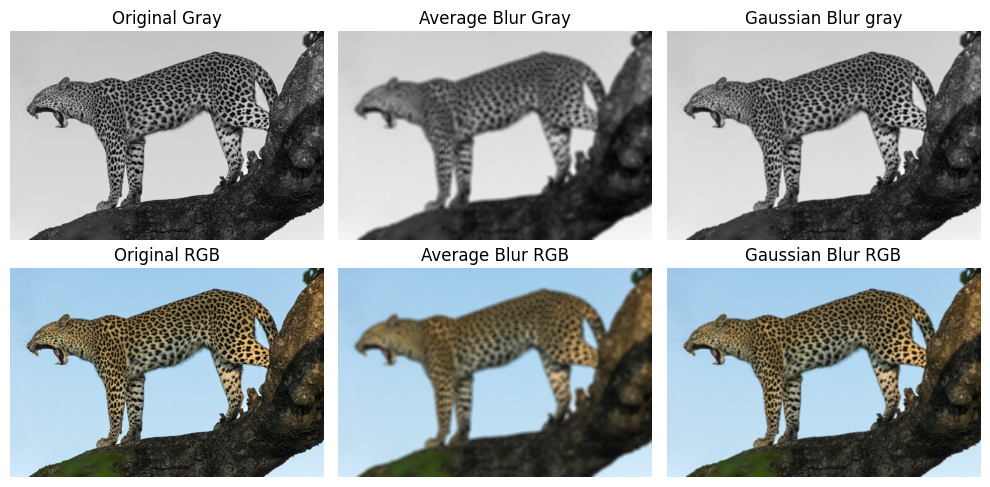

In [13]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.


# Task 1


import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


def convolve(img, kernel):
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2

    padded = np.pad(img,pad_width=((pad_h, pad_h), (pad_w, pad_w)),mode='reflect')

    h, w = img.shape
    res = np.zeros((h, w), dtype=np.float32)

    kernel_flipped = np.flipud(np.fliplr(kernel))

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            res[i, j] = np.sum(region * kernel_flipped)

    return res

img = np.array(img)
img_rgb = img
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)




#Task 2
def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize)) / (ksize * ksize)
    return convolve(img, kernel)

def average_blur_rgb(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    r_blurred = convolve(r, kernel)
    g_blurred = convolve(g, kernel)
    b_blurred = convolve(b, kernel)
    out = np.stack((r_blurred, g_blurred, b_blurred), axis=2)
    return out

#Task 3
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-(ksize // 2), ksize // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)

    return kernel.astype(np.float32)

def gaussian_blur_gray(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    return convolve(img, kernel)

def gaussian_blur_rgb(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    r_blurred = convolve(r, kernel)
    g_blurred = convolve(g, kernel)
    b_blurred = convolve(b, kernel)
    out = np.stack((r_blurred, g_blurred, b_blurred), axis=2)
    return out


ksize = 10
sigma = 1

avg_gray_img = average_blur_gray(img_gray, ksize)
avg_rgb_img = average_blur_rgb(img_rgb, ksize)

gaussian_gray_img = gaussian_blur_gray(img_gray, ksize, sigma)
gaussian_rgb_img = gaussian_blur_rgb(img_rgb, ksize, sigma)


plt.figure(figsize=(10,5))

plt.subplot(2, 3, 1)
plt.title("Original Gray")
plt.imshow(img_gray, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Average Blur Gray")
plt.imshow(avg_gray_img, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Gaussian Blur gray")
plt.imshow(gaussian_gray_img, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Original RGB")
plt.imshow(img_rgb.astype(np.uint8))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Average Blur RGB")
plt.imshow(avg_rgb_img.astype(np.uint8))
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Gaussian Blur RGB")
plt.imshow(gaussian_rgb_img.astype(np.uint8))
plt.axis('off')

plt.tight_layout()
plt.show()



### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

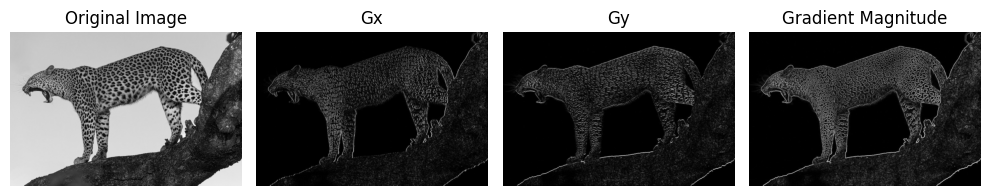

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]], dtype=np.float32)
Gx = convolve(img_gray, sobel_x)
Gy = convolve(img_gray, sobel_y)
gradient_mag = np.sqrt(Gx**2 + Gy**2)


gradient_magn = gradient_mag / gradient_mag.max()
gradient_magn = (gradient_mag * 255).astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,4,2)
plt.title("Gx")
plt.imshow(np.abs(Gx), cmap='gray')
plt.axis('off')

plt.subplot(1,4,3)
plt.title("Gy")
plt.imshow(np.abs(Gy), cmap='gray')
plt.axis('off')

plt.subplot(1,4,4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_mag, cmap='gray')
plt.axis('off')



plt.tight_layout()
plt.show()



### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

NumPy and OpenCV outputs identical: False


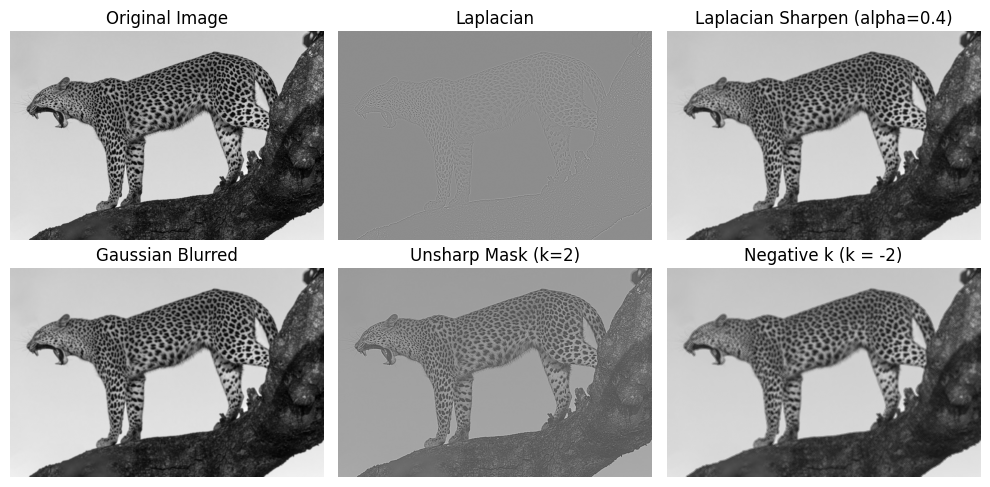

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Task 1
laplacian_kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
], dtype=np.float32)
lap = convolve(img_gray, laplacian_kernel)
alpha = 0.4
sharp = img_gray - lap * alpha

sharp_alpha1 = img_gray - lap * 1
lap_cv = cv.Laplacian(img_gray, cv.CV_32F, ksize=3)
sharp_cv = img_gray - lap_cv

same = np.array_equal(sharp_alpha1, sharp_cv)
print("NumPy and OpenCV outputs identical:", same)



#Task 2
g_kernel = gaussian_kernel(5, 1.0)
blurred = convolve(img_gray, g_kernel)
mask = img_gray - blurred
k = 2.0
sharp_2 = img_gray + k * mask
k_neg = - 2.0
sharp_neg_2 = img_gray + k_neg * mask


plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Laplacian")
plt.imshow(lap, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Laplacian Sharpen (alpha=0.4)")
plt.imshow(sharp, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Gaussian Blurred")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Unsharp Mask (k=2)")
plt.imshow(sharp_2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Negative k (k = -2)")
plt.imshow(sharp_neg_2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

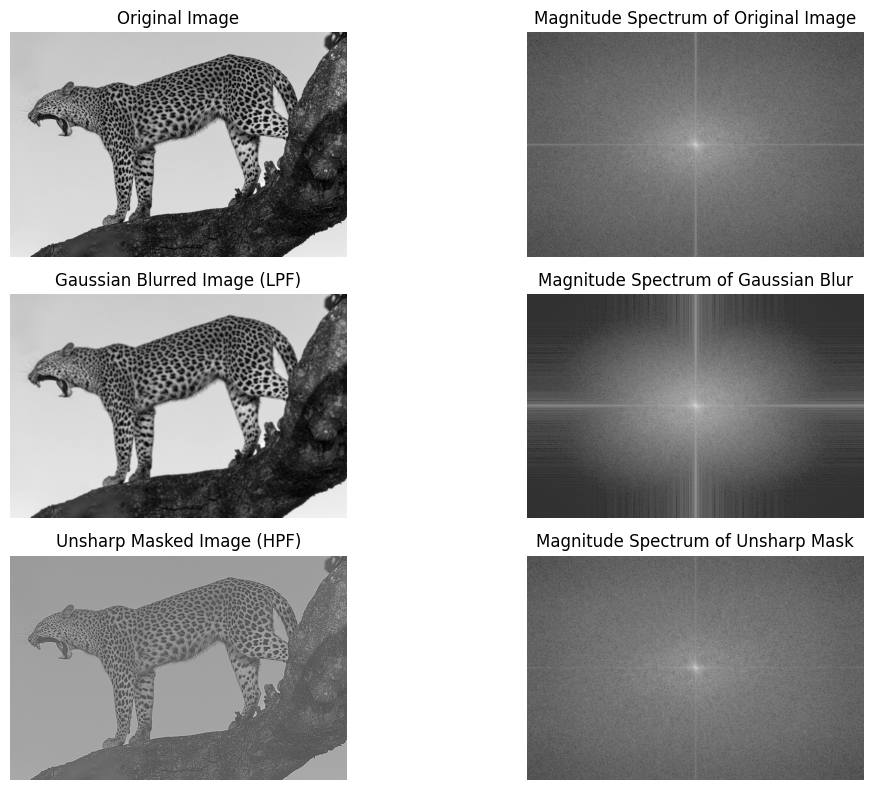

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def mag_spectrum(img):
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude = np.log(1+np.abs(fshift))
  return magnitude


img_spectrum = mag_spectrum(img_gray)
blurred_spectrum = mag_spectrum(blurred)
sharp_spectrum = mag_spectrum(sharp_2)

plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("Magnitude Spectrum of Original Image")
plt.imshow(img_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title("Gaussian Blurred Image (LPF)")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title("Magnitude Spectrum of Gaussian Blur")
plt.imshow(blurred_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title("Unsharp Masked Image (HPF)")
plt.imshow(sharp_2, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title("Magnitude Spectrum of Unsharp Mask")
plt.imshow(sharp_spectrum, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# The magnitude spectrum of original image has brighter center region which implies low frequency (Smoother regions) while darker areas ar farther from the center which implies high frequencies (edges)
# Gaussian blurring makes it much more concentrated near center suppressing edges and working as LPF
# While in unsharp mask, high frequency components are ammplified

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

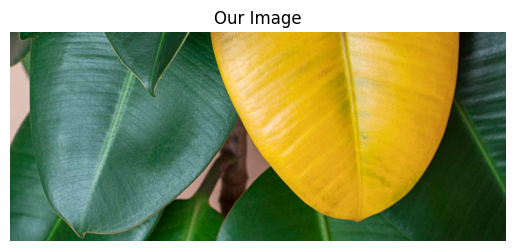

In [35]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

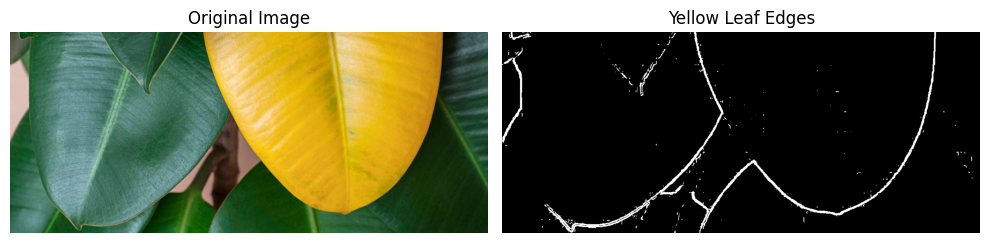

In [48]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

r = img_part5[:, :, 0].astype(np.float32)
g = img_part5[:, :, 1].astype(np.float32)
b = img_part5[:, :, 2].astype(np.float32)

yellow = r - g

sobel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

gx = convolve(yellow, sobel_x)
gy = convolve(yellow, sobel_y)
grad_mag = np.sqrt(gx**2 + gy**2)
grad_norm = grad_mag / grad_mag.max()
grad_norm = (grad_norm * 255).astype(np.uint8)

threshold = 40
leaf_edges = np.zeros_like(grad_norm)
leaf_edges[grad_norm > threshold] = 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_part5.astype(np.uint8))
plt.axis('off')


plt.subplot(1,2,2)
plt.title("Yellow Leaf Edges")
plt.imshow(leaf_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# In this image, edges appear where color changes from green to yellow.
# Now as yellow regions have high red and green part but low blue while green regions have high green but low red and blue.
# So, this causes a strong gradient in r-g
# So we used this r-g and applied sobel kernels to detect edges corresponding to yellow leaf.

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
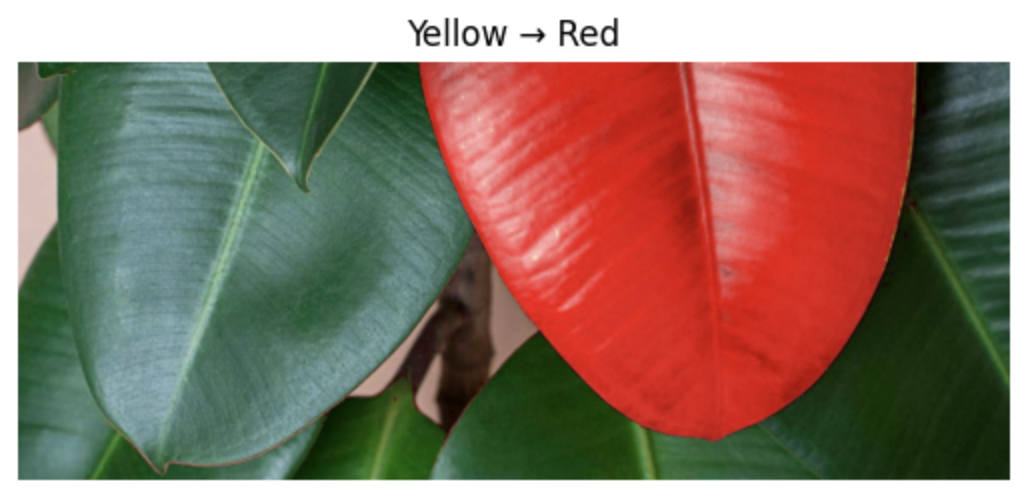

Also, we can change to a less brighter colour
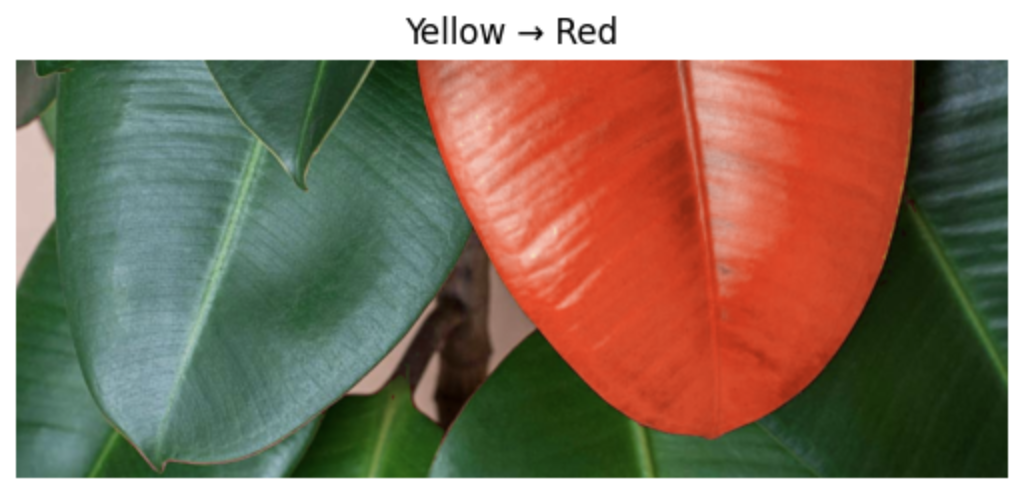

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.